In [60]:
import pandas as pd
import numpy as np

In [61]:
import sys, os 

# 1. 데이터

In [62]:
folder_loc = '/Users/lifesailor/.kaggle/porto-seguro/'

In [63]:
train = pd.read_csv(folder_loc + 'train.csv')
test = pd.read_csv(folder_loc + 'test.csv')

In [64]:
sample_sub = pd.read_csv(folder_loc + 'sample_submission.csv')

In [65]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [66]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [67]:
print("train 개수: ", len(train))
print("test 개수: ", len(test))

train 개수:  595212
test 개수:  892816


In [68]:
sample_sub.head()

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364


- id, target로 제출하면 된다.

# 2. 데이터 살펴보기

## 1. 전체 살피기

In [69]:
train.shape

(595212, 59)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

1. 결측값이 없다.
2. 다 숫자형 데이터(float, int): 확인 필요하다.
    - 이름에 붙은 걸 보자.
        - cat: categorical
        - bin: binary
        - 나머지: 숫자형
        
3. 크게 4가지 종류의 변수가 있는 것으로 보인다.
    - ps_ind
    - ps_car
    - ps_reg
    - ps_calc

### Data Description

- In this competition, you will predict the probability that an auto insurance policy holder files a claim.

- In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). 

- In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. 

- Features without these designations are either continuous or ordinal. 

- Values of -1 indicate that the feature was missing from the observation. 

- The target columns signifies whether or not a claim was filed for that policy holder.

## 2. 변수 타입 변환

In [71]:
cat_bin_vars = []
con_ord_vars = []

In [72]:
for col in train.columns[2:]:
    if 'cat' in col or 'bin' in col:
        cat_bin_vars.append(col)
    else:
        con_ord_vars.append(col)

In [73]:
print("categorical, binary variables: ", cat_bin_vars[:5])
print("continuouse, ordinal variables: ", con_ord_vars[:5])

categorical, binary variables:  ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin']
continuouse, ordinal variables:  ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01']


### 1. categorical 데이터

In [74]:
for col in cat_bin_vars:
    train[col] = train[col].astype('O')

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null object
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null object
ps_ind_05_cat     595212 non-null object
ps_ind_06_bin     595212 non-null object
ps_ind_07_bin     595212 non-null object
ps_ind_08_bin     595212 non-null object
ps_ind_09_bin     595212 non-null object
ps_ind_10_bin     595212 non-null object
ps_ind_11_bin     595212 non-null object
ps_ind_12_bin     595212 non-null object
ps_ind_13_bin     595212 non-null object
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null object
ps_ind_17_bin     595212 non-null object
ps_ind_18_bin     595212 non-null object
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null

In [76]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [77]:
train[cat_bin_vars].describe().T[['unique', 'top', 'freq']]

,unique,top,freq
ps_ind_02_cat,5,1,431859
ps_ind_04_cat,3,0,346965
ps_ind_05_cat,8,0,528009
ps_ind_06_bin,2,0,360852
ps_ind_07_bin,2,0,442223
ps_ind_08_bin,2,0,497644
ps_ind_09_bin,2,0,484917
ps_ind_10_bin,2,0,594990
ps_ind_11_bin,2,0,594205
ps_ind_12_bin,2,0,589594


In [78]:
for col in cat_bin_vars:
    print(str(train[col].apply(lambda x: int(x)).sort_values().unique()).split('\n')[0])

[-1  1  2  3  4]
[-1  0  1]
[-1  0  1  2  3  4  5  6]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[-1  0  1  2  3  4  5  6  7  8  9 10 11]
[-1  0  1]
[-1  0  1]
[0 1 2 3 4 5 6 7 8 9]
[-1  0  1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[-1  0  1]
[0 1]
[-1  0  1  2  3  4]
[0 1 2]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


## 2-2. 숫자형 데이터

In [79]:
train[con_ord_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000,7.000000
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000,11.000000
ps_ind_14,595212.0,0.012451,0.127545,0.000000,0.000000,0.000000,0.000000,4.000000
ps_ind_15,595212.0,7.299922,3.546042,0.000000,5.000000,7.000000,10.000000,13.000000
ps_reg_01,595212.0,0.610991,0.287643,0.000000,0.400000,0.700000,0.900000,0.900000
ps_reg_02,595212.0,0.439184,0.404264,0.000000,0.200000,0.300000,0.600000,1.800000
ps_reg_03,595212.0,0.551102,0.793506,-1.000000,0.525000,0.720677,1.000000,4.037945
ps_car_11,595212.0,2.346072,0.832548,-1.000000,2.000000,3.000000,3.000000,3.000000
ps_car_12,595212.0,0.379945,0.058327,-1.000000,0.316228,0.374166,0.400000,1.264911
ps_car_13,595212.0,0.813265,0.224588,0.250619,0.670867,0.765811,0.906190,3.720626


In [80]:
for col in con_ord_vars:
    print(col, len(train[col].unique()))

ps_ind_01 8
ps_ind_03 12
ps_ind_14 5
ps_ind_15 14
ps_reg_01 10
ps_reg_02 19
ps_reg_03 5013
ps_car_11 5
ps_car_12 184
ps_car_13 70482
ps_car_14 850
ps_car_15 15
ps_calc_01 10
ps_calc_02 10
ps_calc_03 10
ps_calc_04 6
ps_calc_05 7
ps_calc_06 11
ps_calc_07 10
ps_calc_08 11
ps_calc_09 8
ps_calc_10 26
ps_calc_11 20
ps_calc_12 11
ps_calc_13 14
ps_calc_14 24


In [81]:
for col in con_ord_vars:
    print(str(train[col].sort_values().round(1).unique()))

[0 1 2 3 4 5 6 7]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[0 1 2 3 4]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8]
[-1.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.2  3.5  3.8  4. ]
[-1  0  1  2  3]
[-1.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  1.3]
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.
 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.7]
[-1.   0.1  0.2  0.3  0.4  0.5  0.6]
[0.  1.  1.4 1.7 2.  2.2 2.4 2.6 2.8 3.  3.2 3.3 3.5 3.6 3.7]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[ 0  1  2  3  4  5  6  7  8  9 10]
[0 1 2 3 4 5 6 7 8 9]
[ 2  3  4  5  6  7  8  9 10 11 12]
[0 1 2 3 4 5 6 7]
[ 0  1  2  3  4  5  6

## 3. PLOT

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. categorical 변수 시각화

--------------------------------------------------
col:  ps_ind_02_cat


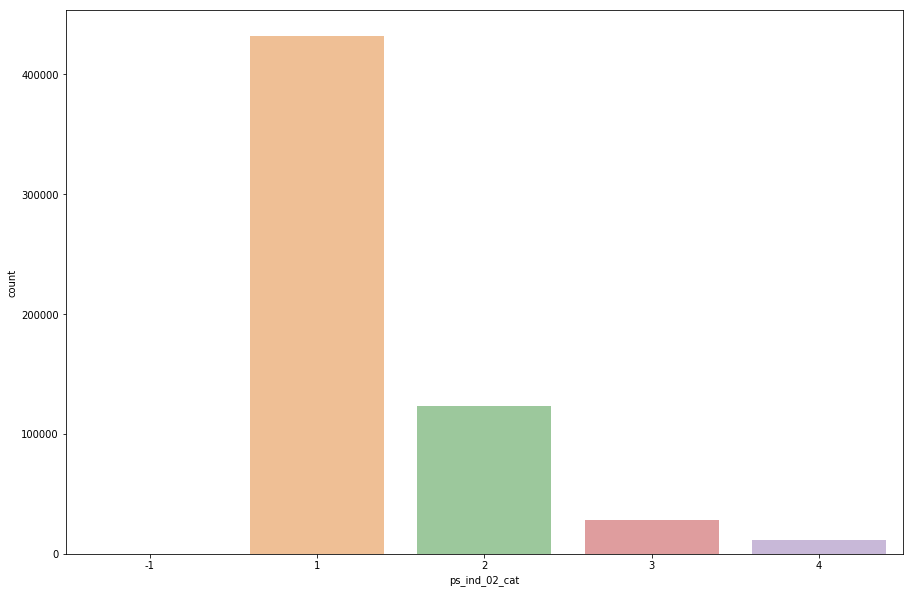

--------------------------------------------------
col:  ps_ind_04_cat


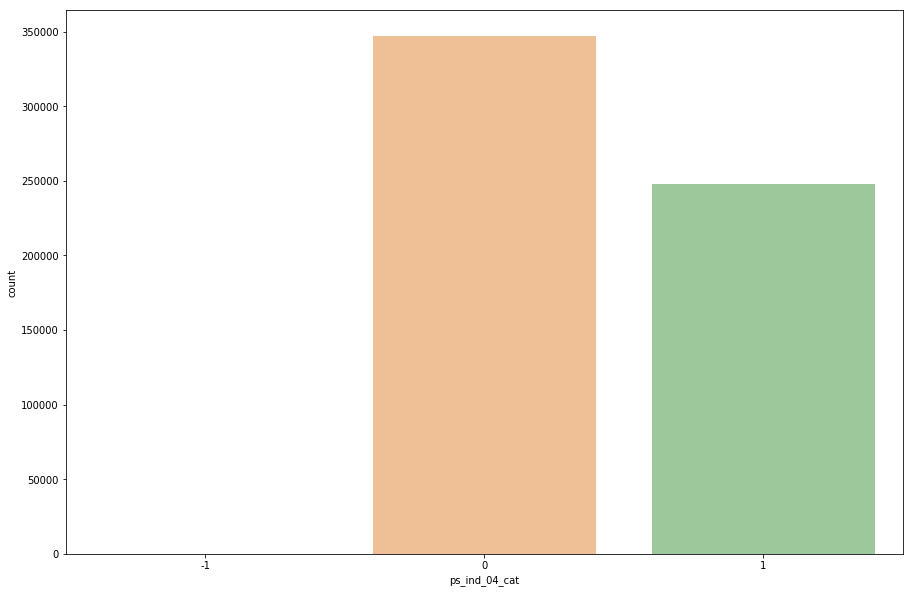

--------------------------------------------------
col:  ps_ind_05_cat


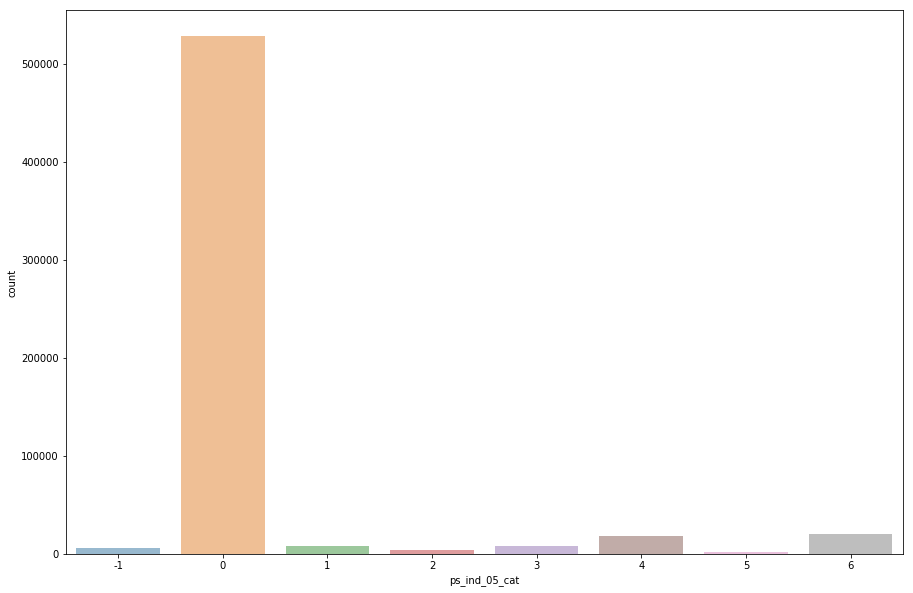

--------------------------------------------------
col:  ps_ind_06_bin


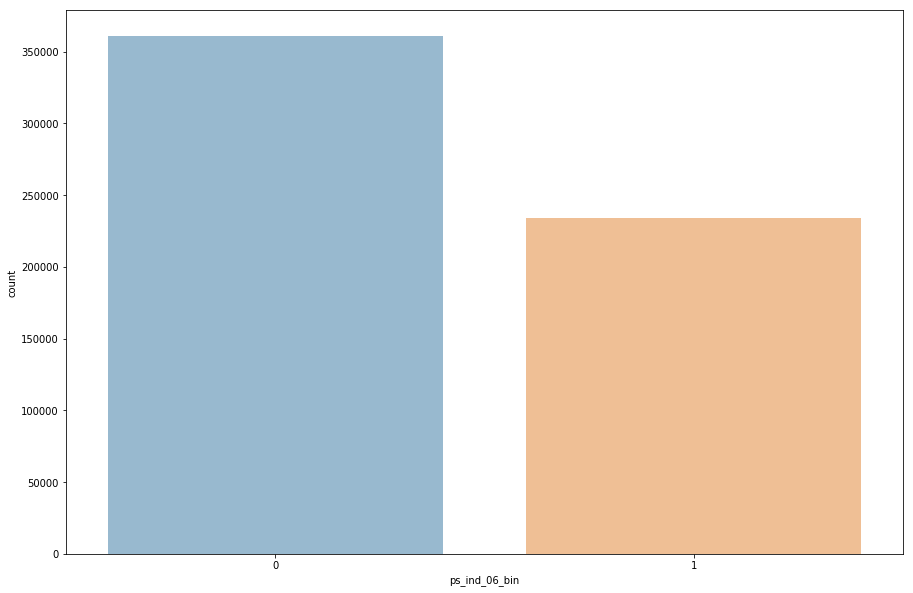

--------------------------------------------------
col:  ps_ind_07_bin


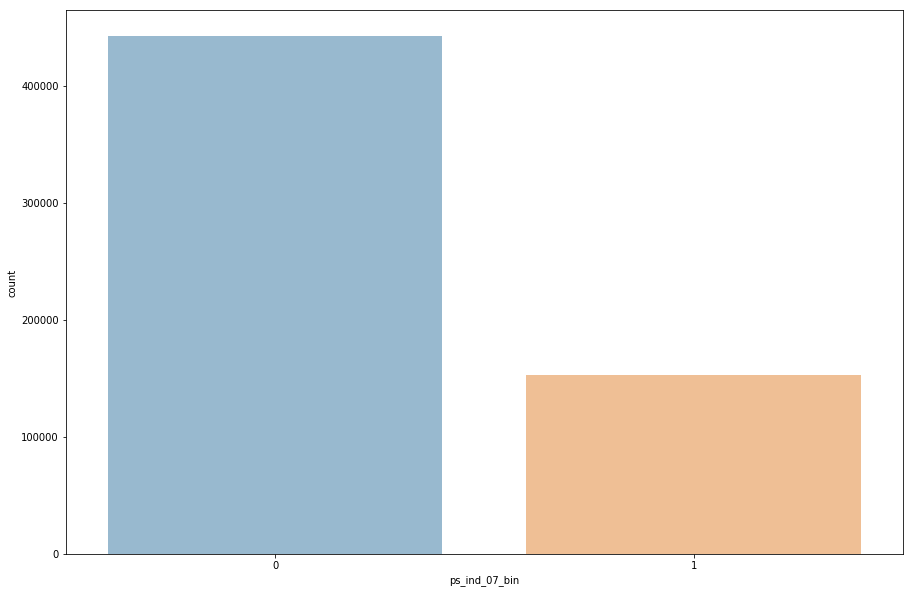

--------------------------------------------------
col:  ps_ind_08_bin


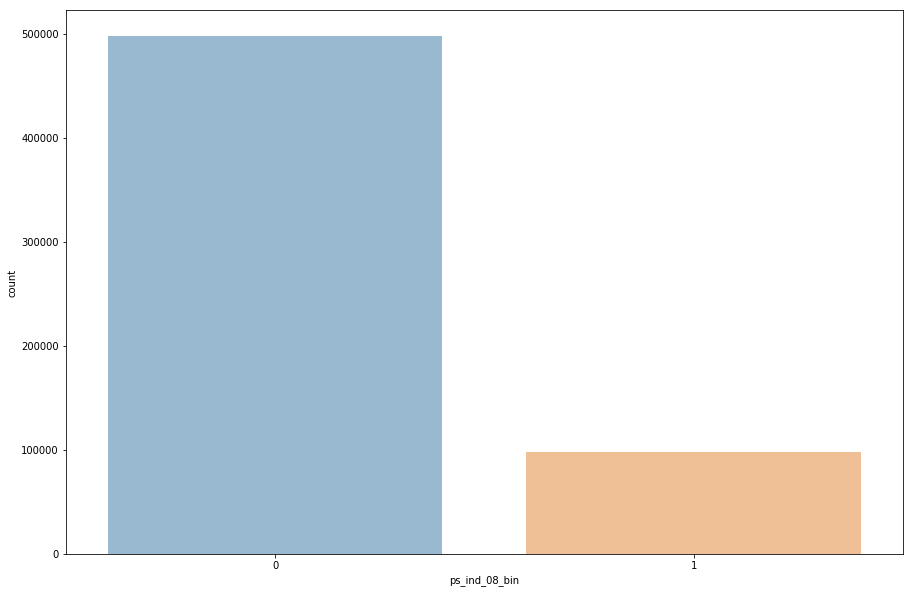

--------------------------------------------------
col:  ps_ind_09_bin


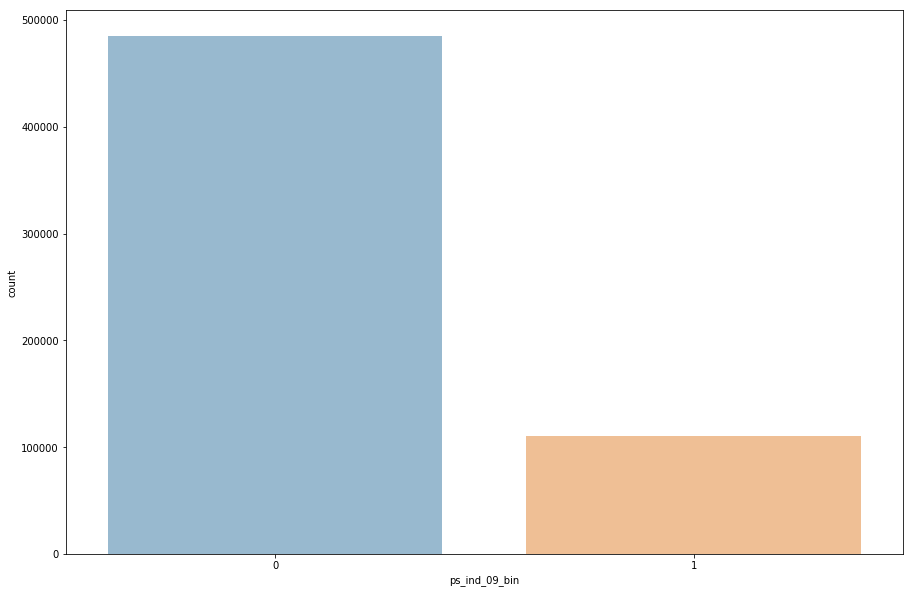

--------------------------------------------------
col:  ps_ind_10_bin


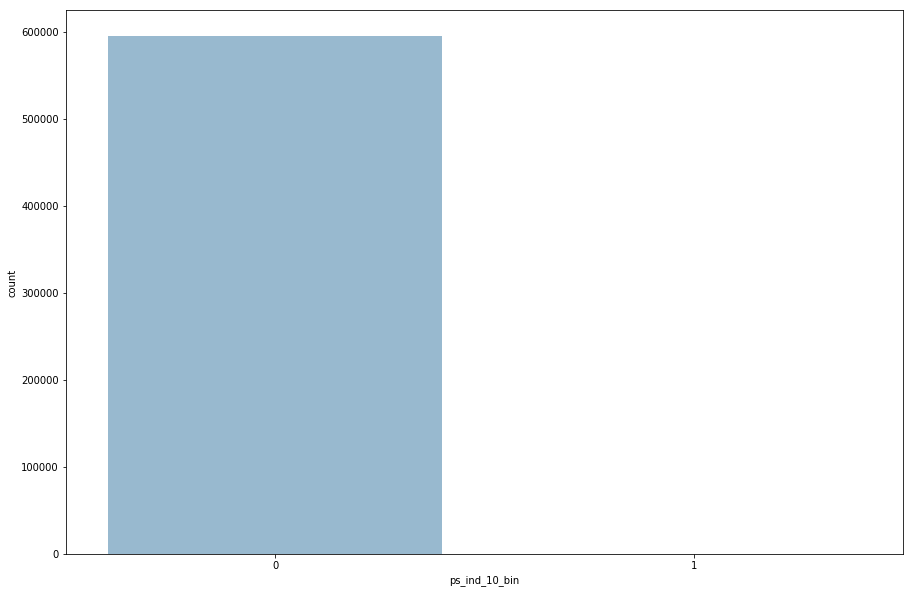

--------------------------------------------------
col:  ps_ind_11_bin


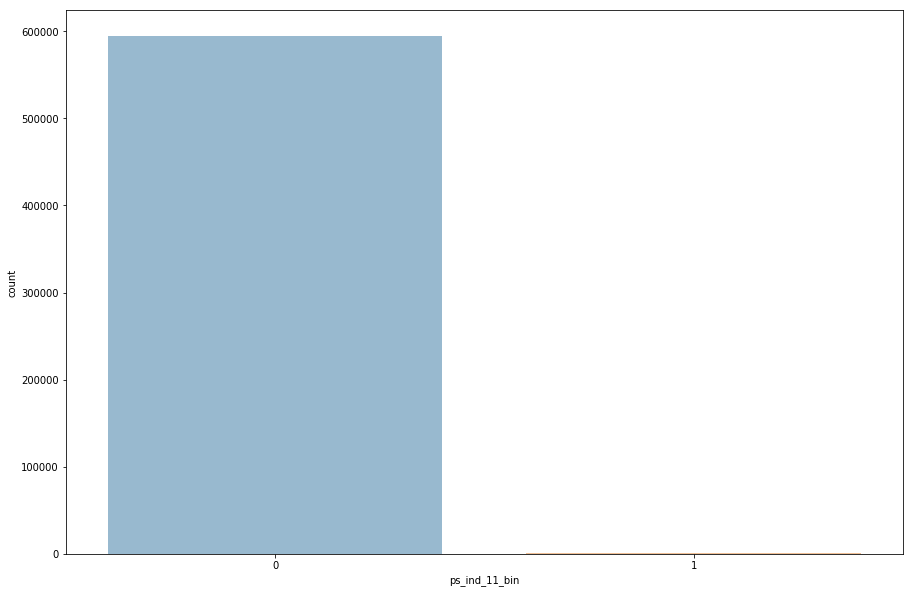

--------------------------------------------------
col:  ps_ind_12_bin


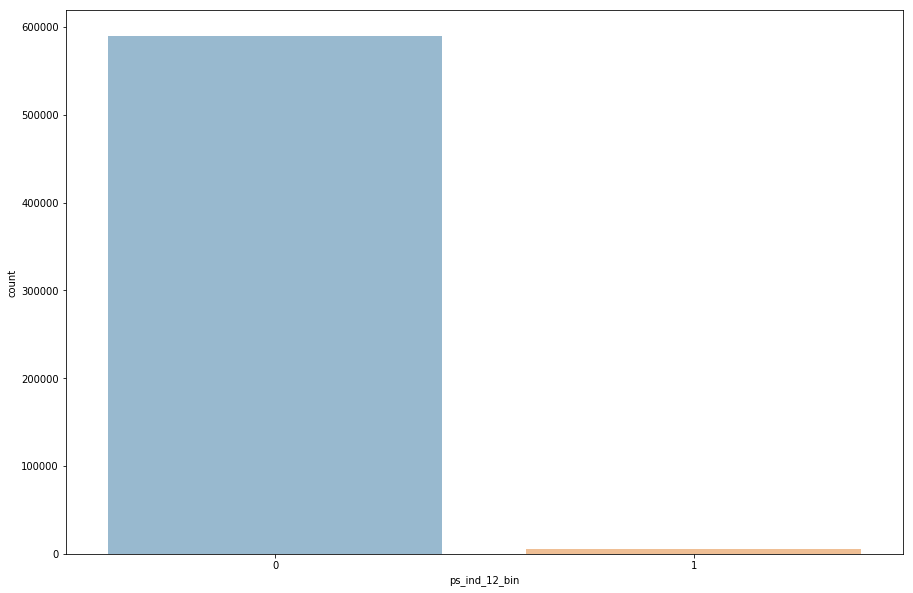

--------------------------------------------------
col:  ps_ind_13_bin


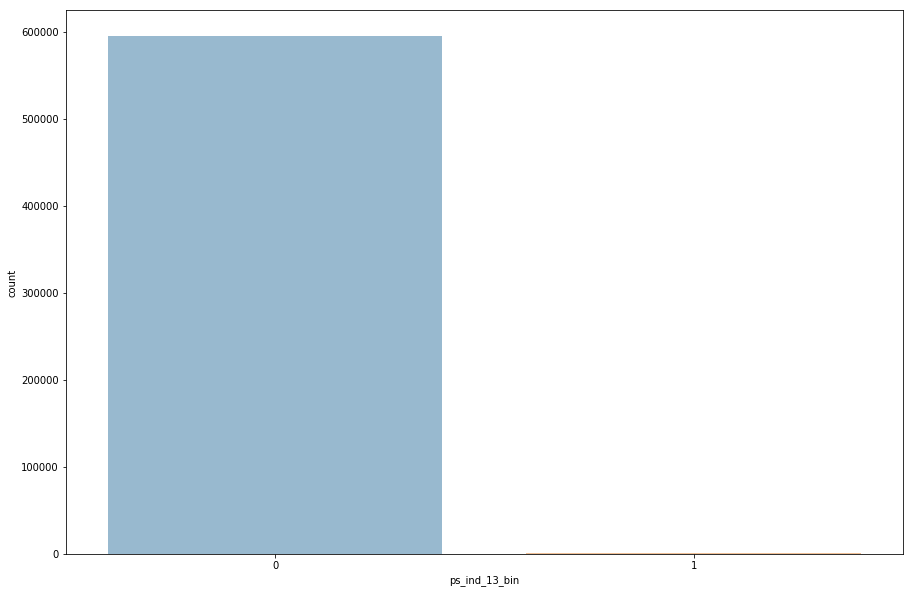

--------------------------------------------------
col:  ps_ind_16_bin


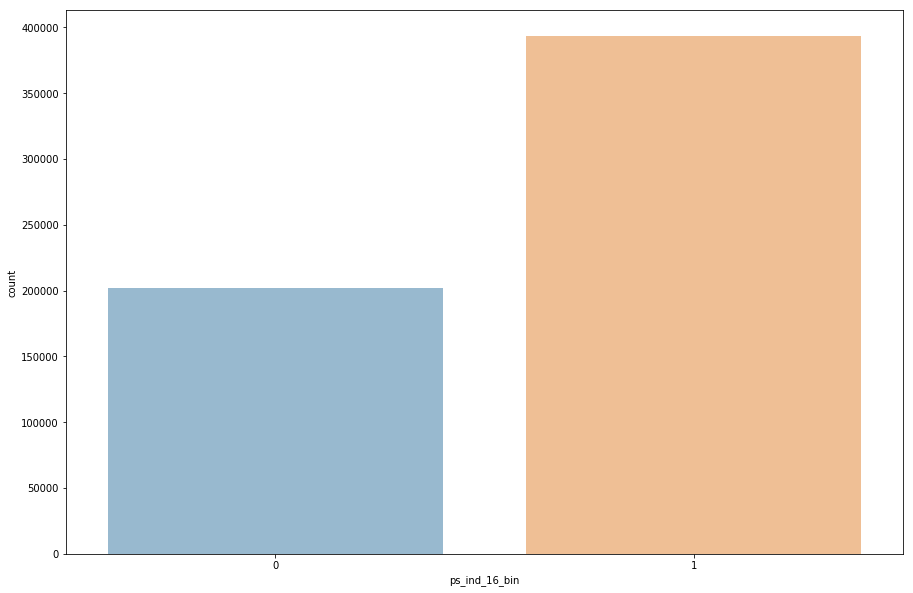

--------------------------------------------------
col:  ps_ind_17_bin


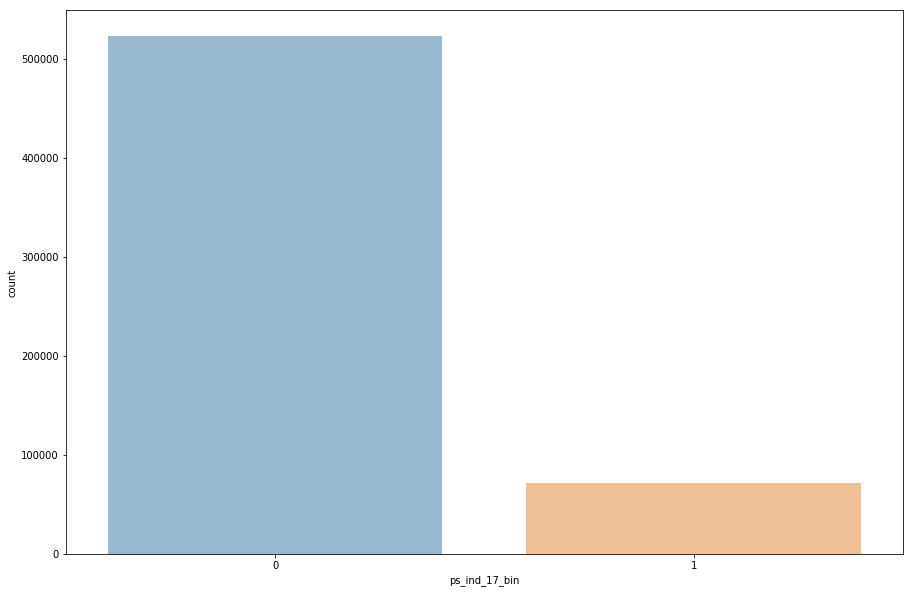

--------------------------------------------------
col:  ps_ind_18_bin


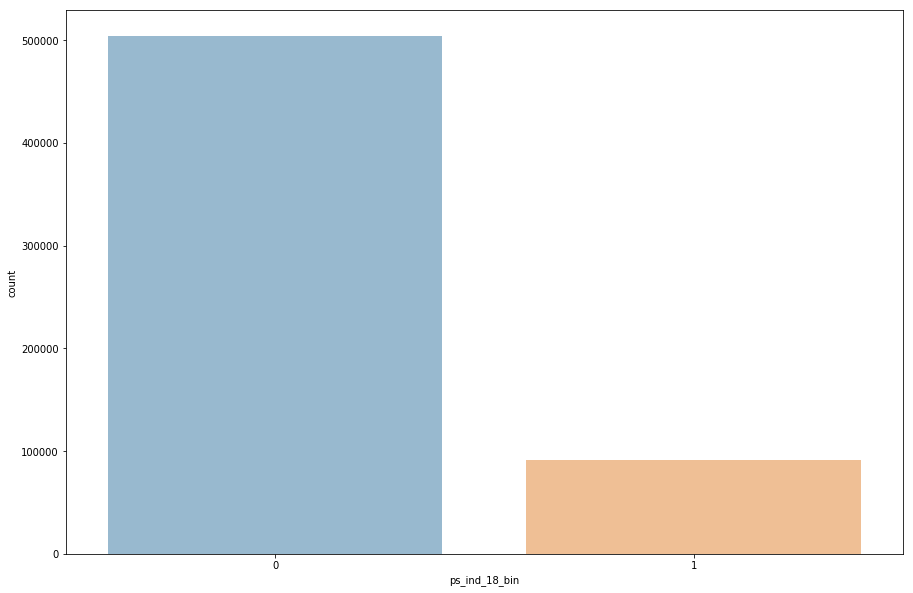

--------------------------------------------------
col:  ps_car_01_cat


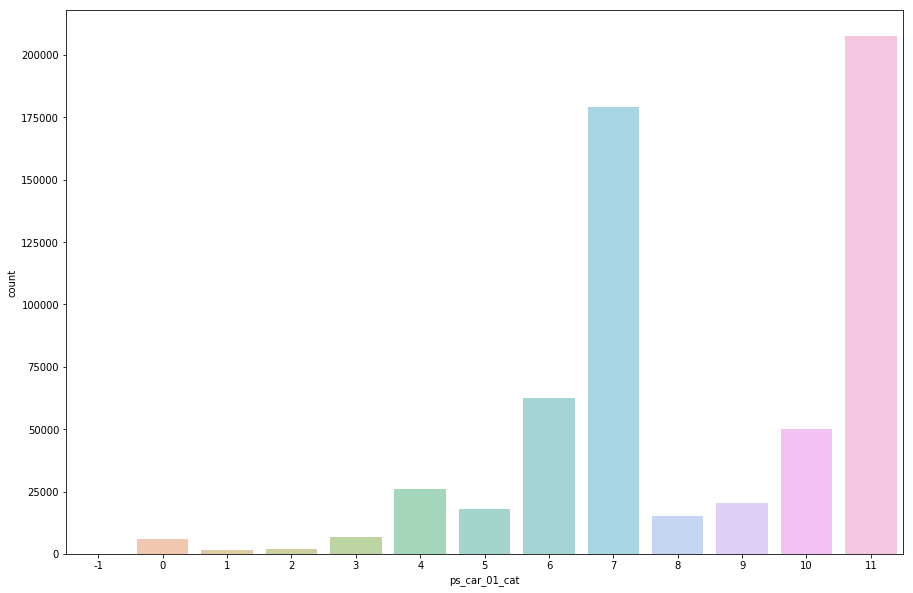

--------------------------------------------------
col:  ps_car_02_cat


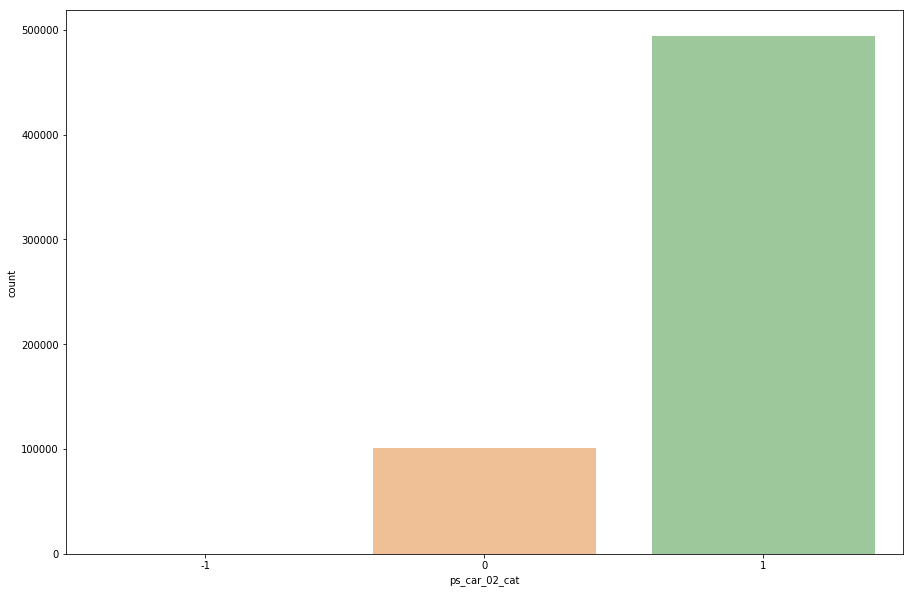

--------------------------------------------------
col:  ps_car_03_cat


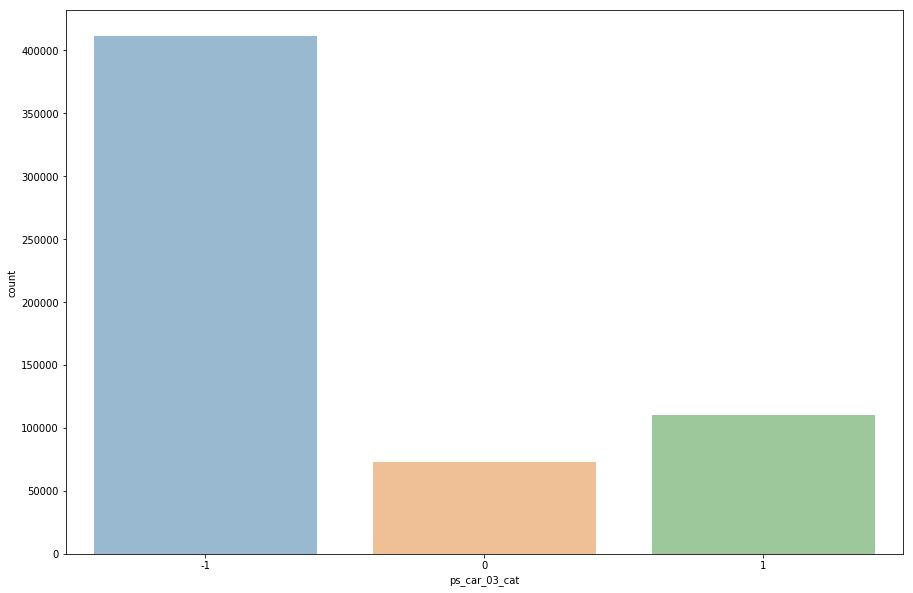

--------------------------------------------------
col:  ps_car_04_cat


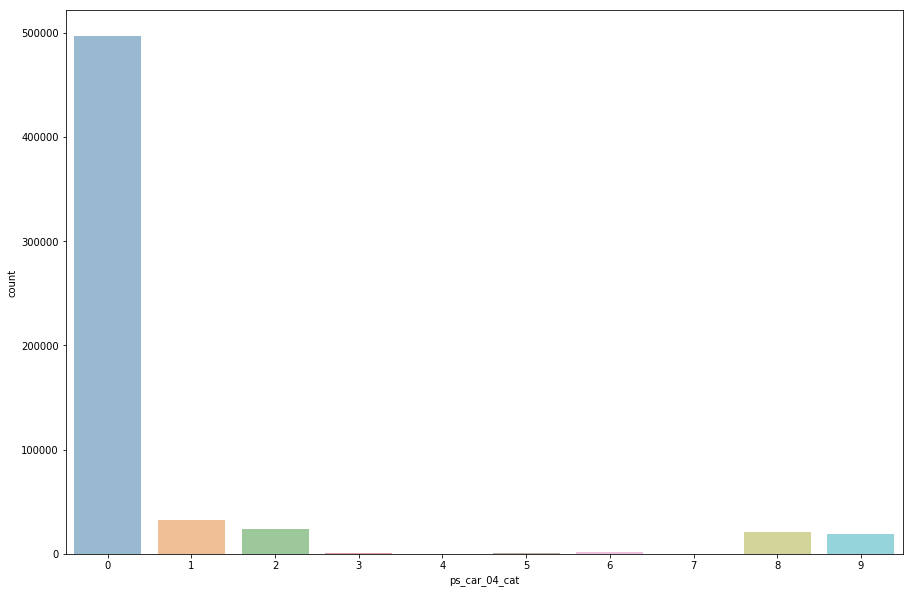

--------------------------------------------------
col:  ps_car_05_cat


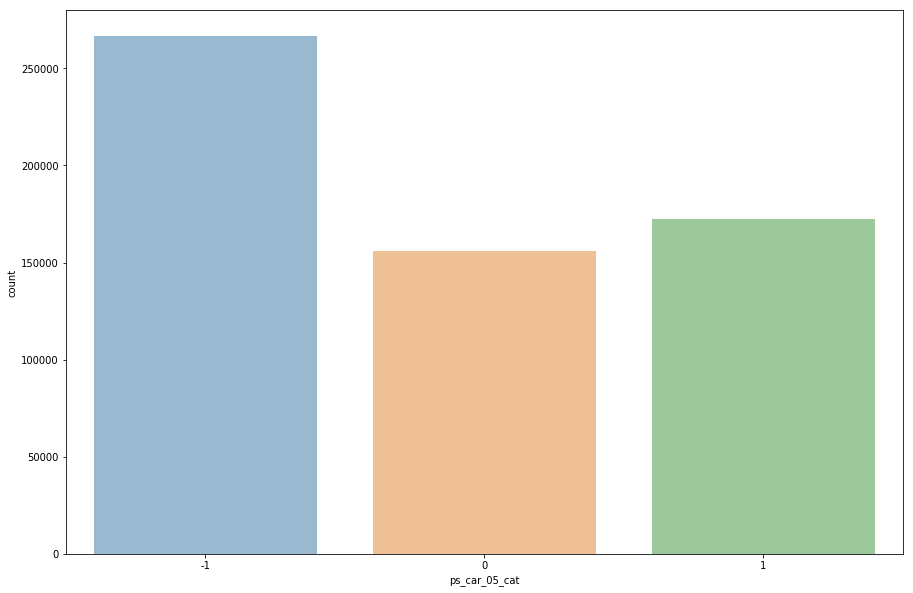

--------------------------------------------------
col:  ps_car_06_cat


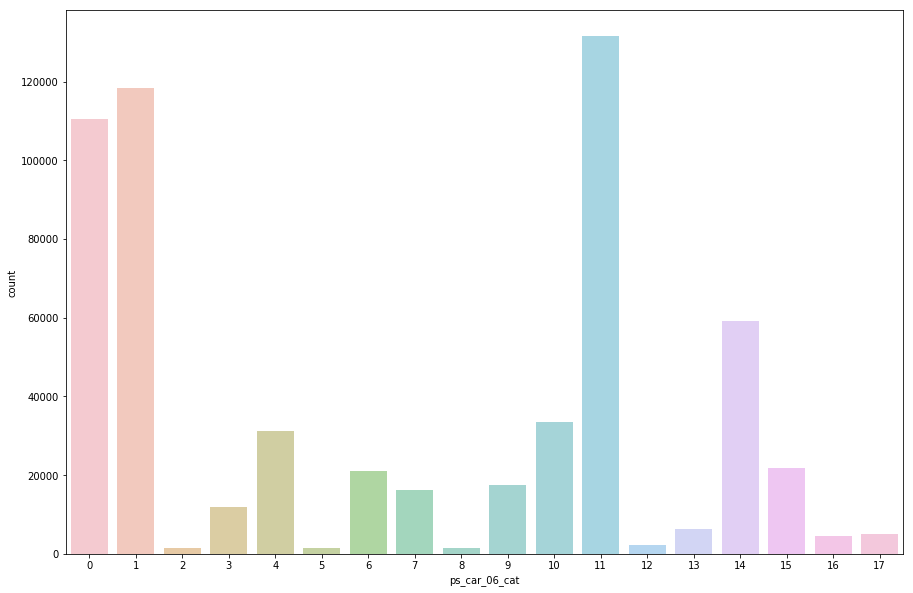

--------------------------------------------------
col:  ps_car_07_cat


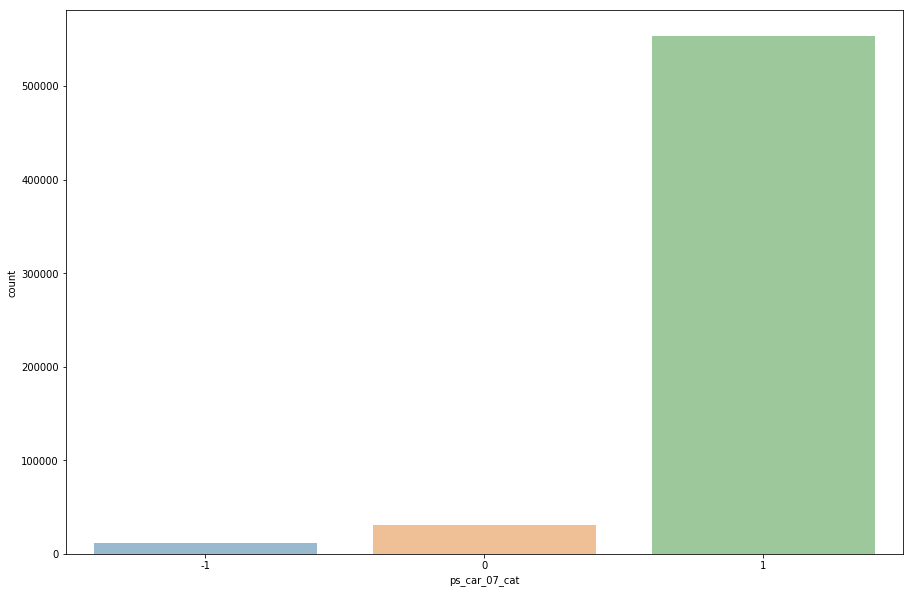

--------------------------------------------------
col:  ps_car_08_cat


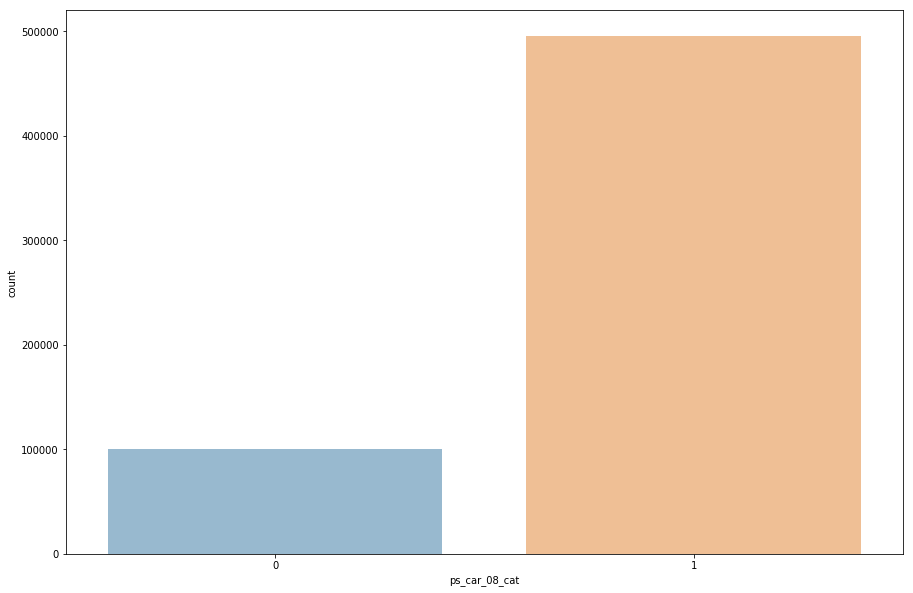

--------------------------------------------------
col:  ps_car_09_cat


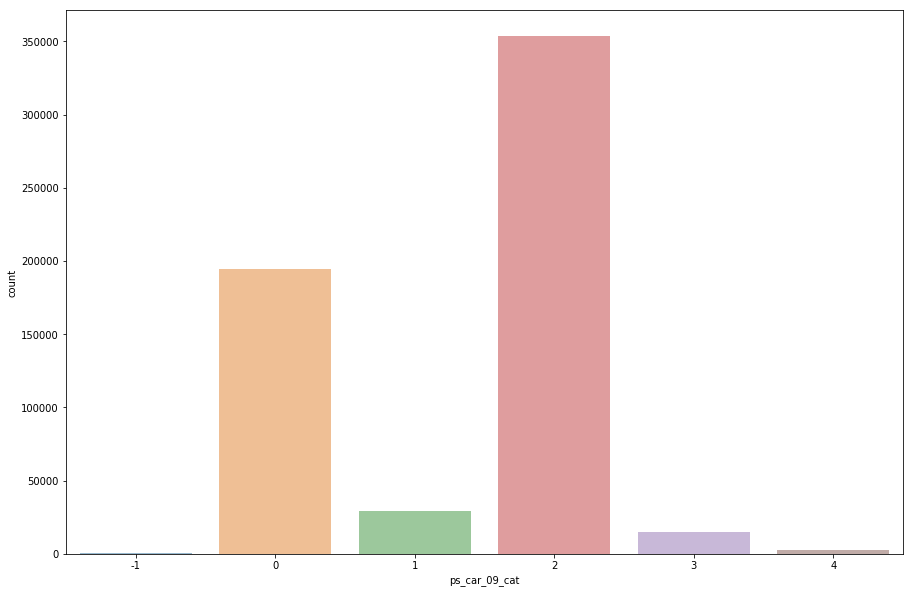

--------------------------------------------------
col:  ps_car_10_cat


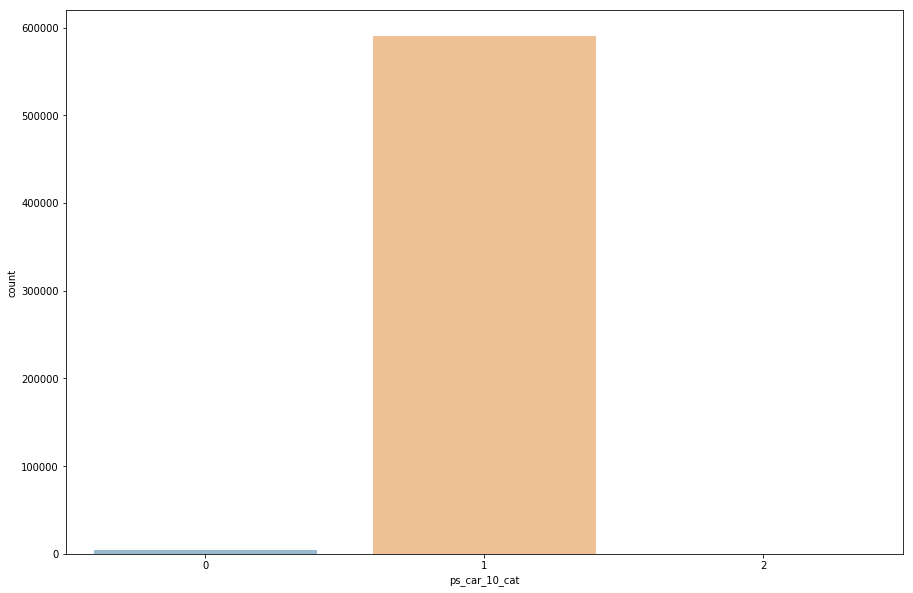

--------------------------------------------------
col:  ps_car_11_cat


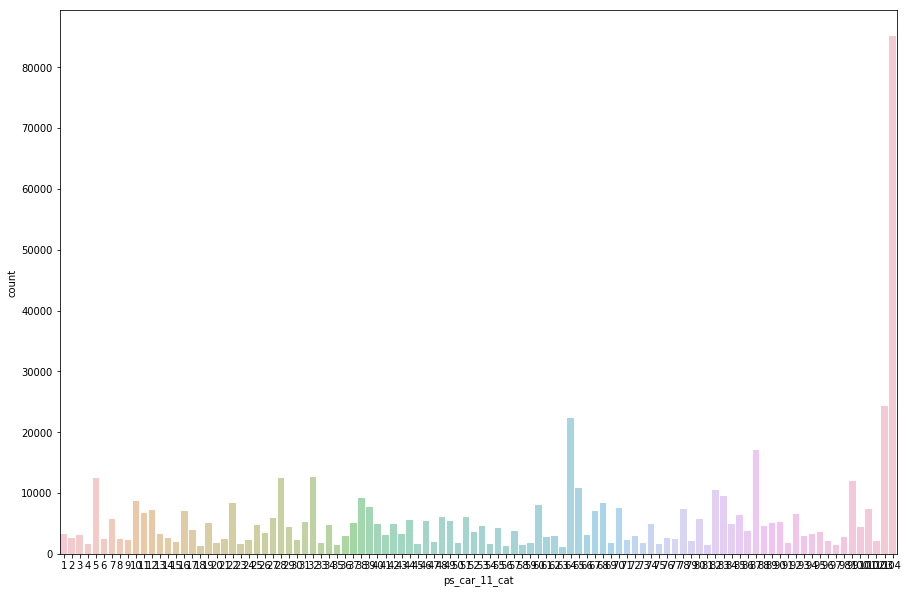

--------------------------------------------------
col:  ps_calc_15_bin


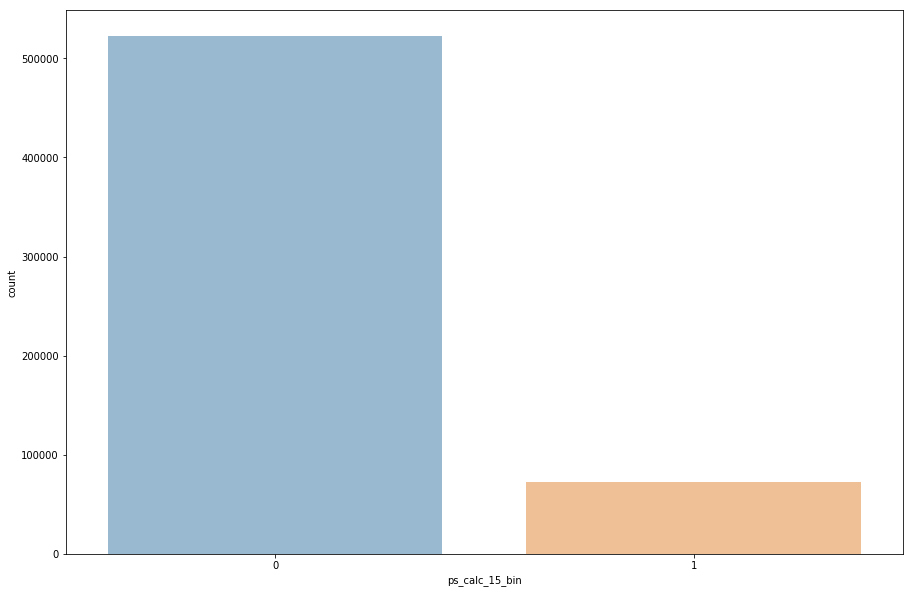

--------------------------------------------------
col:  ps_calc_16_bin


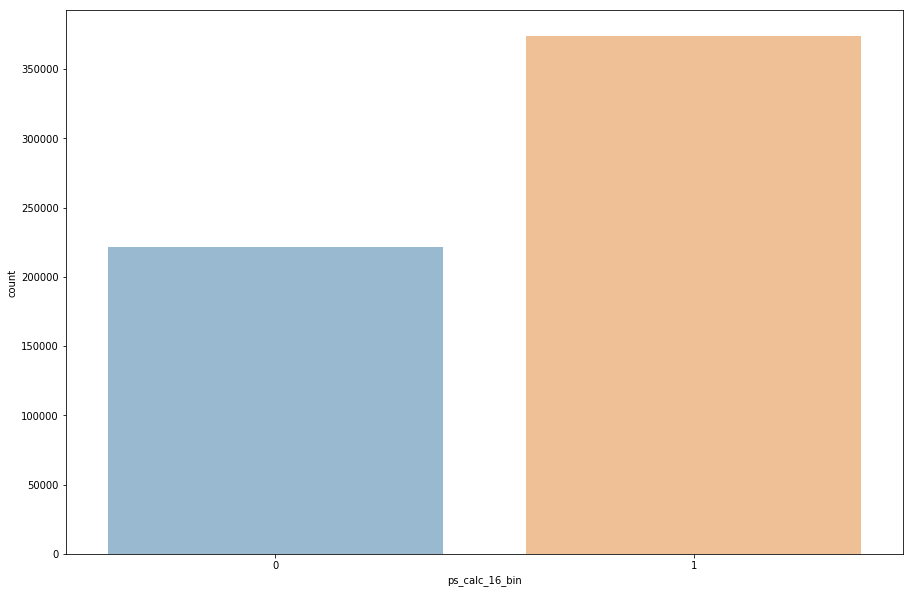

--------------------------------------------------
col:  ps_calc_17_bin


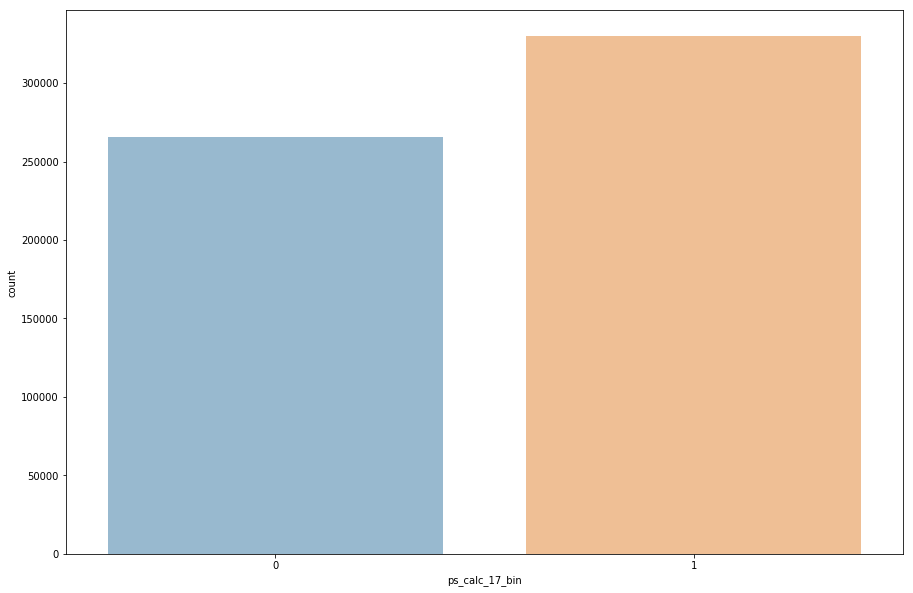

--------------------------------------------------
col:  ps_calc_18_bin


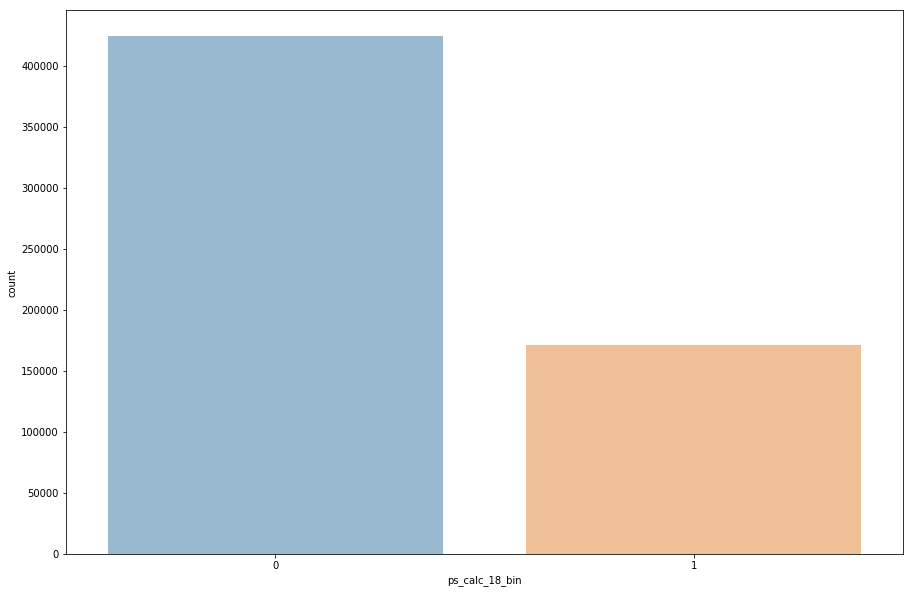

--------------------------------------------------
col:  ps_calc_19_bin


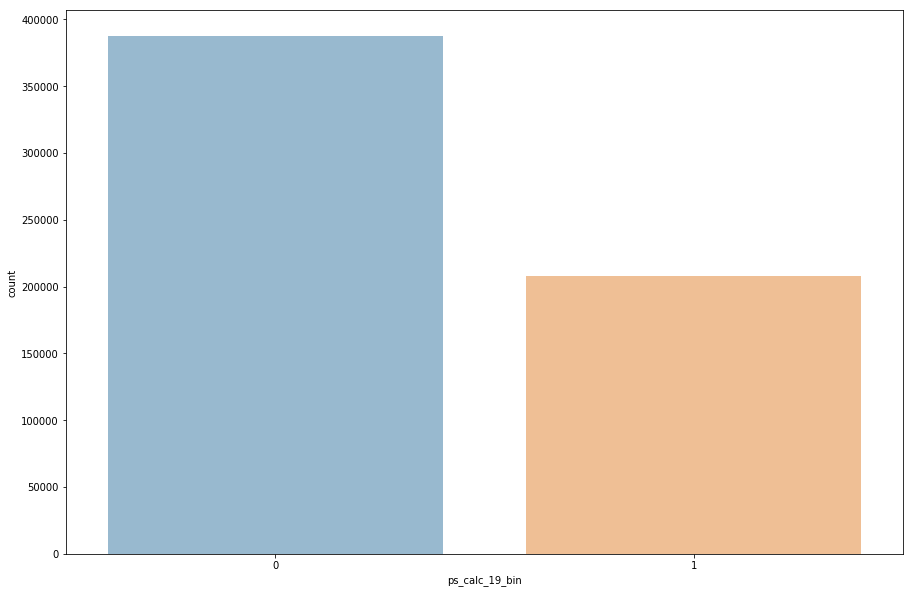

--------------------------------------------------
col:  ps_calc_20_bin


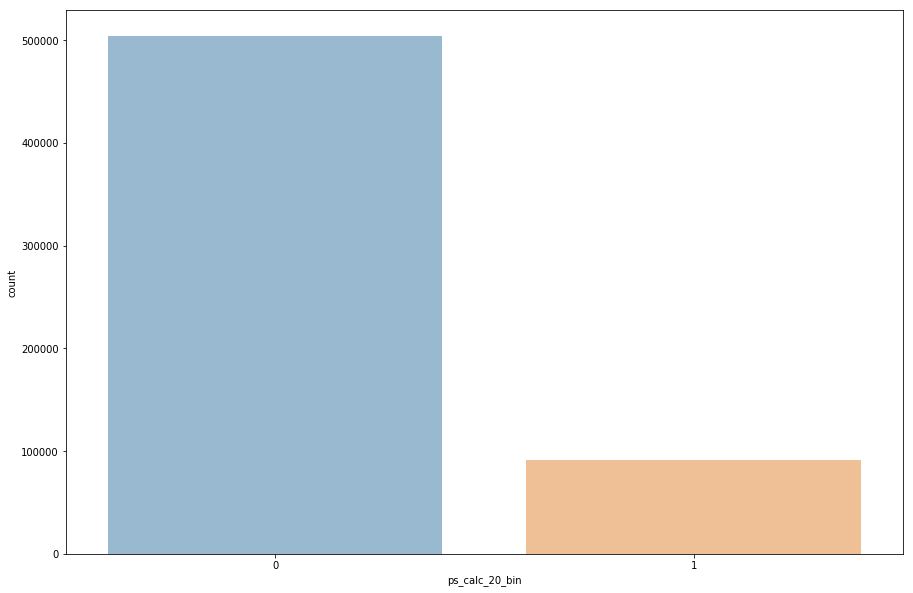

In [24]:
for col in cat_bin_vars:            
    print('-' * 50)
    print('col: ', col)
    
    f, ax = plt.subplots(figsize=(15,10))
    sns.countplot(x=col, data=train, alpha=0.5)
    plt.show()

--------------------------------------------------
col:  ps_ind_02_cat


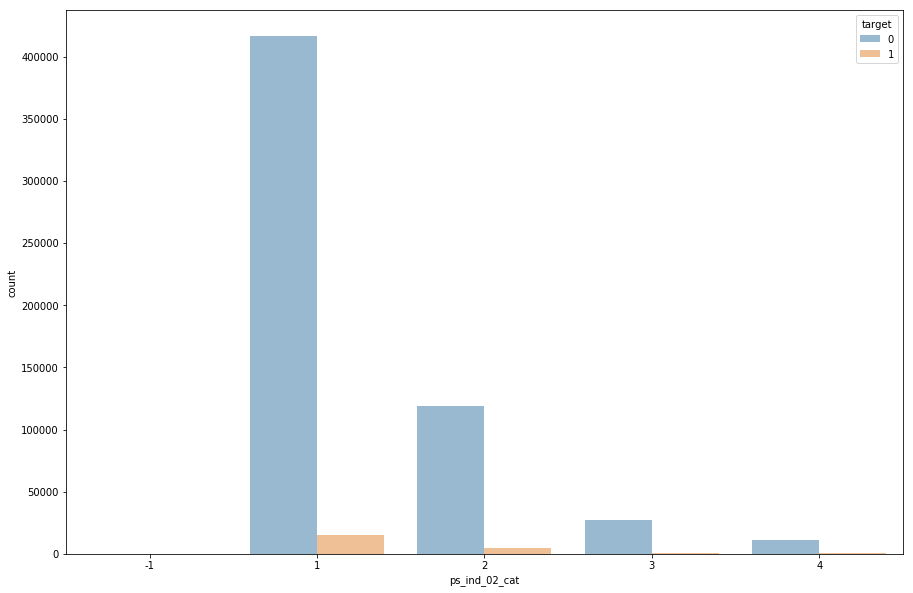

--------------------------------------------------
col:  ps_ind_04_cat


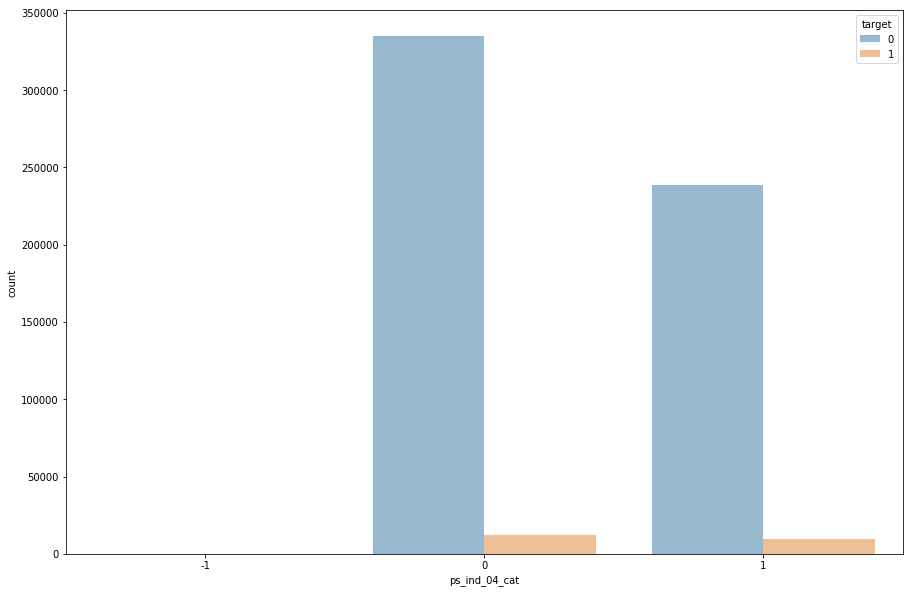

--------------------------------------------------
col:  ps_ind_05_cat


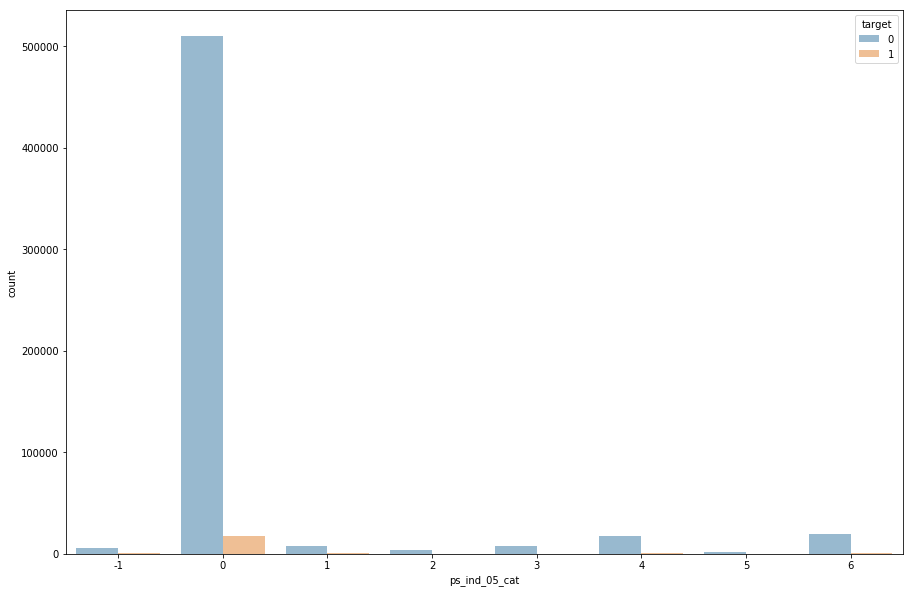

--------------------------------------------------
col:  ps_ind_06_bin


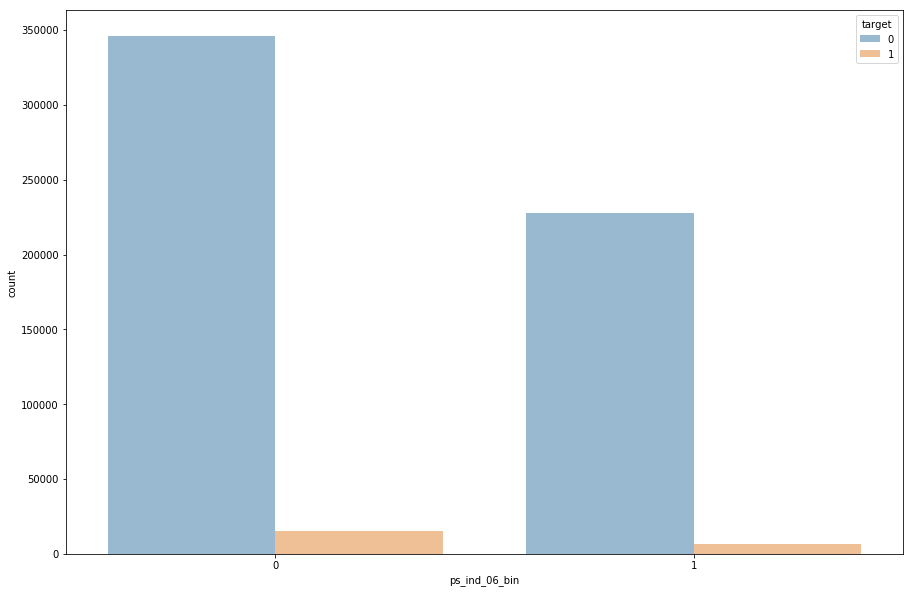

--------------------------------------------------
col:  ps_ind_07_bin


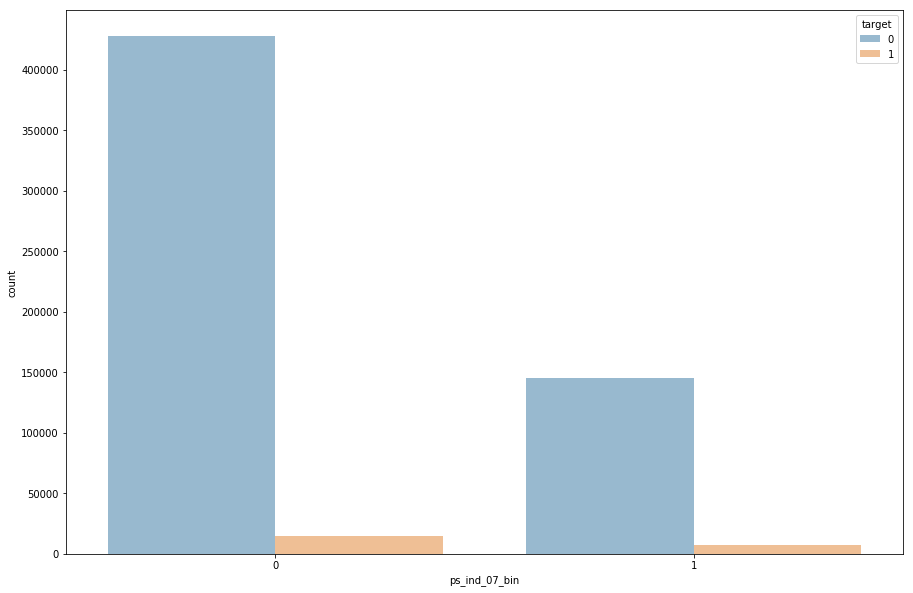

--------------------------------------------------
col:  ps_ind_08_bin


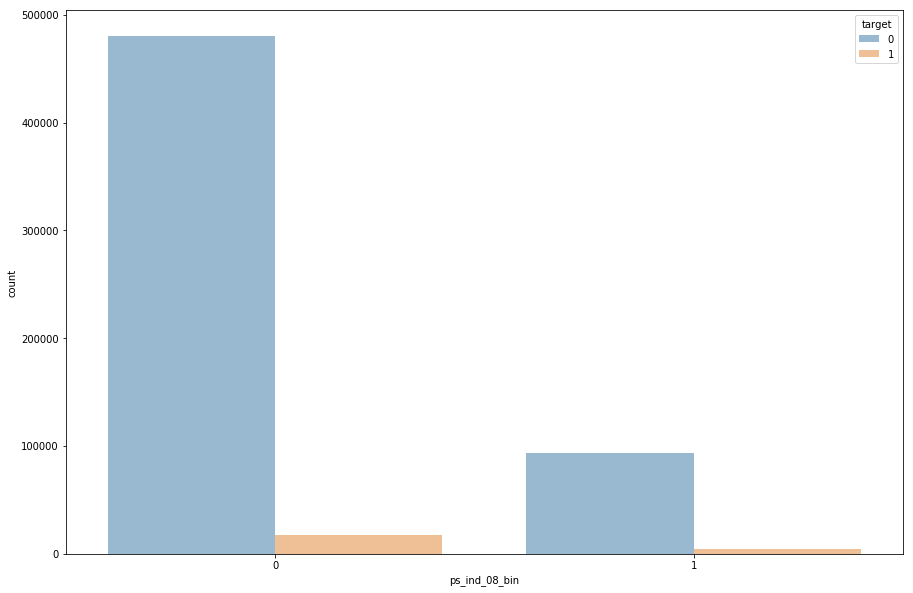

--------------------------------------------------
col:  ps_ind_09_bin


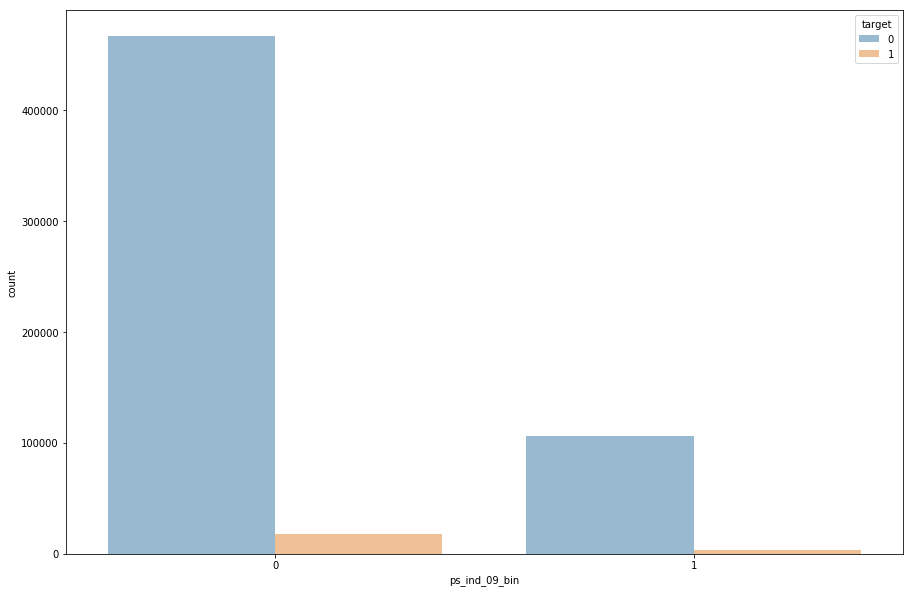

--------------------------------------------------
col:  ps_ind_10_bin


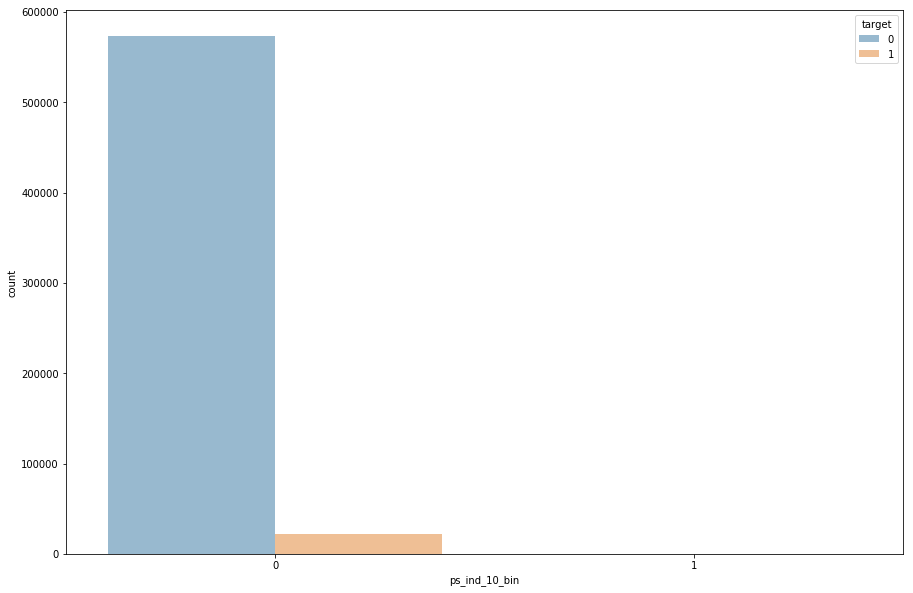

--------------------------------------------------
col:  ps_ind_11_bin


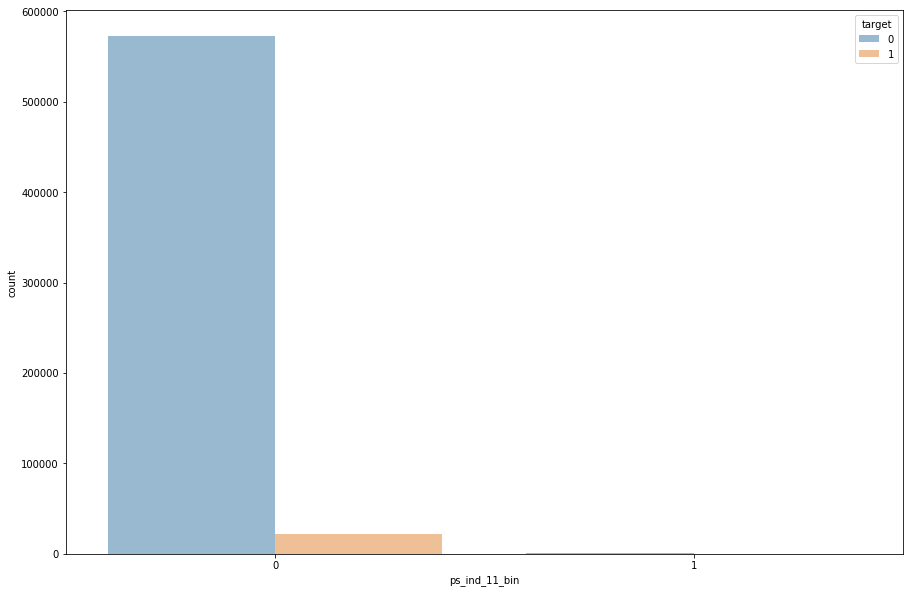

--------------------------------------------------
col:  ps_ind_12_bin


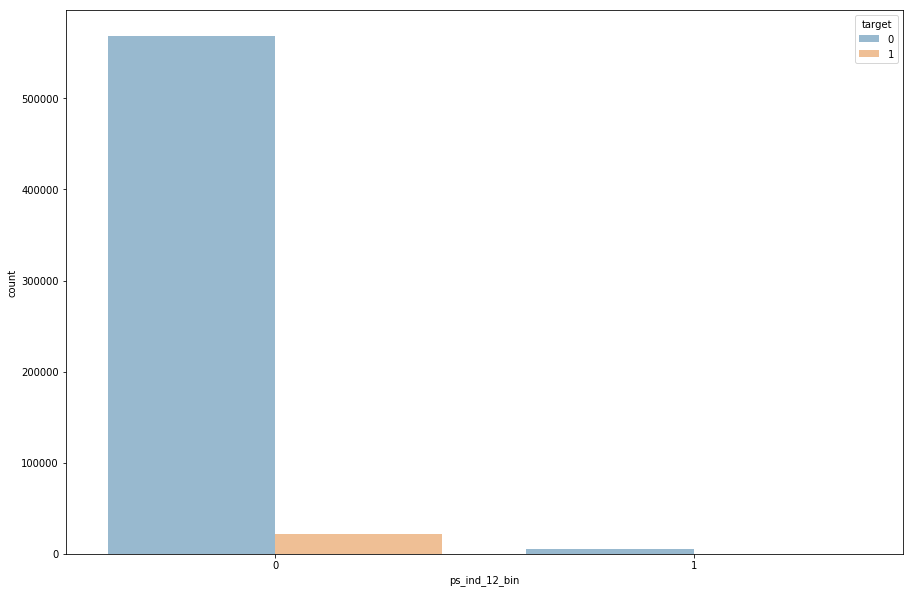

--------------------------------------------------
col:  ps_ind_13_bin


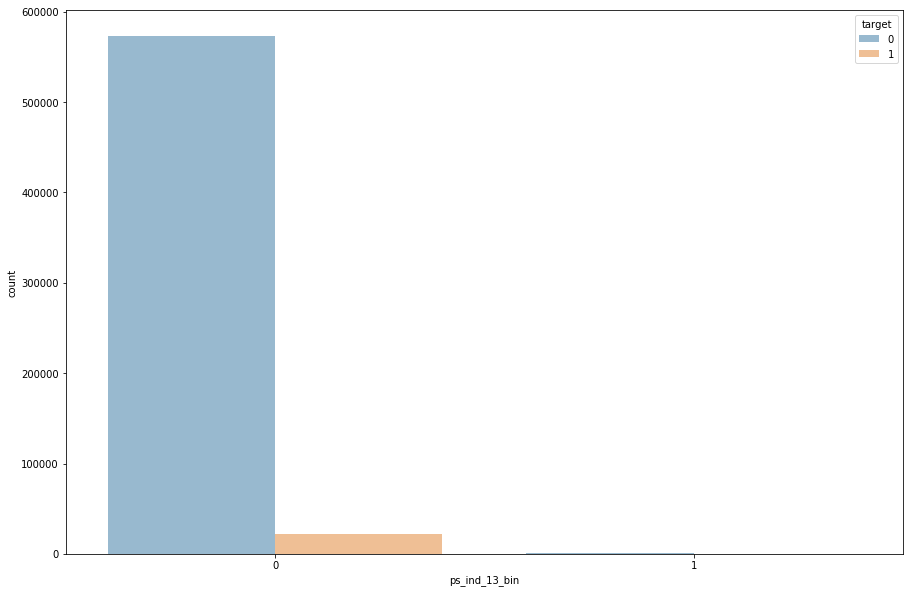

--------------------------------------------------
col:  ps_ind_16_bin


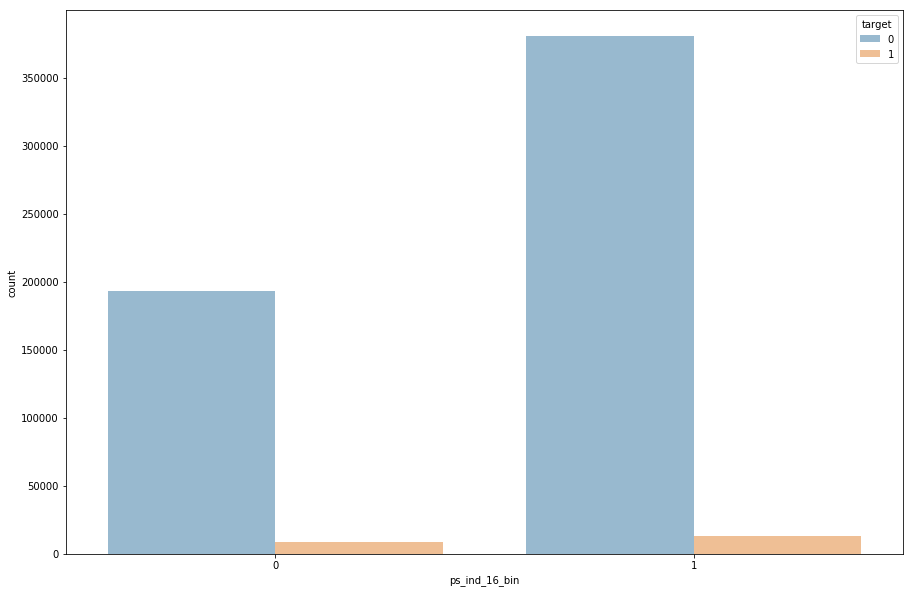

--------------------------------------------------
col:  ps_ind_17_bin


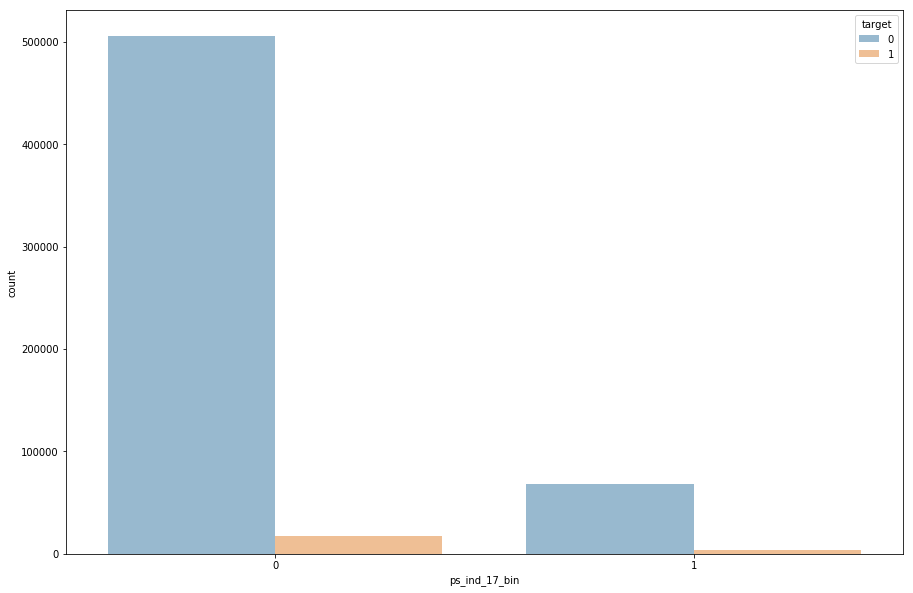

--------------------------------------------------
col:  ps_ind_18_bin


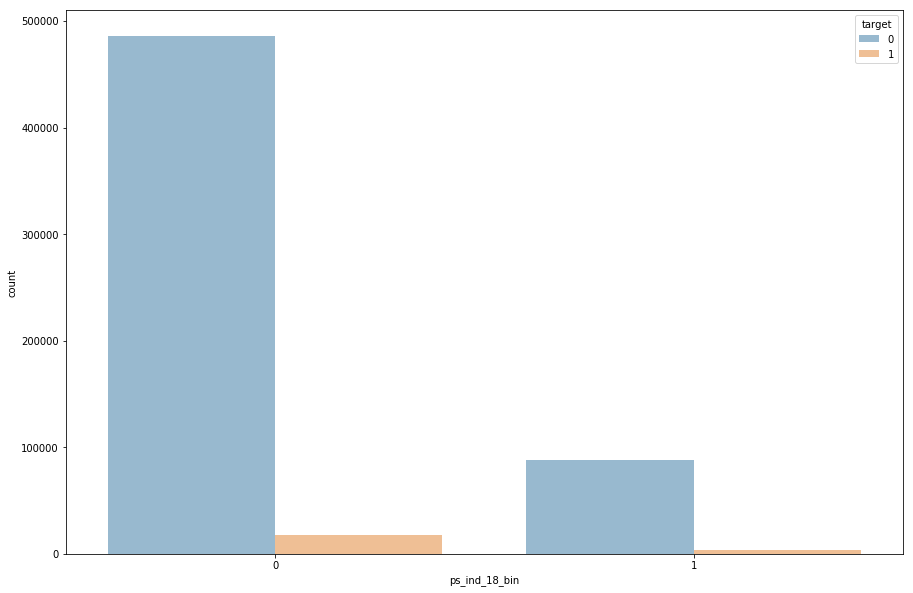

--------------------------------------------------
col:  ps_car_01_cat


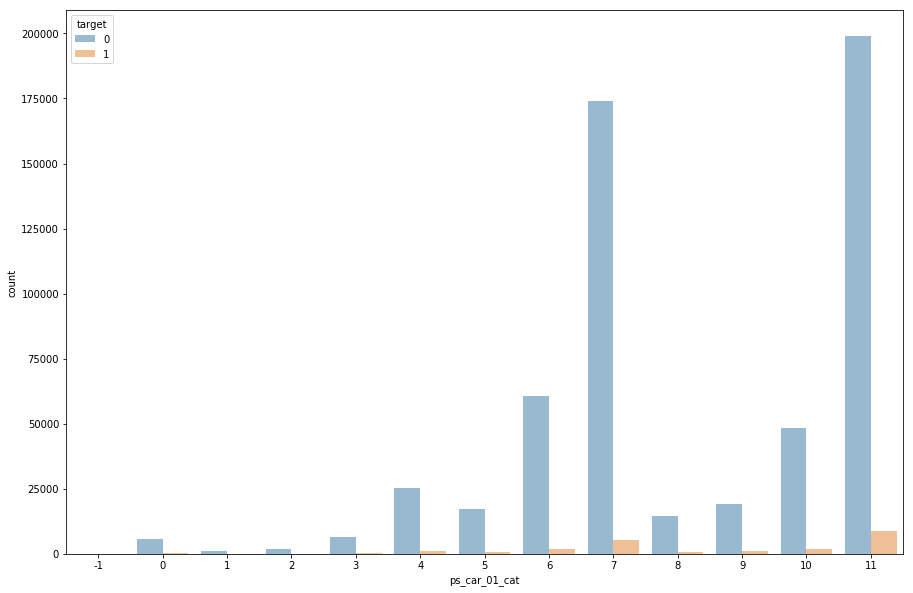

--------------------------------------------------
col:  ps_car_02_cat


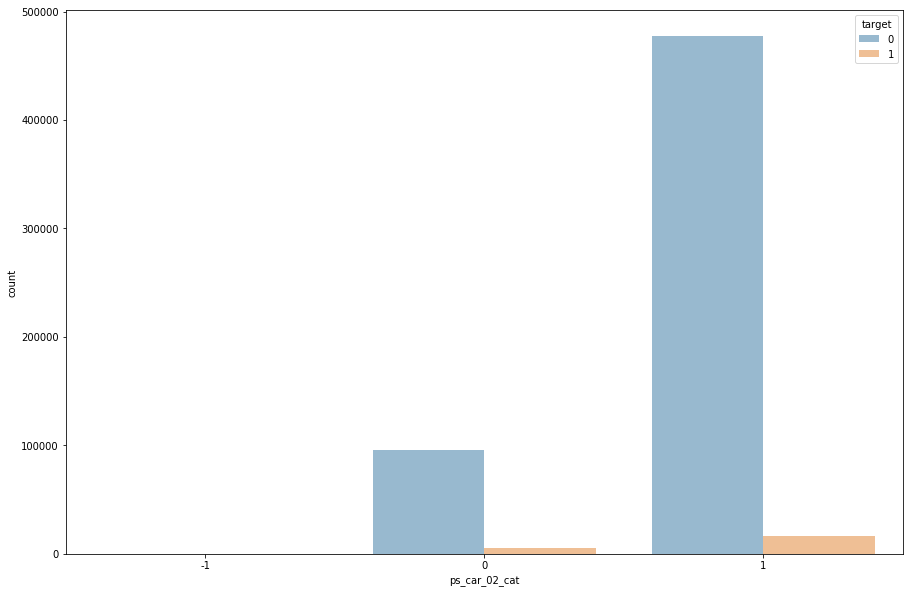

--------------------------------------------------
col:  ps_car_03_cat


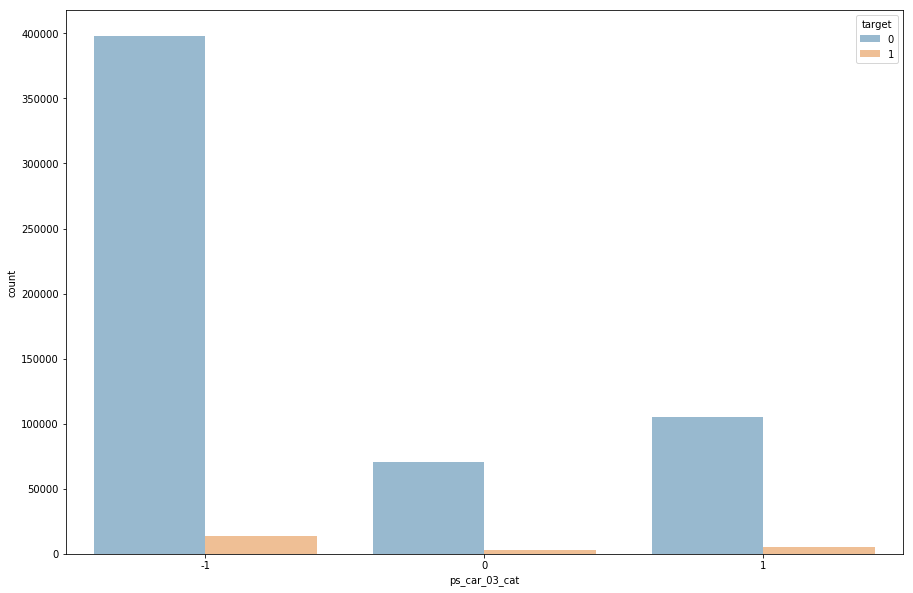

--------------------------------------------------
col:  ps_car_04_cat


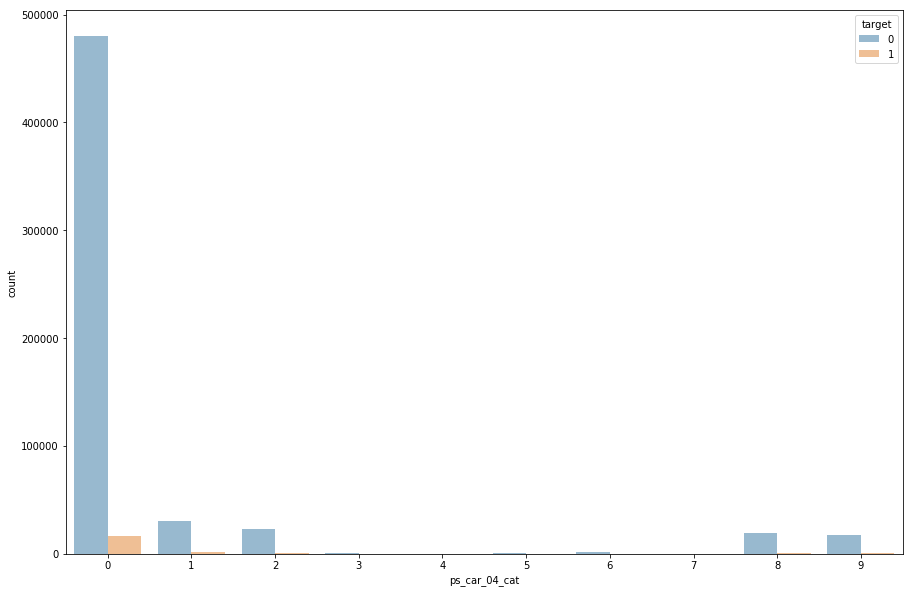

--------------------------------------------------
col:  ps_car_05_cat


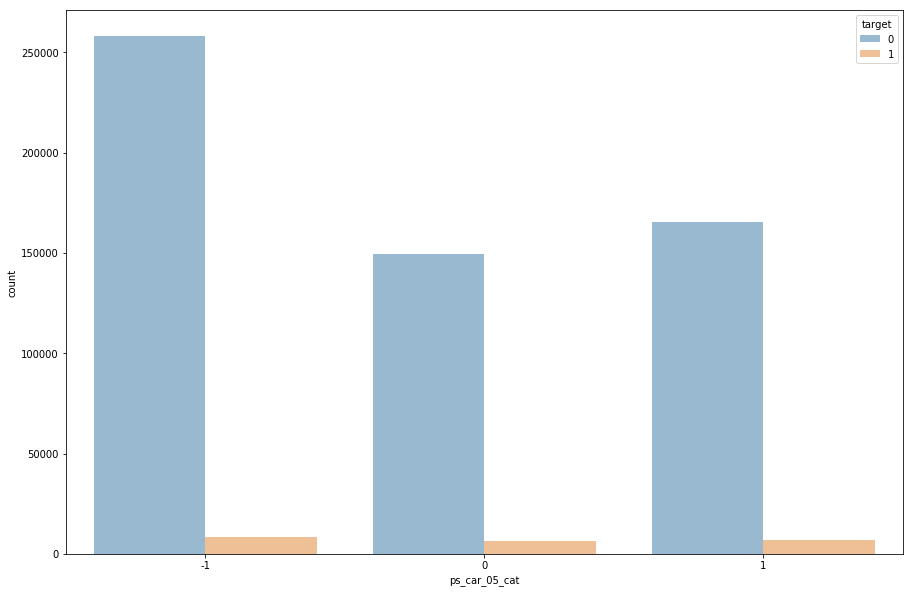

--------------------------------------------------
col:  ps_car_06_cat


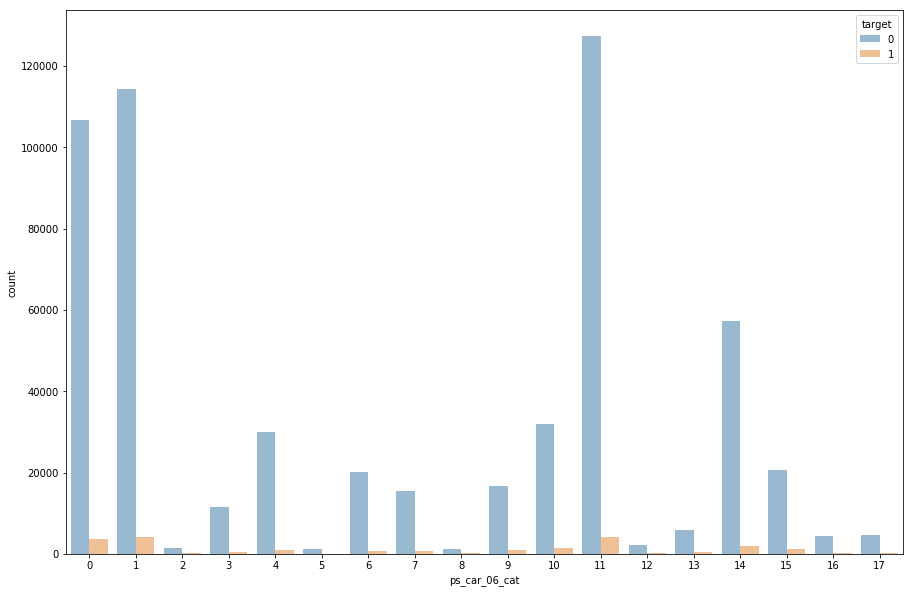

--------------------------------------------------
col:  ps_car_07_cat


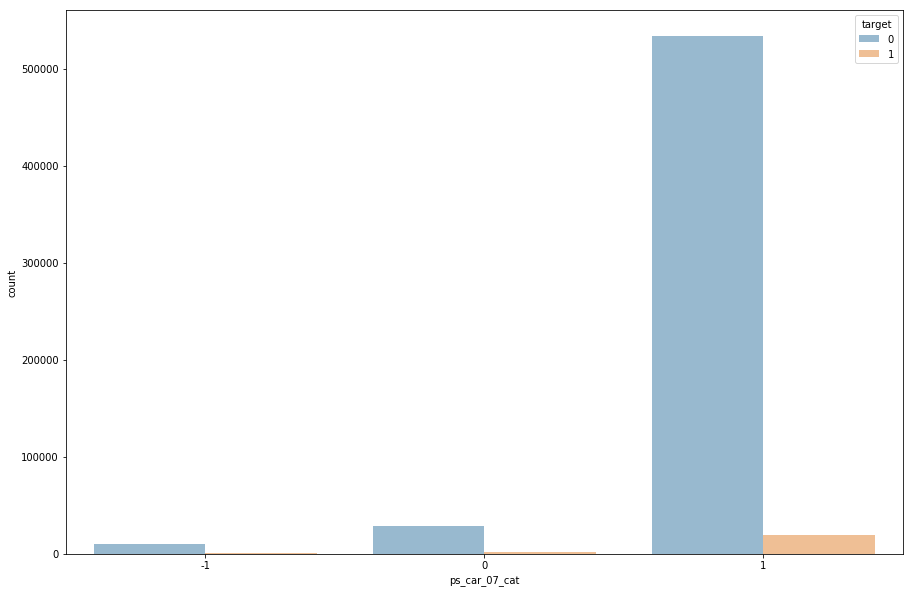

--------------------------------------------------
col:  ps_car_08_cat


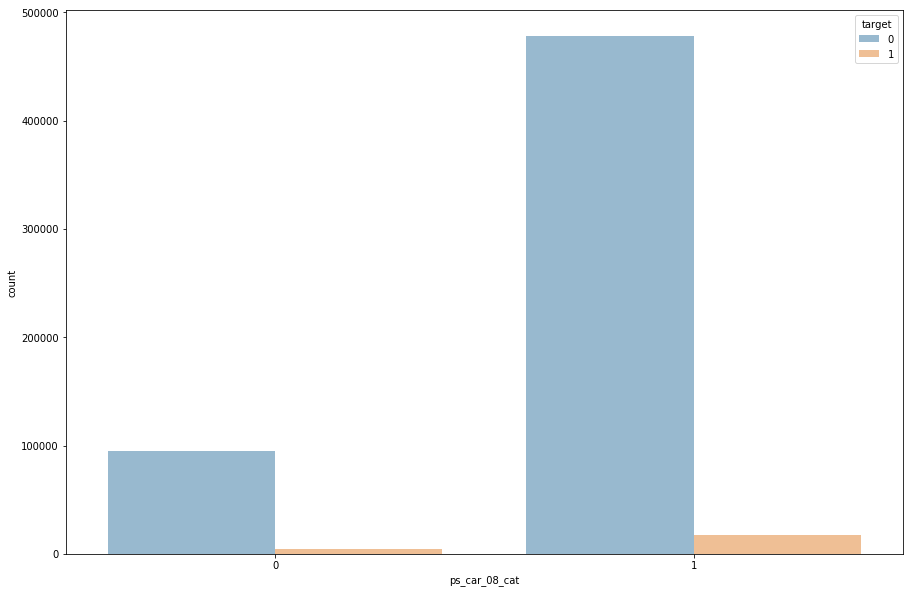

--------------------------------------------------
col:  ps_car_09_cat


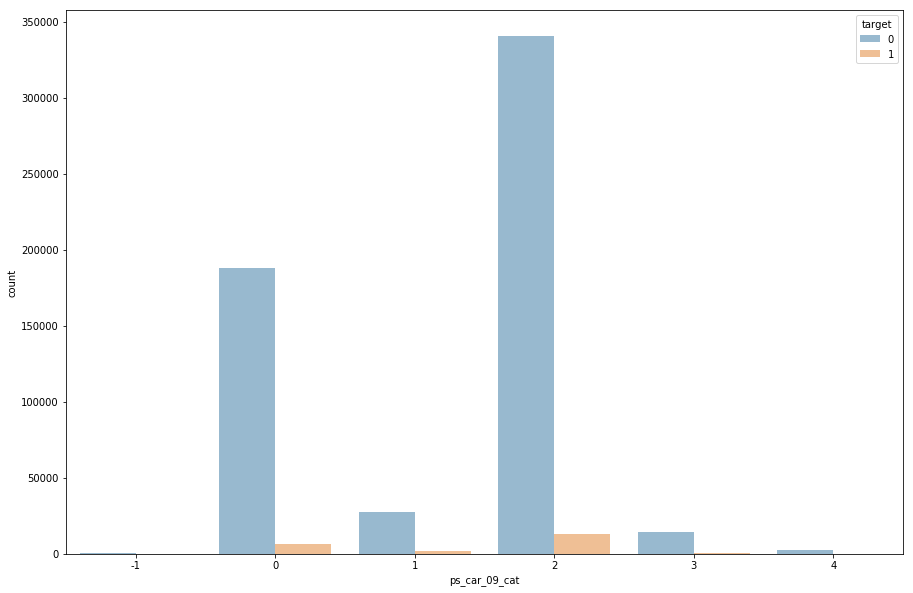

--------------------------------------------------
col:  ps_car_10_cat


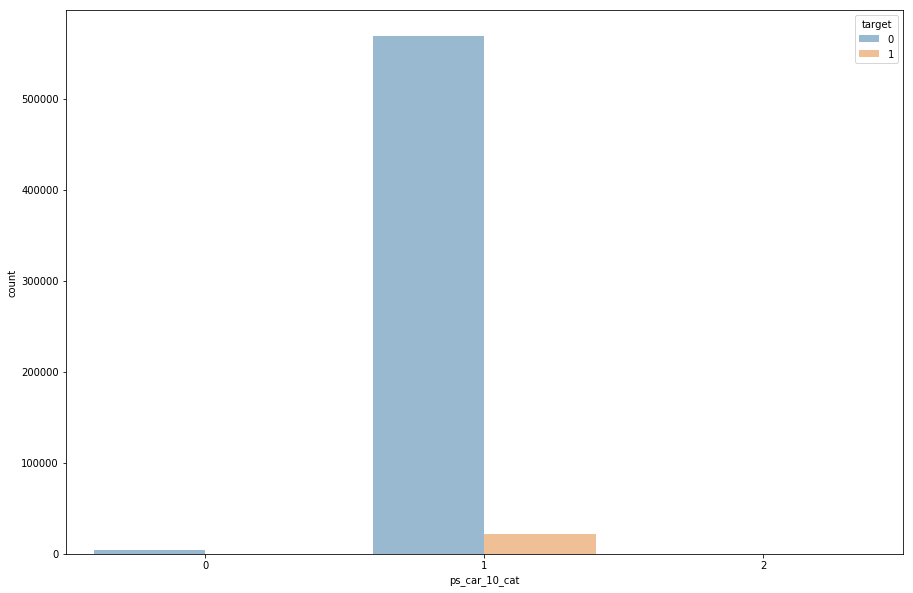

--------------------------------------------------
col:  ps_car_11_cat


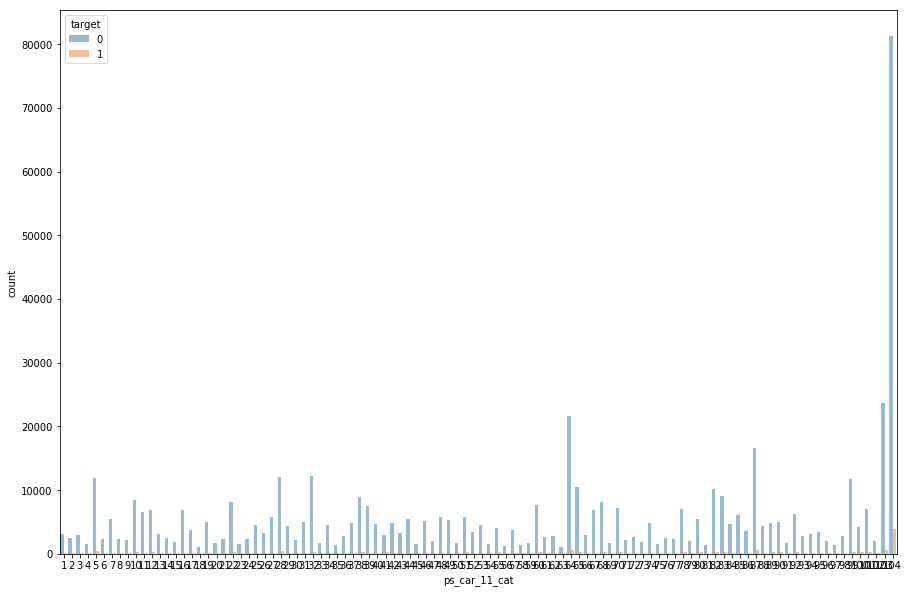

--------------------------------------------------
col:  ps_calc_15_bin


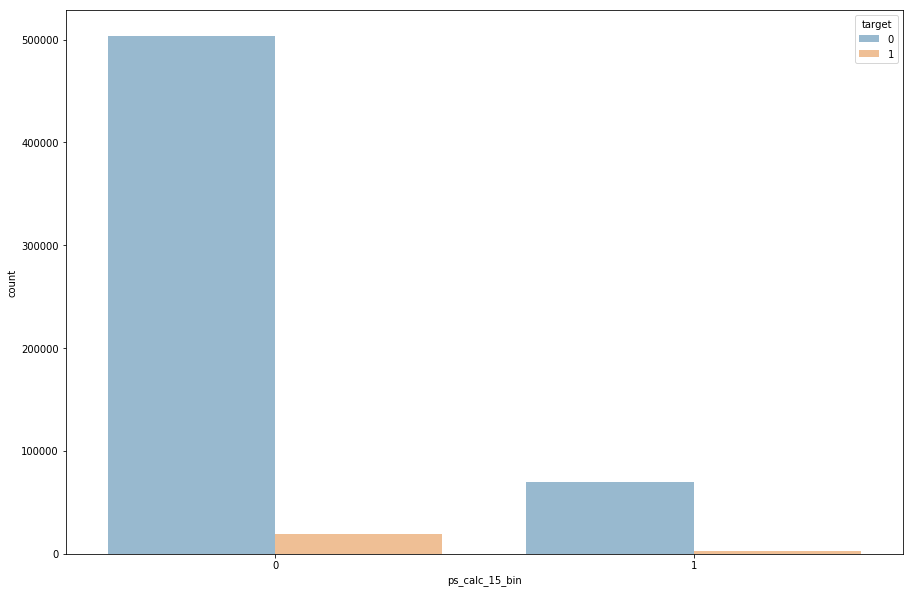

--------------------------------------------------
col:  ps_calc_16_bin


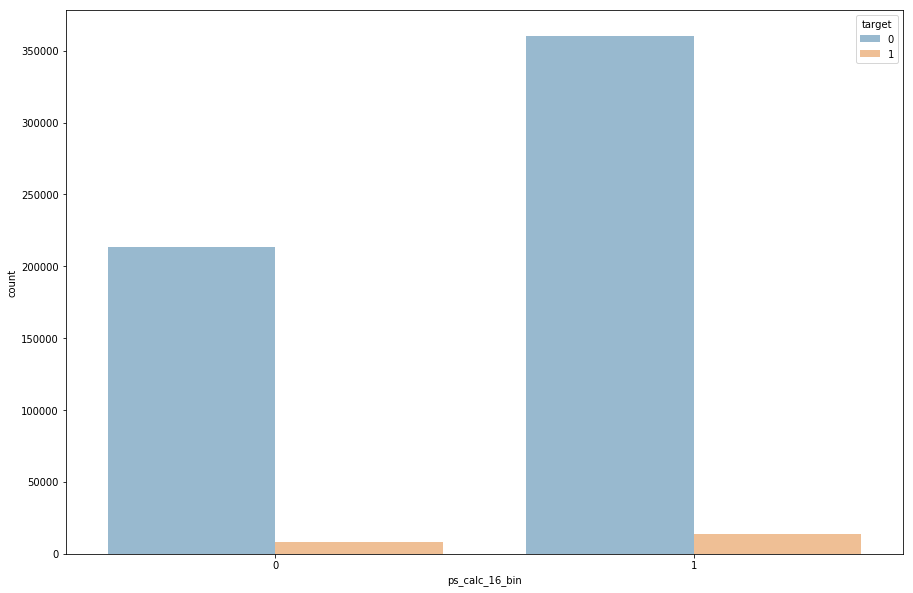

--------------------------------------------------
col:  ps_calc_17_bin


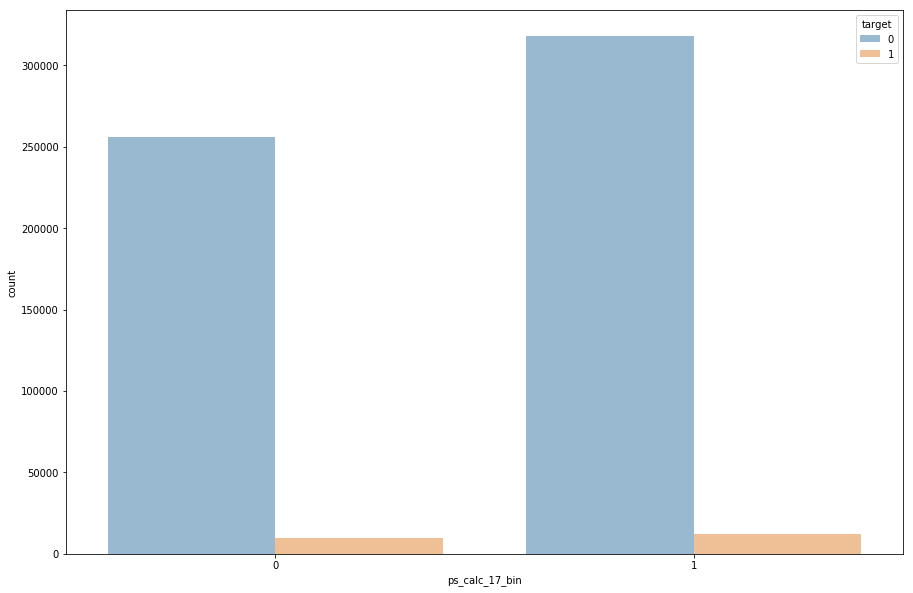

--------------------------------------------------
col:  ps_calc_18_bin


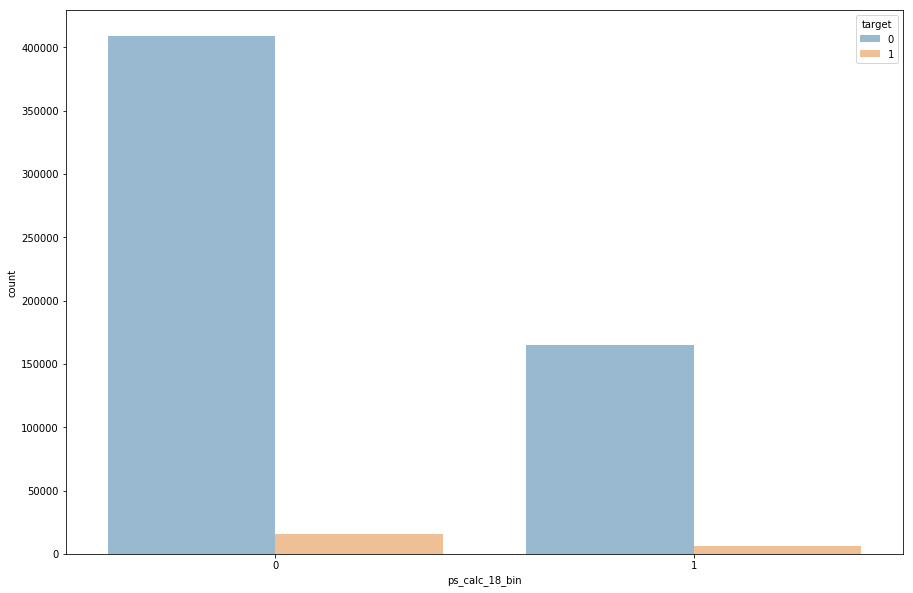

--------------------------------------------------
col:  ps_calc_19_bin


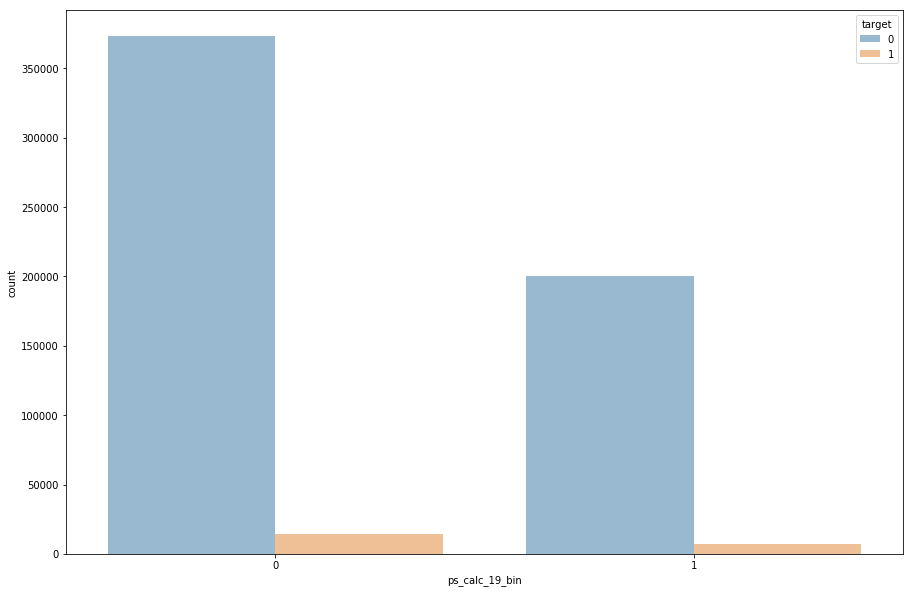

--------------------------------------------------
col:  ps_calc_20_bin


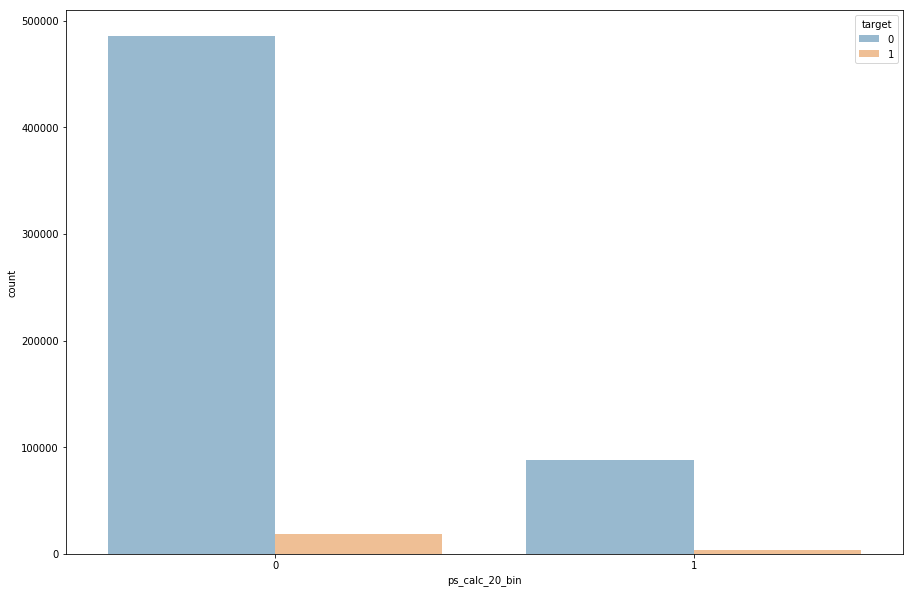

In [25]:
for col in cat_bin_vars:            
    print('-' * 50)
    print('col: ', col)
    
    f, ax = plt.subplots(figsize=(15,10))
    sns.countplot(x=col, data=train, hue='target', alpha=0.5)
    plt.show()

### 2. continuous 변수 시각화

#### for col in con_ord_vars:            
    print('-' * 50)
    print('col: ', col)
    
    f, ax = plt.subplots(figsize=(15,10))
    plt.hist(train[col], alpha=0.5, bins=50)
    plt.show()

--------------------------------------------------
col:  ps_ind_01


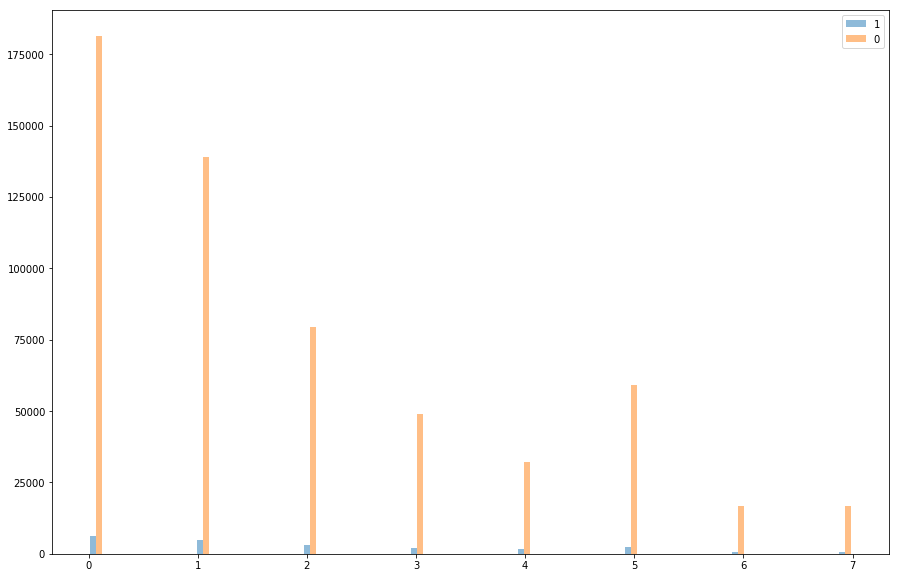

--------------------------------------------------
col:  ps_ind_03


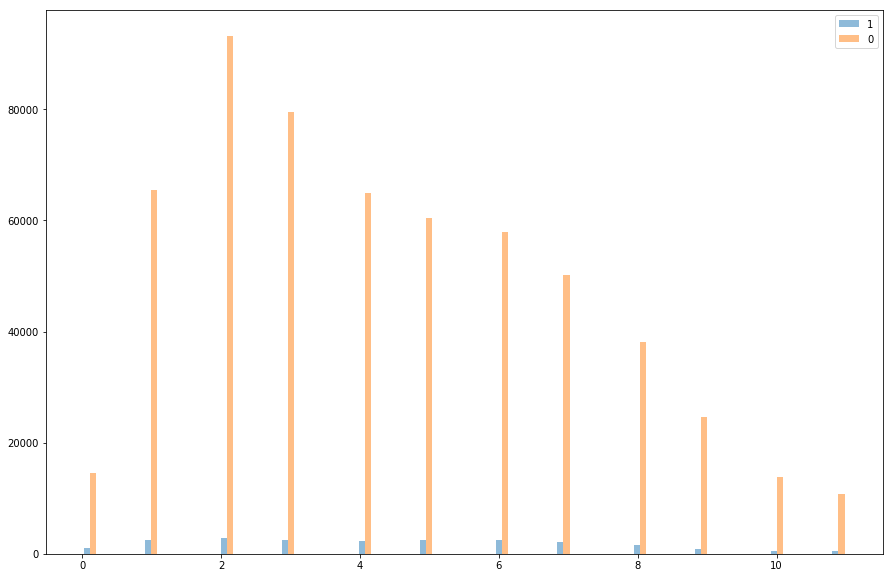

--------------------------------------------------
col:  ps_ind_14


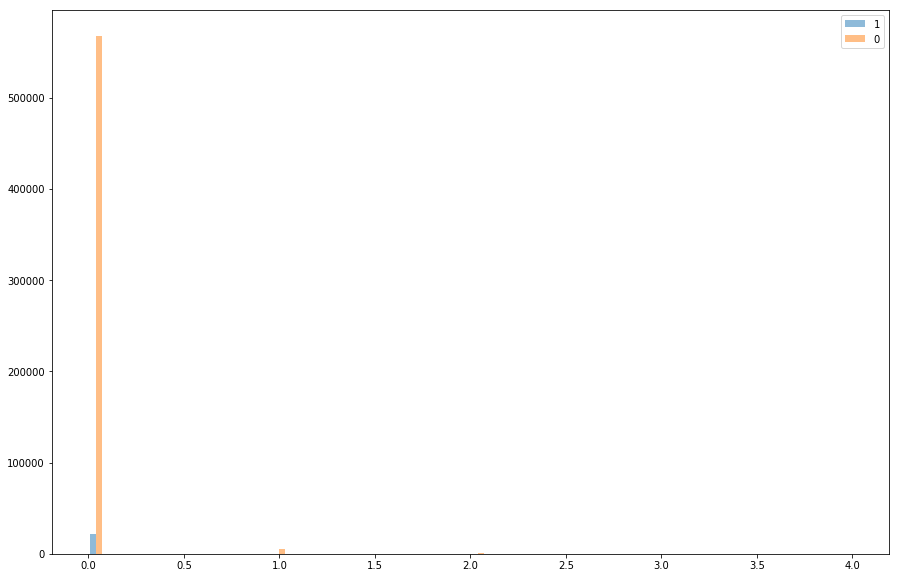

--------------------------------------------------
col:  ps_ind_15


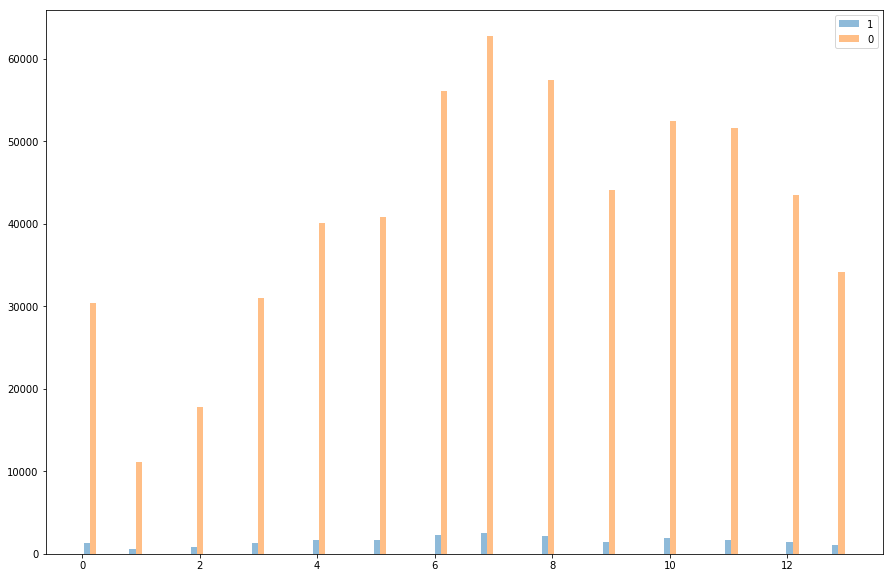

--------------------------------------------------
col:  ps_reg_01


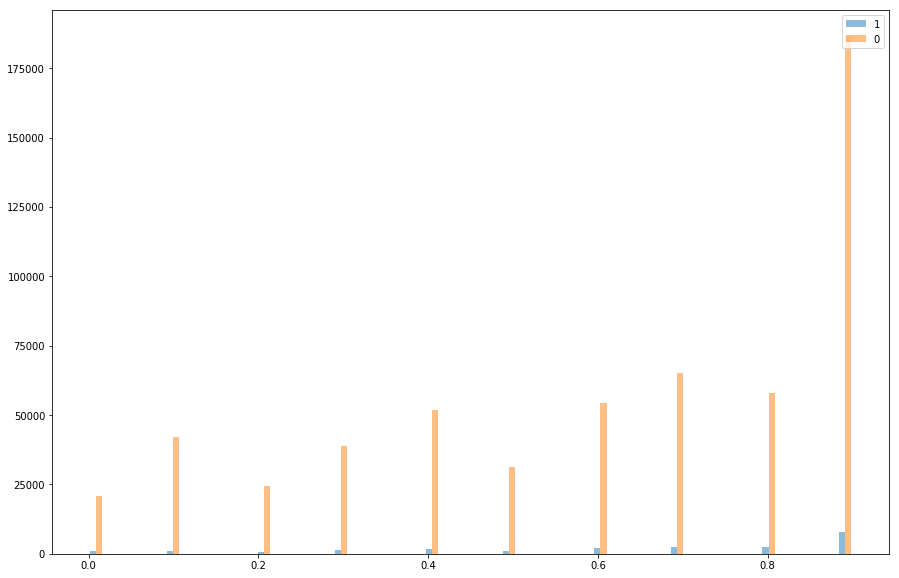

--------------------------------------------------
col:  ps_reg_02


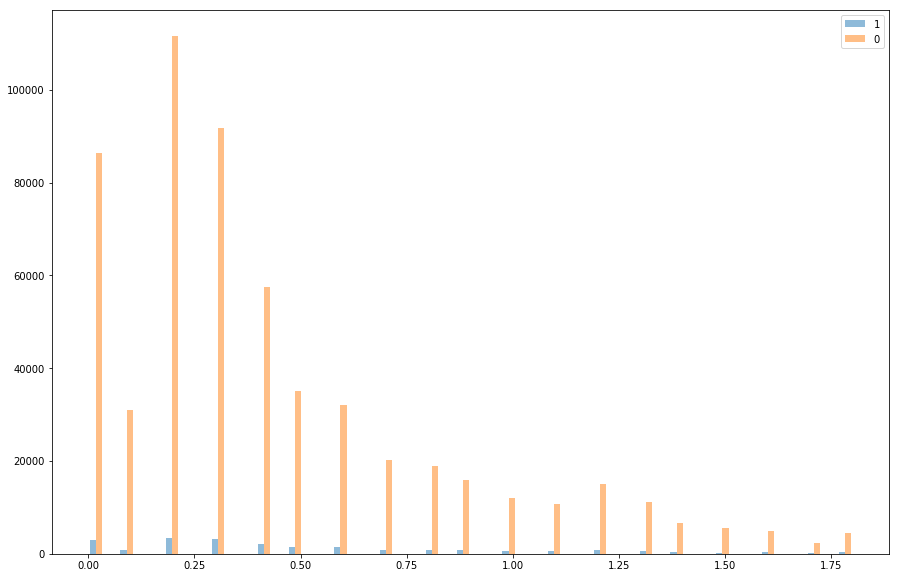

--------------------------------------------------
col:  ps_reg_03


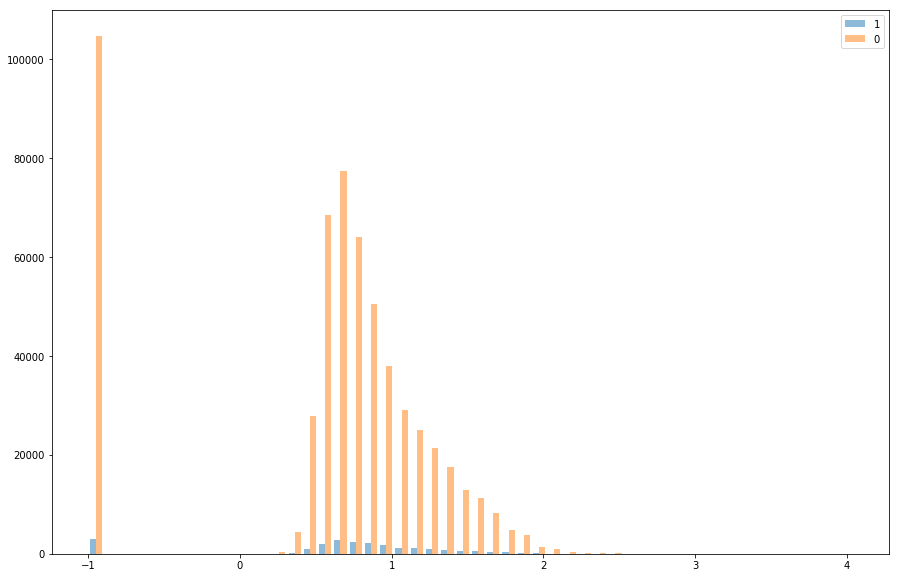

--------------------------------------------------
col:  ps_car_11


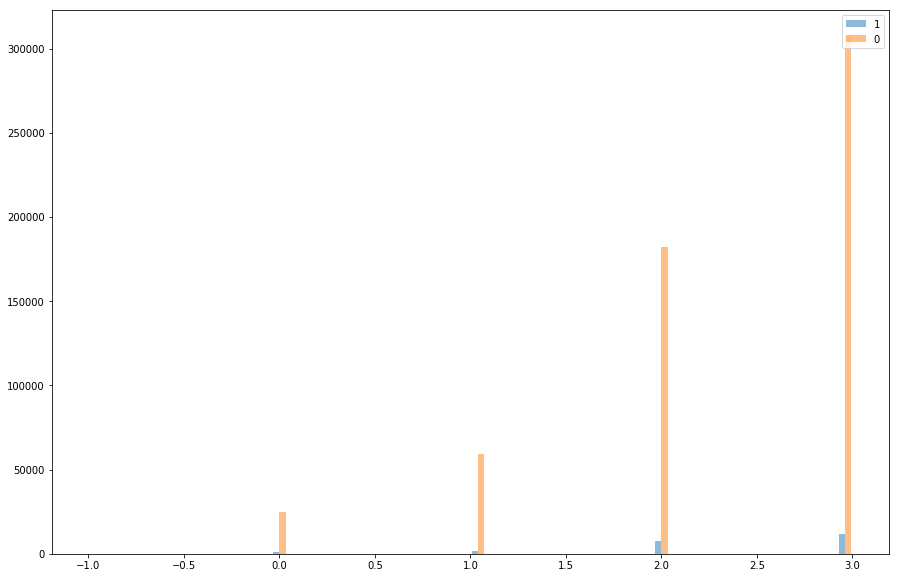

--------------------------------------------------
col:  ps_car_12


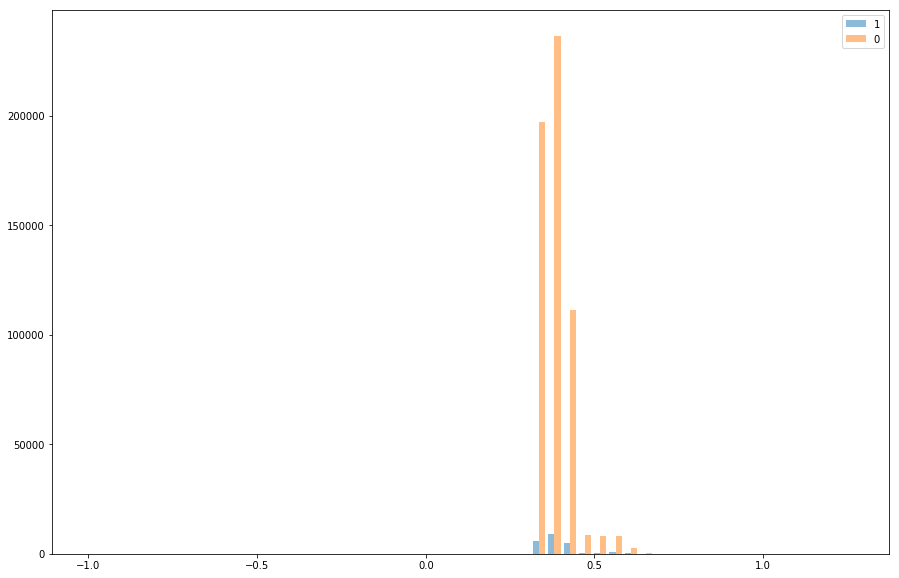

--------------------------------------------------
col:  ps_car_13


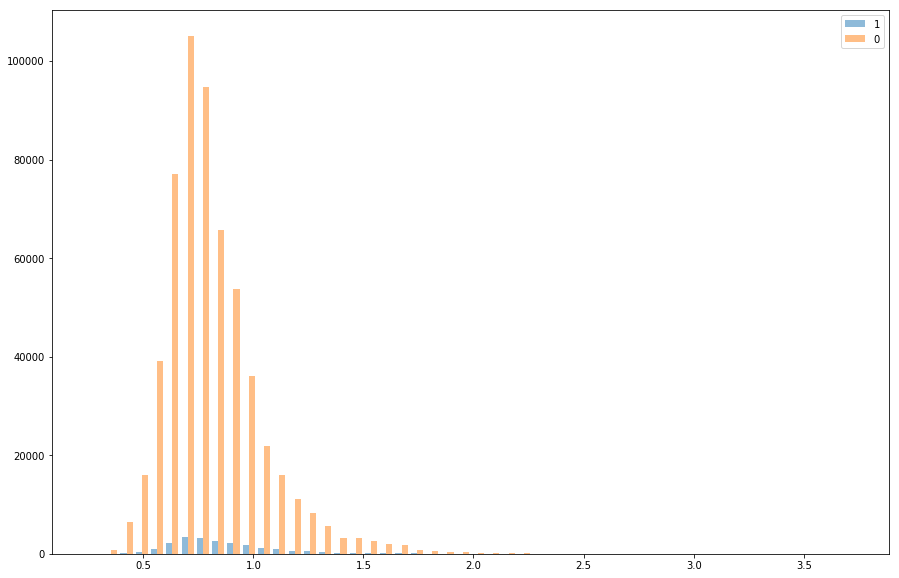

--------------------------------------------------
col:  ps_car_14


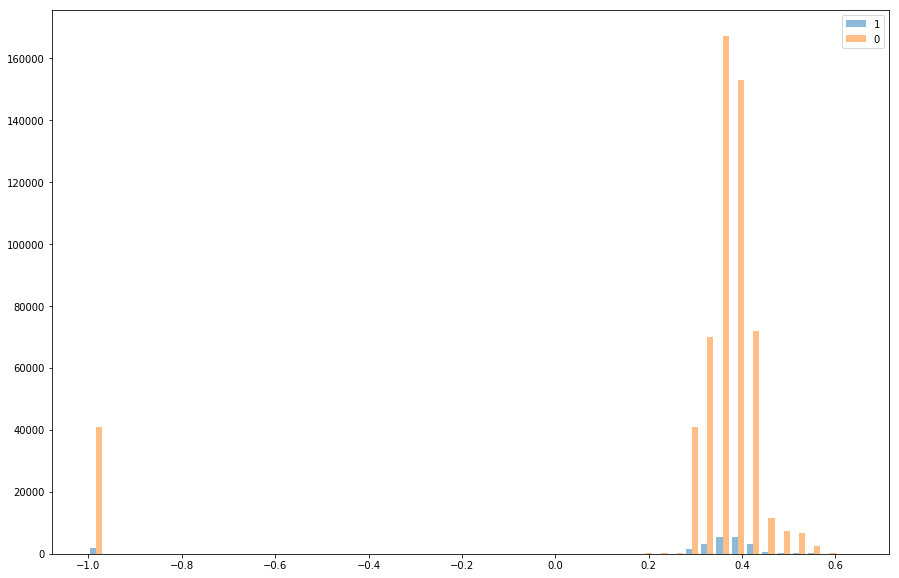

--------------------------------------------------
col:  ps_car_15


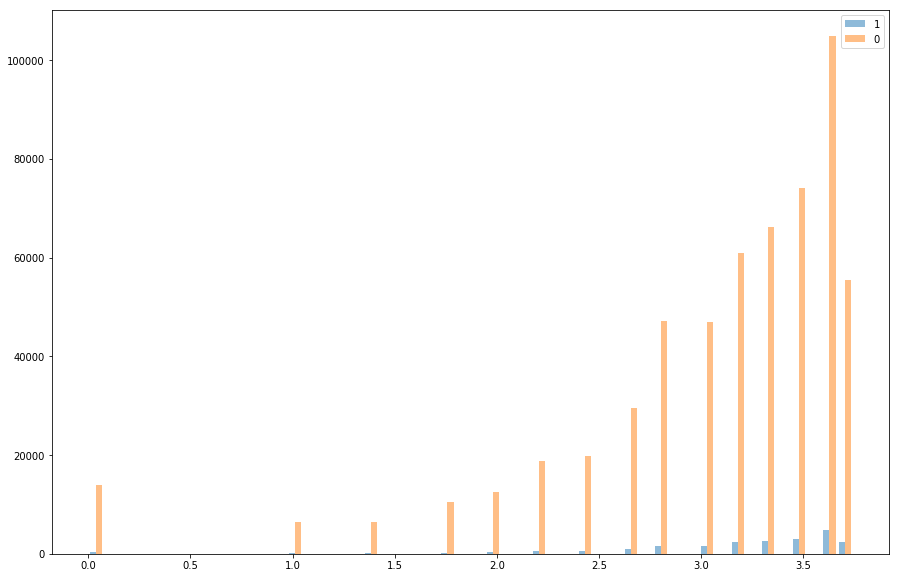

--------------------------------------------------
col:  ps_calc_01


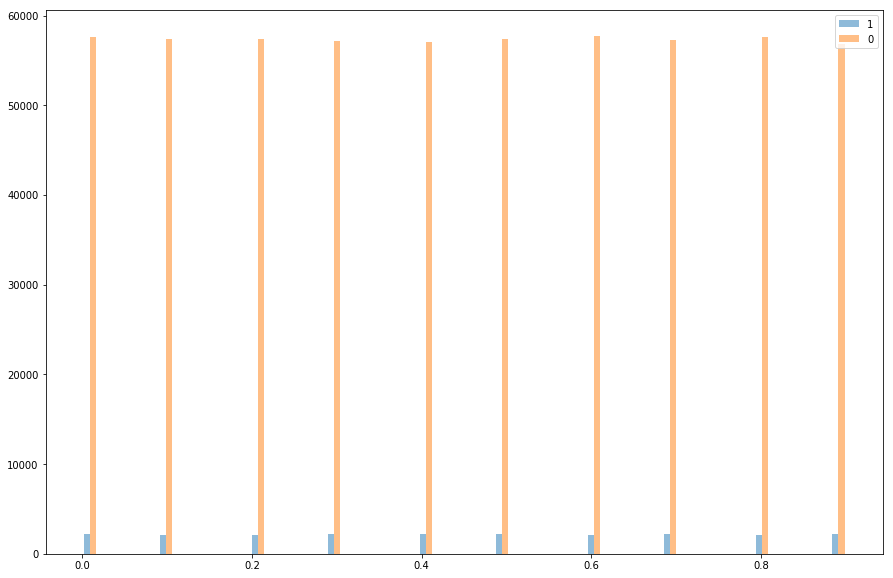

--------------------------------------------------
col:  ps_calc_02


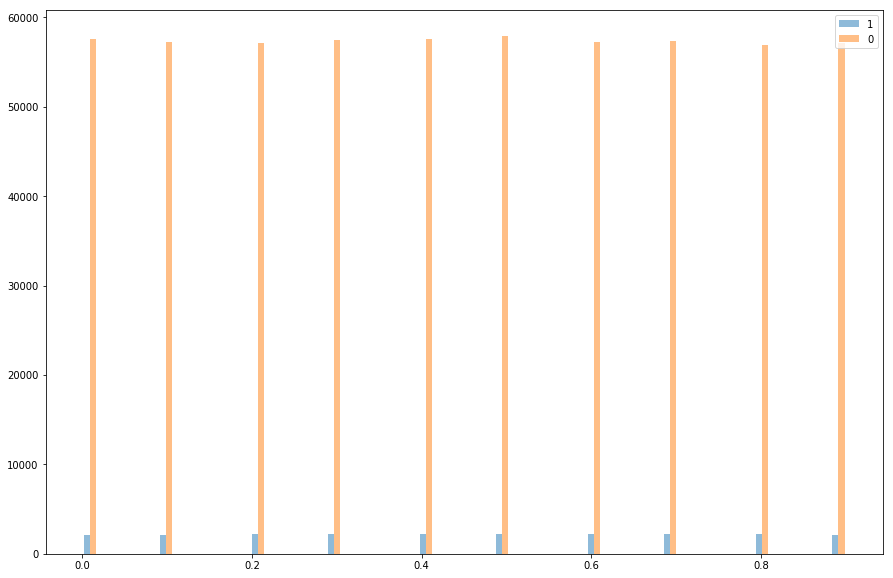

--------------------------------------------------
col:  ps_calc_03


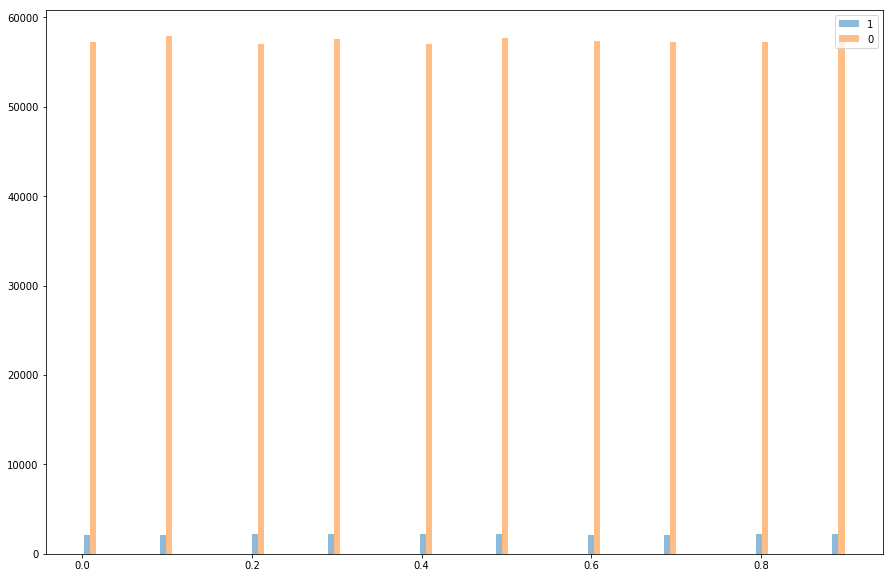

--------------------------------------------------
col:  ps_calc_04


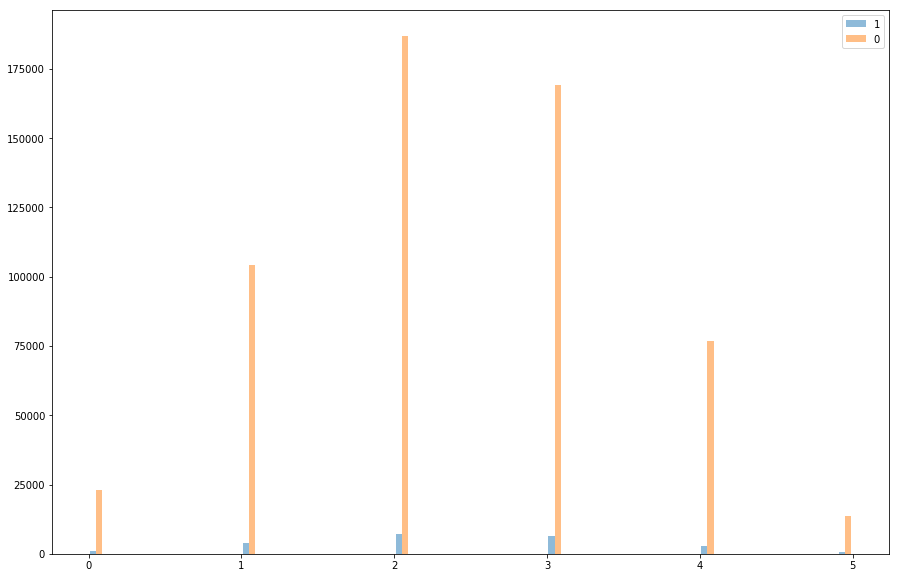

--------------------------------------------------
col:  ps_calc_05


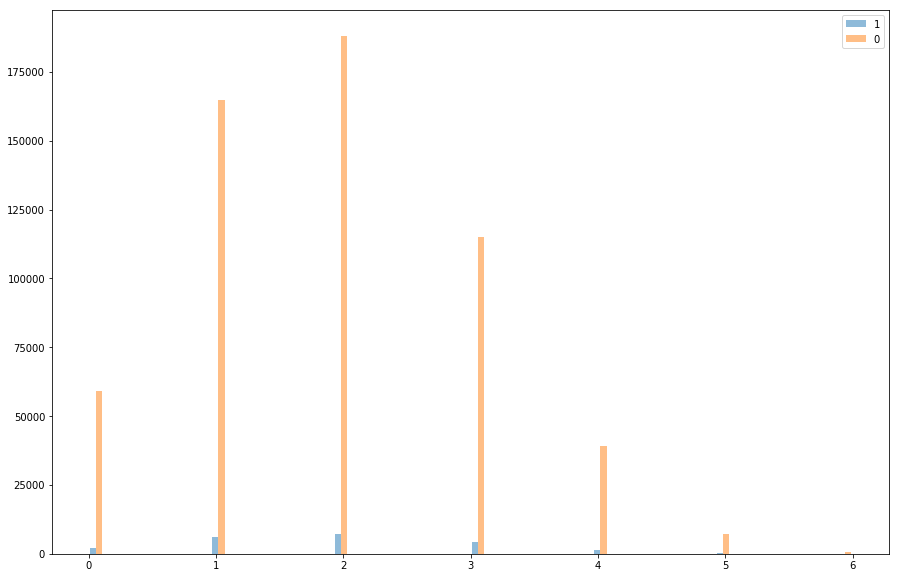

--------------------------------------------------
col:  ps_calc_06


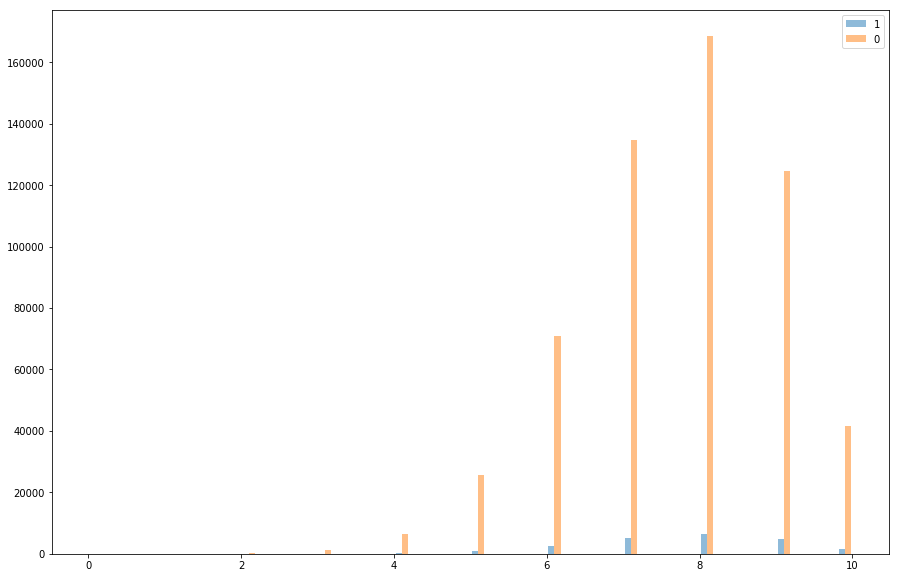

--------------------------------------------------
col:  ps_calc_07


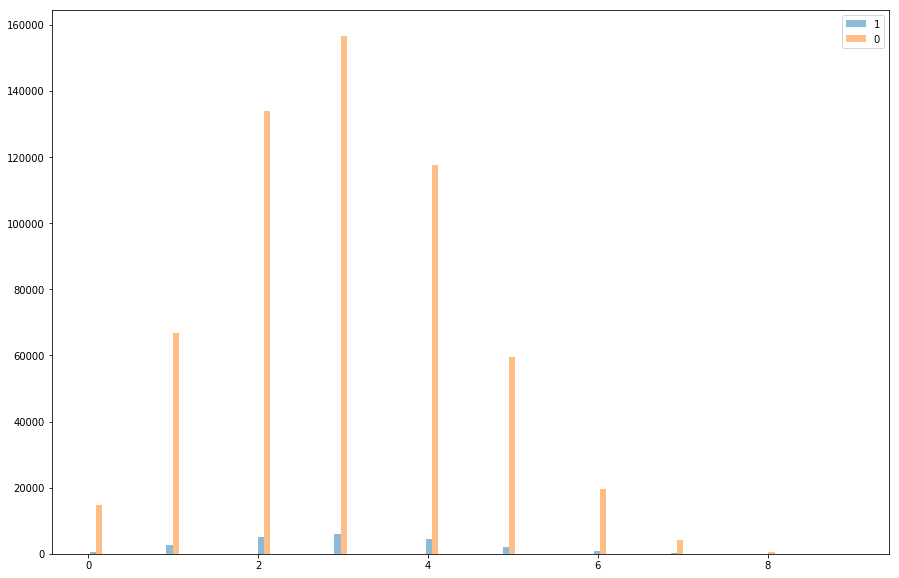

--------------------------------------------------
col:  ps_calc_08


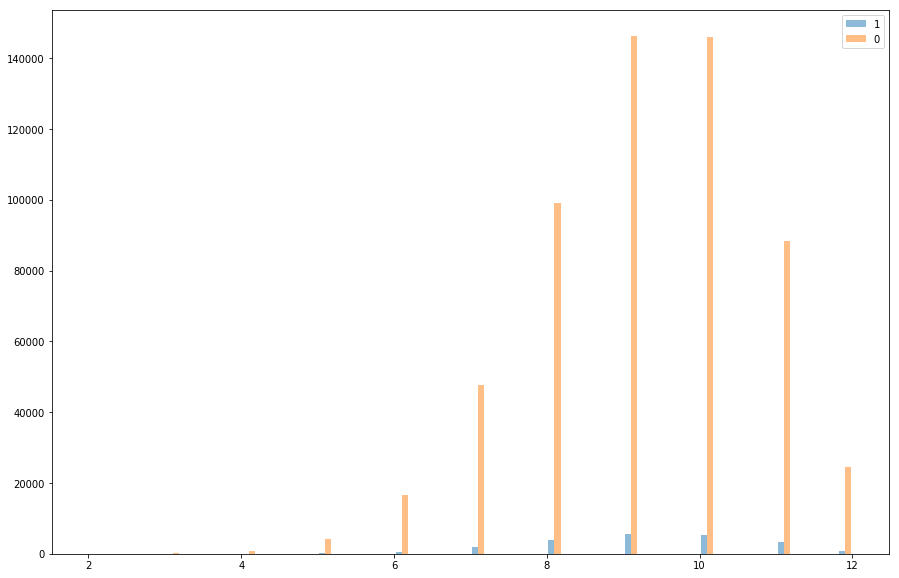

--------------------------------------------------
col:  ps_calc_09


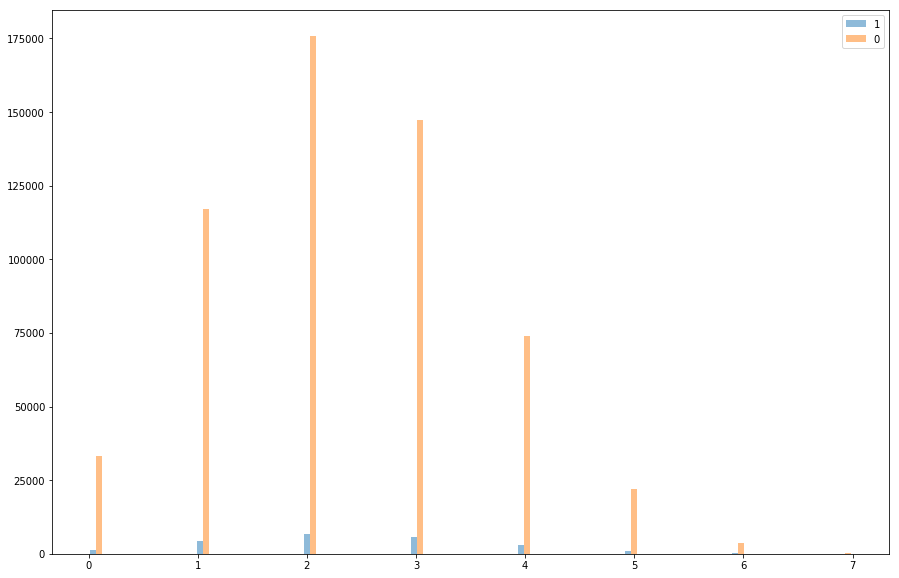

--------------------------------------------------
col:  ps_calc_10


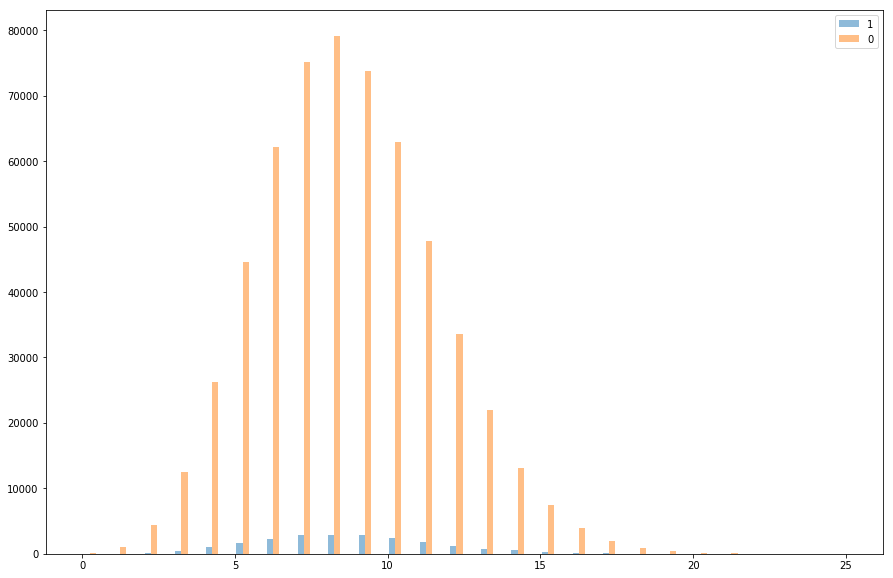

--------------------------------------------------
col:  ps_calc_11


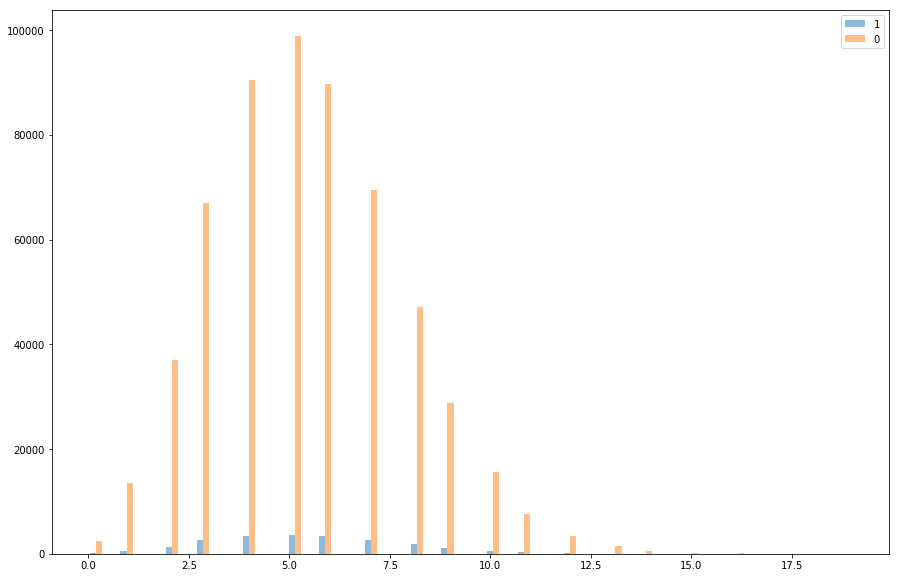

--------------------------------------------------
col:  ps_calc_12


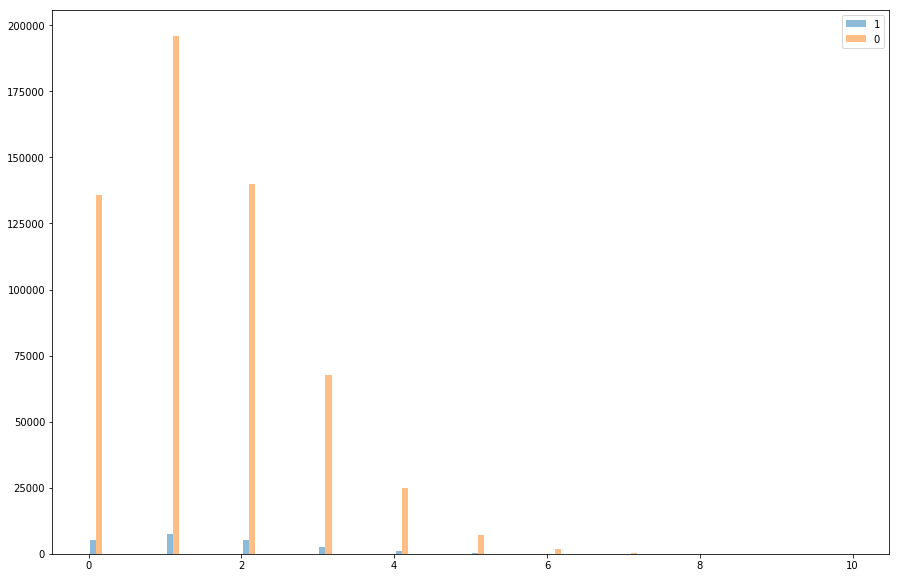

--------------------------------------------------
col:  ps_calc_13


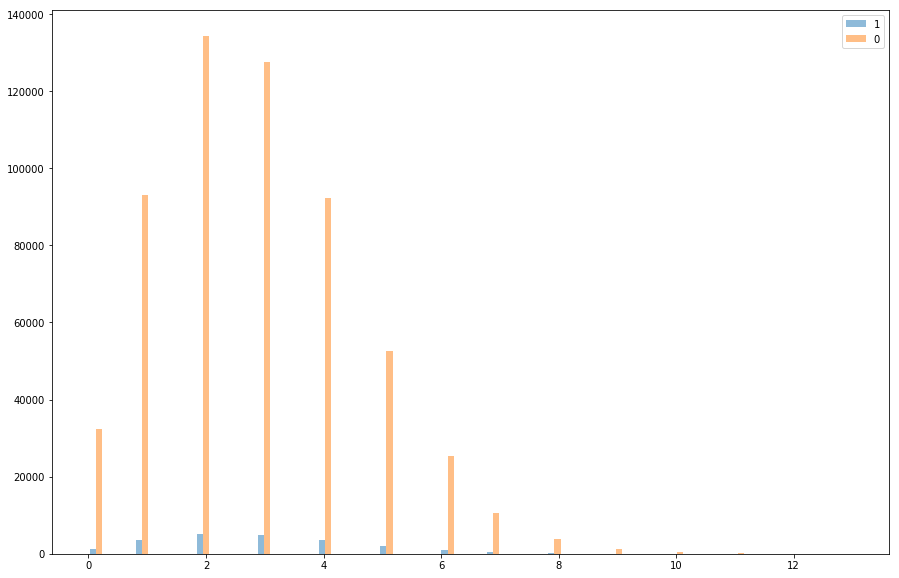

--------------------------------------------------
col:  ps_calc_14


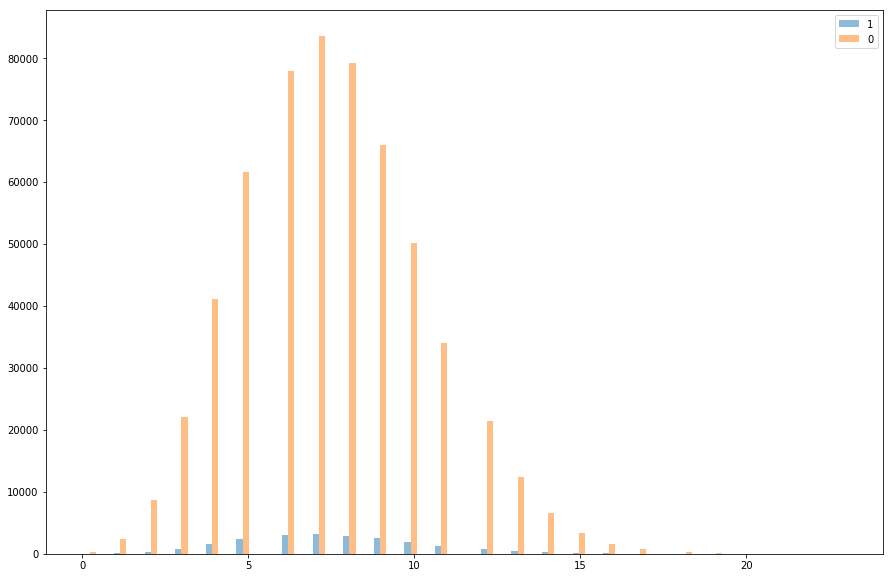

In [27]:
for col in con_ord_vars:            
    print('-' * 50)
    print('col: ', col)
    
    f, ax = plt.subplots(figsize=(15,10))
    plt.hist([train[train['target'] == 1][col], train[train['target'] == 0][col]], alpha=0.5, bins=50, label=[1,0])
    plt.legend(loc='upper right')
    plt.show()

### 3. target과 변수간의 관계

In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [84]:
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams['font.size'] = 15

### 3-1. categorical

--------------------------------------------------
col:  ps_ind_02_cat


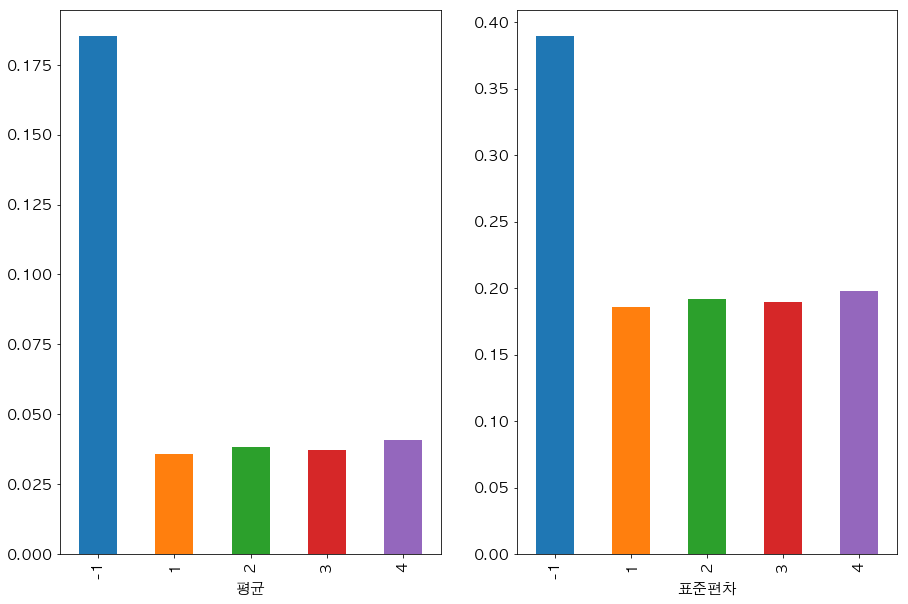

--------------------------------------------------
col:  ps_ind_04_cat


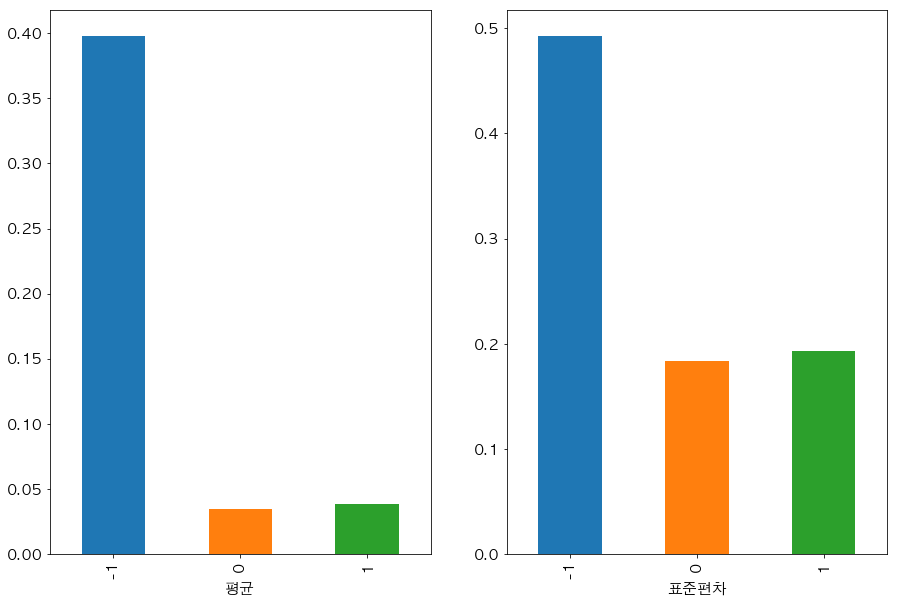

--------------------------------------------------
col:  ps_ind_05_cat


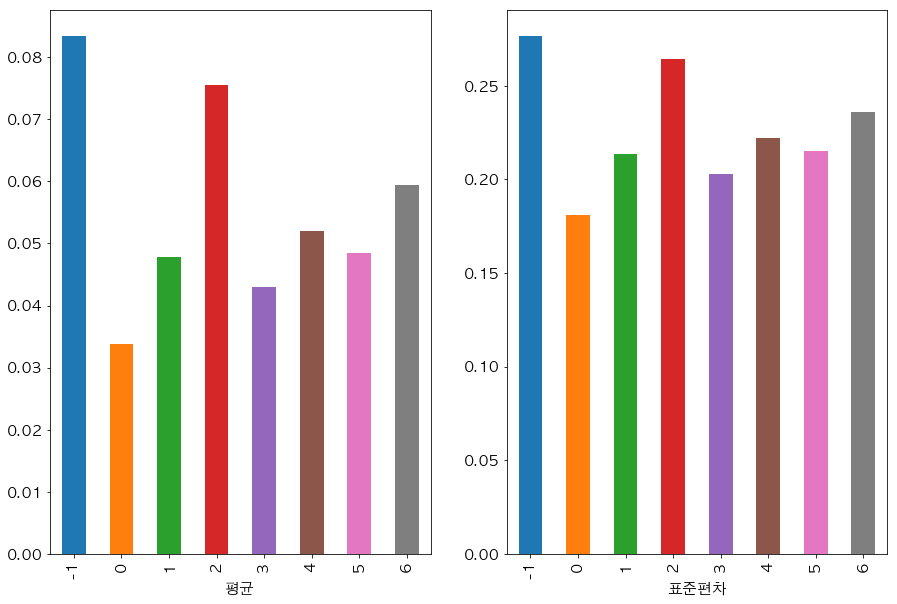

--------------------------------------------------
col:  ps_ind_06_bin


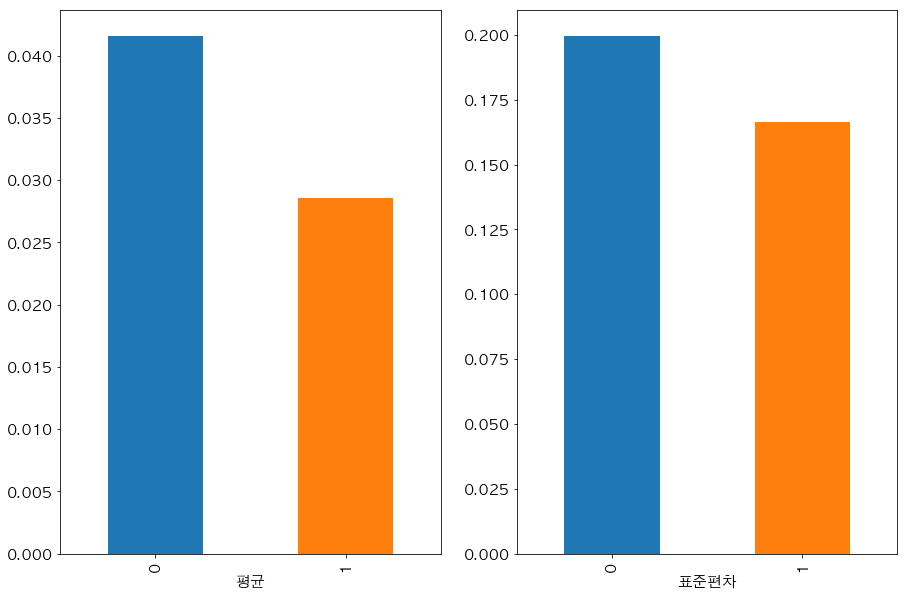

--------------------------------------------------
col:  ps_ind_07_bin


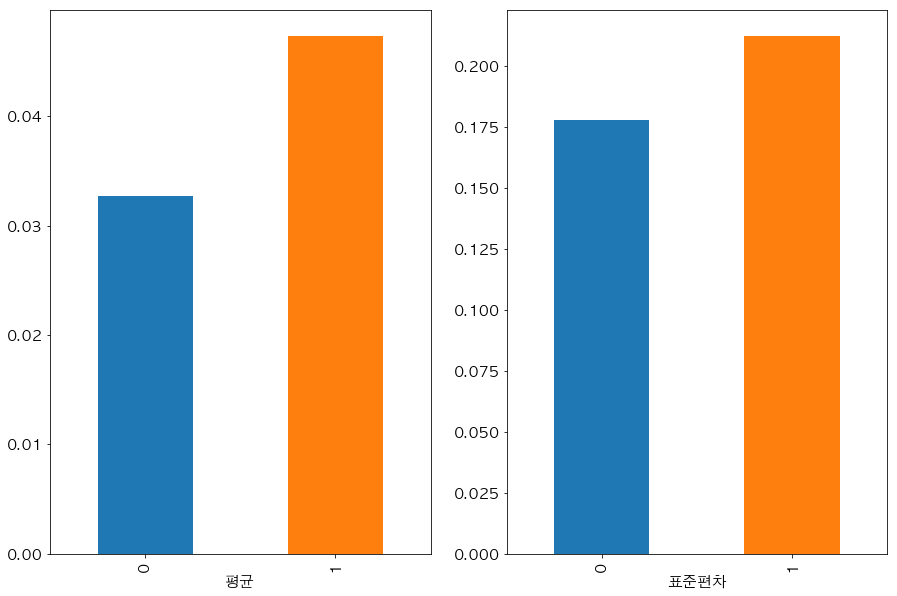

--------------------------------------------------
col:  ps_ind_08_bin


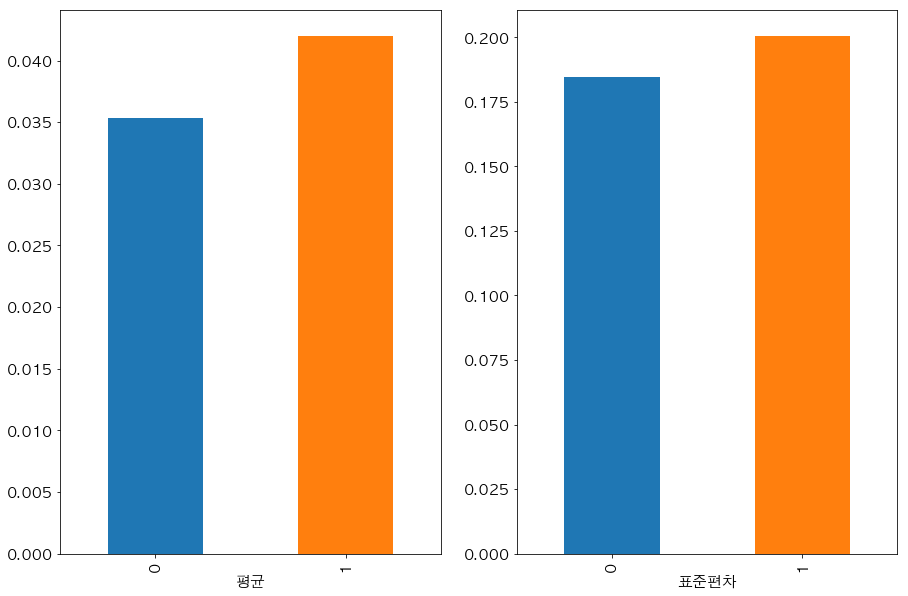

--------------------------------------------------
col:  ps_ind_09_bin


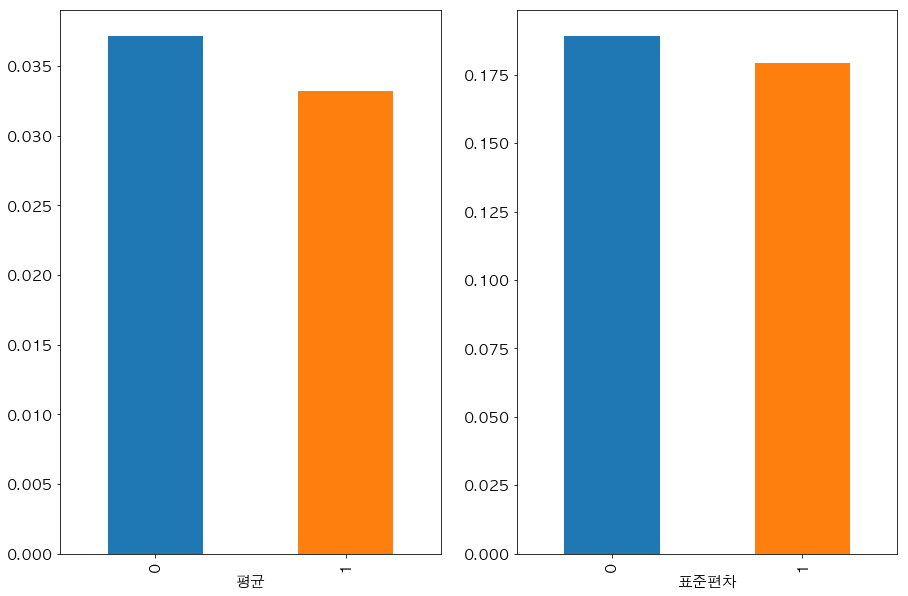

--------------------------------------------------
col:  ps_ind_10_bin


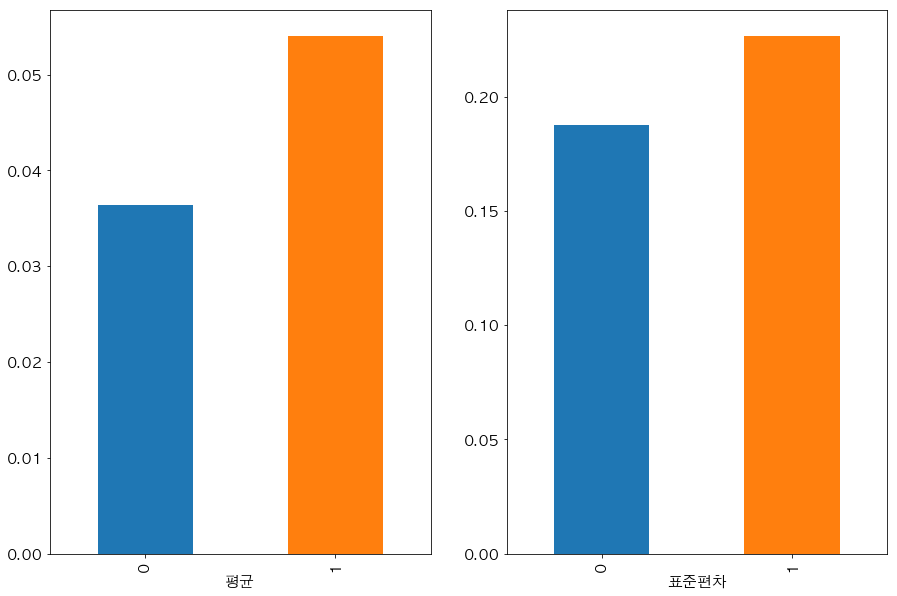

--------------------------------------------------
col:  ps_ind_11_bin


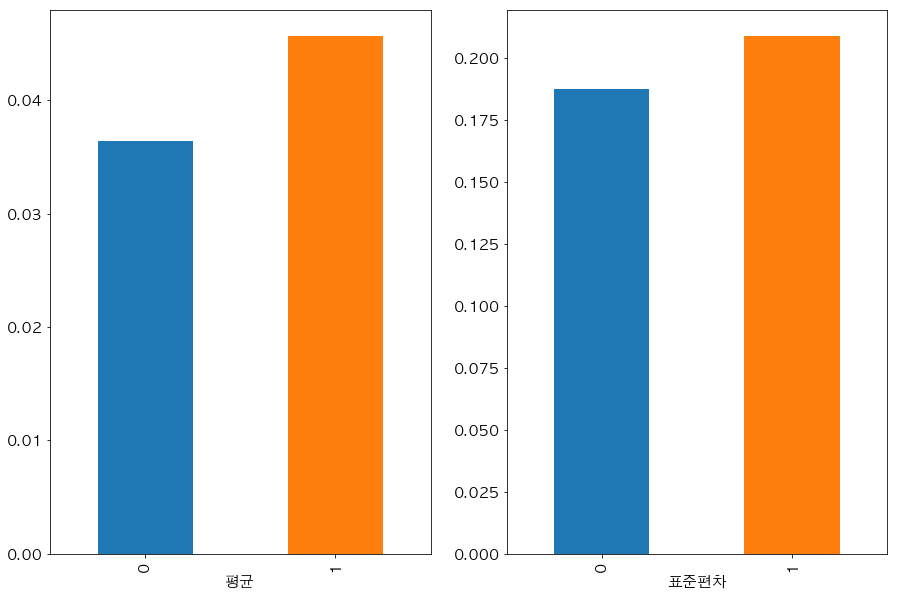

--------------------------------------------------
col:  ps_ind_12_bin


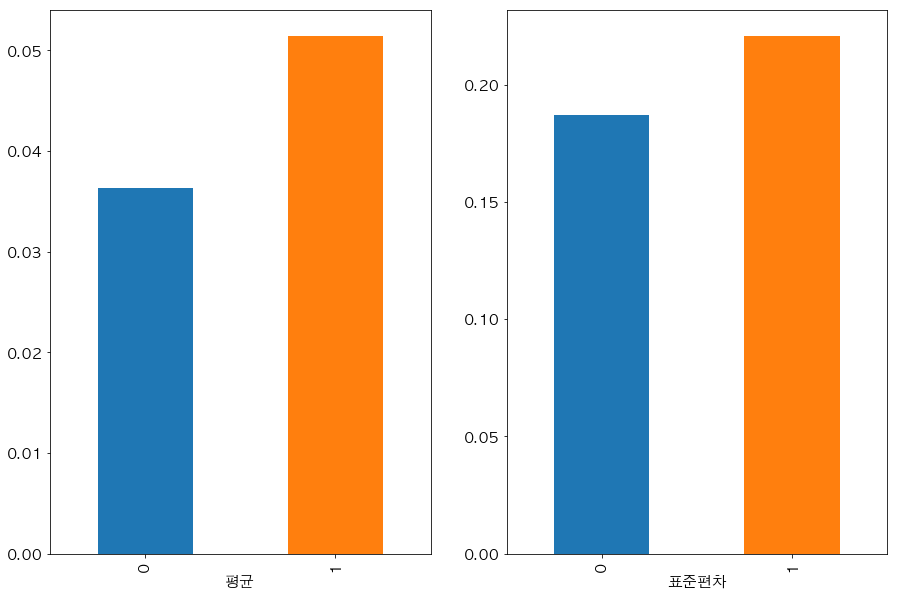

--------------------------------------------------
col:  ps_ind_13_bin


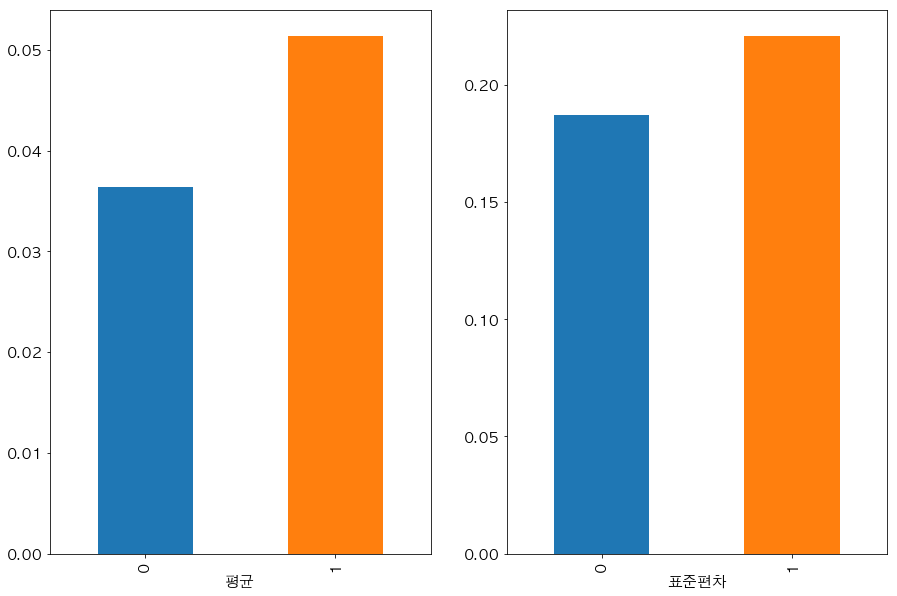

--------------------------------------------------
col:  ps_ind_16_bin


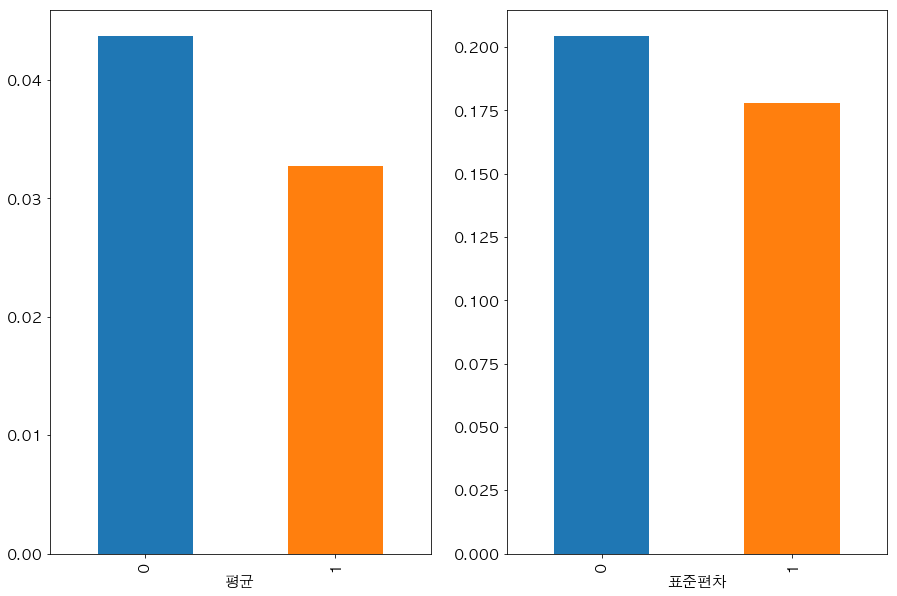

--------------------------------------------------
col:  ps_ind_17_bin


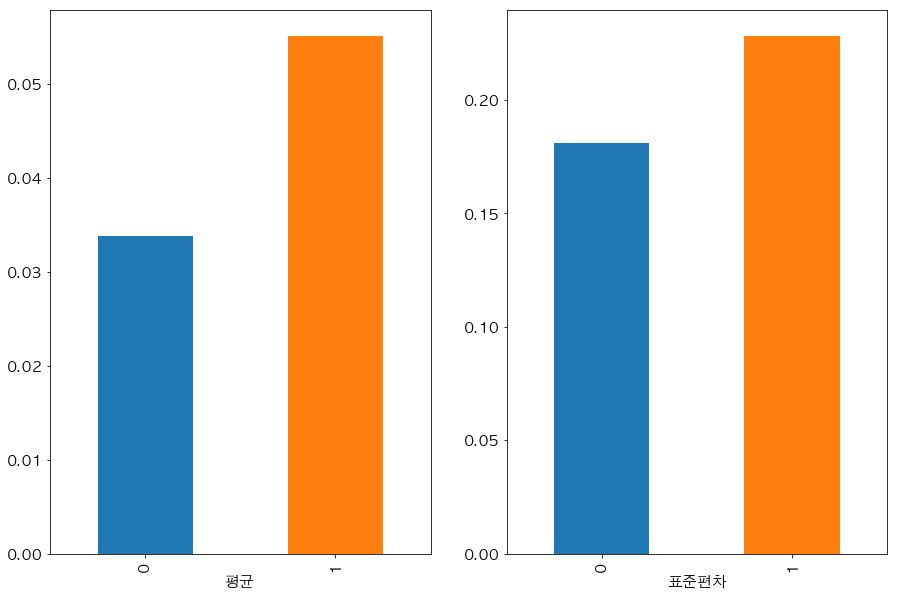

--------------------------------------------------
col:  ps_ind_18_bin


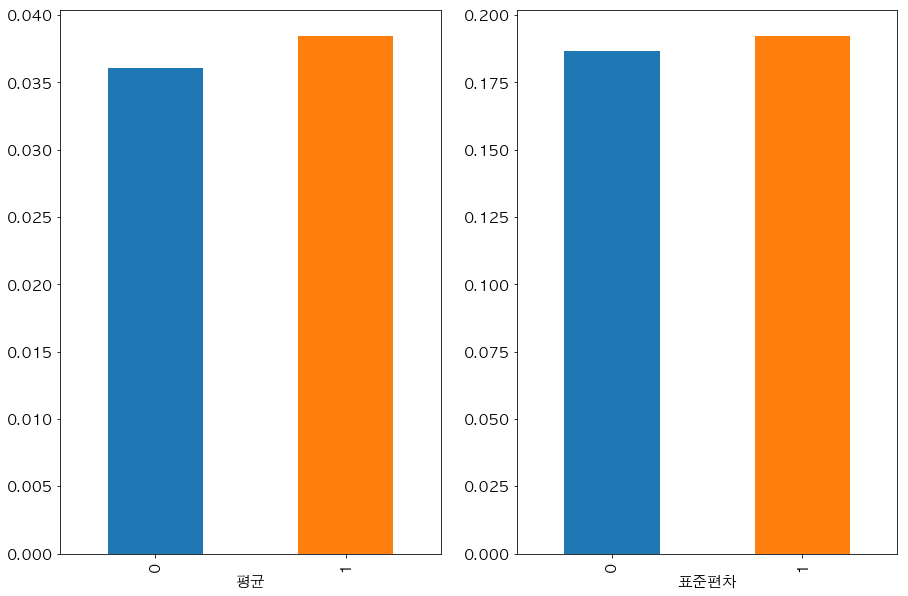

--------------------------------------------------
col:  ps_car_01_cat


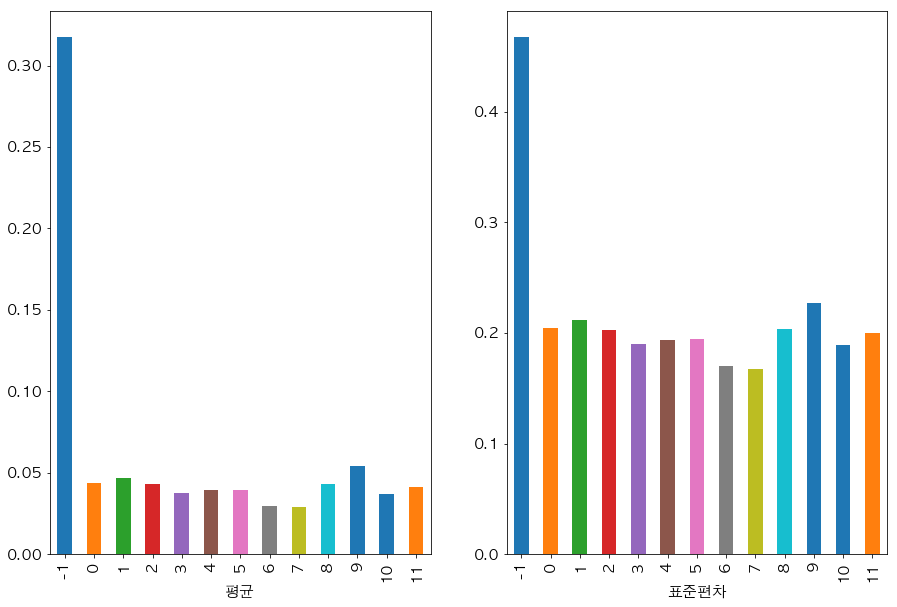

--------------------------------------------------
col:  ps_car_02_cat


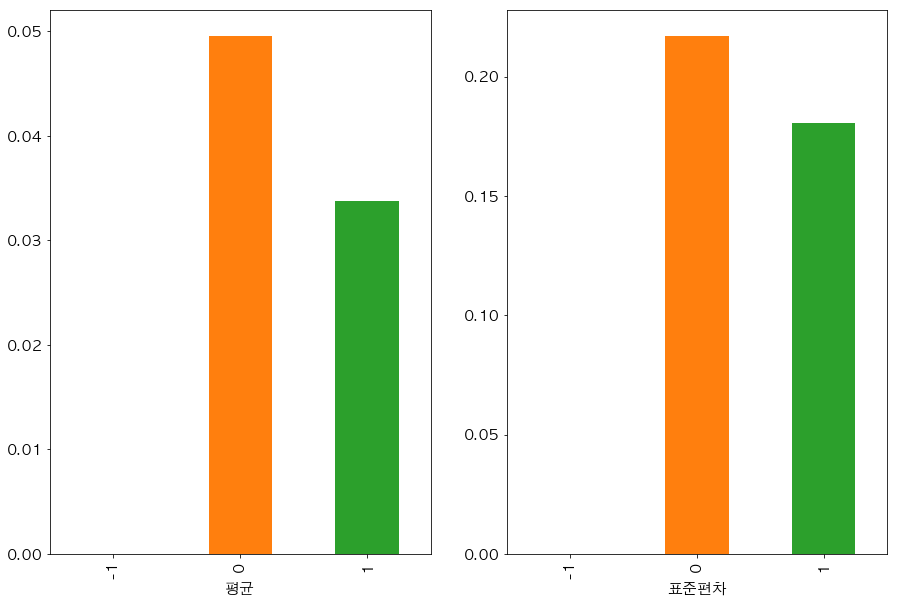

--------------------------------------------------
col:  ps_car_03_cat


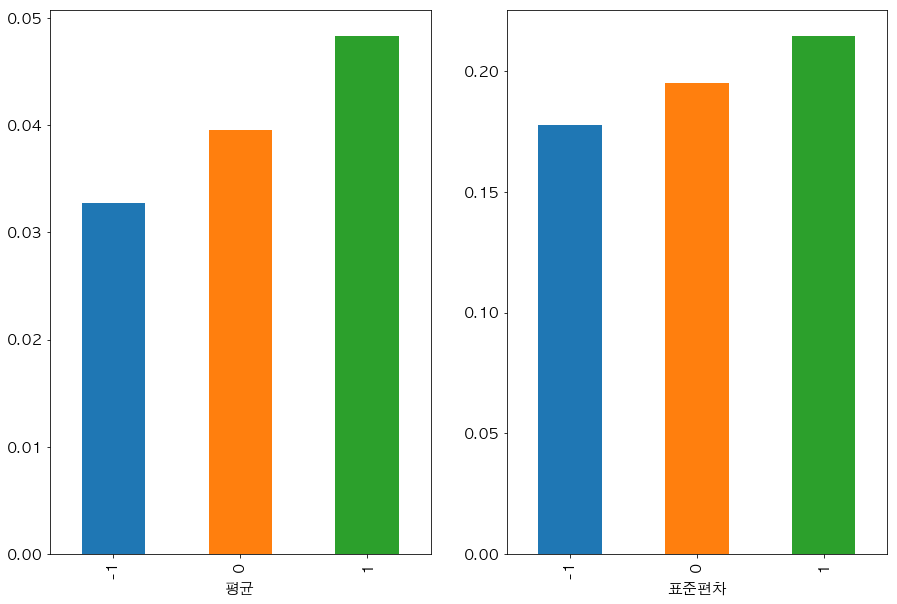

--------------------------------------------------
col:  ps_car_04_cat


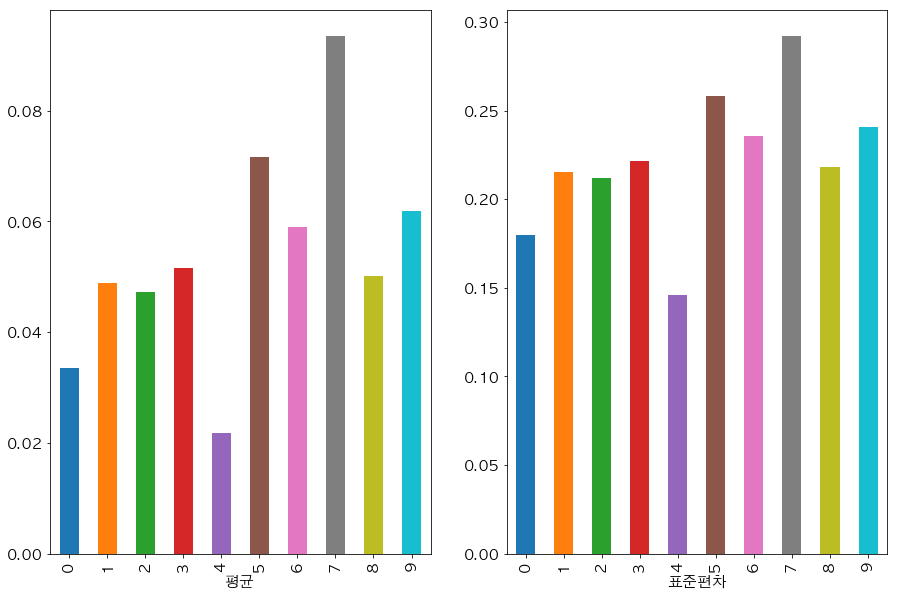

--------------------------------------------------
col:  ps_car_05_cat


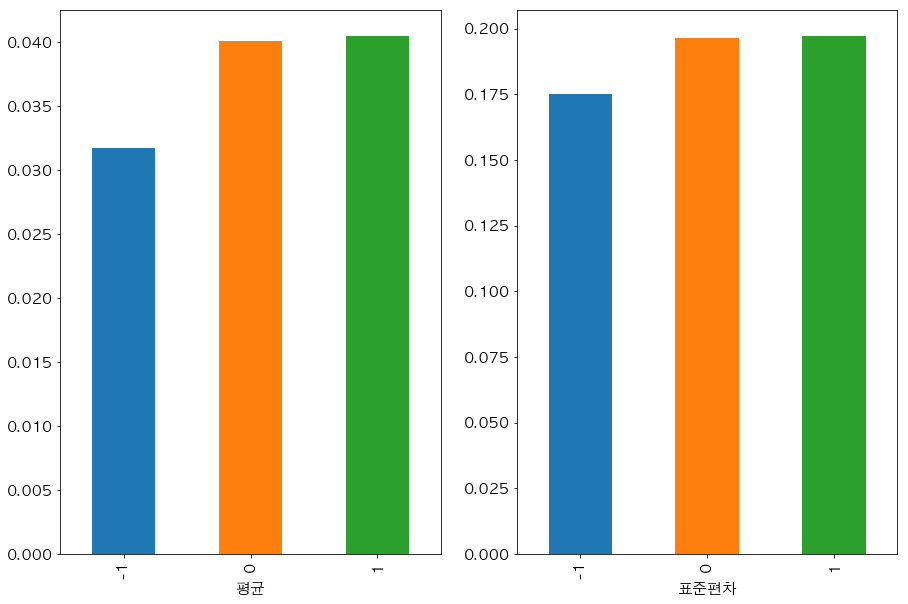

--------------------------------------------------
col:  ps_car_06_cat


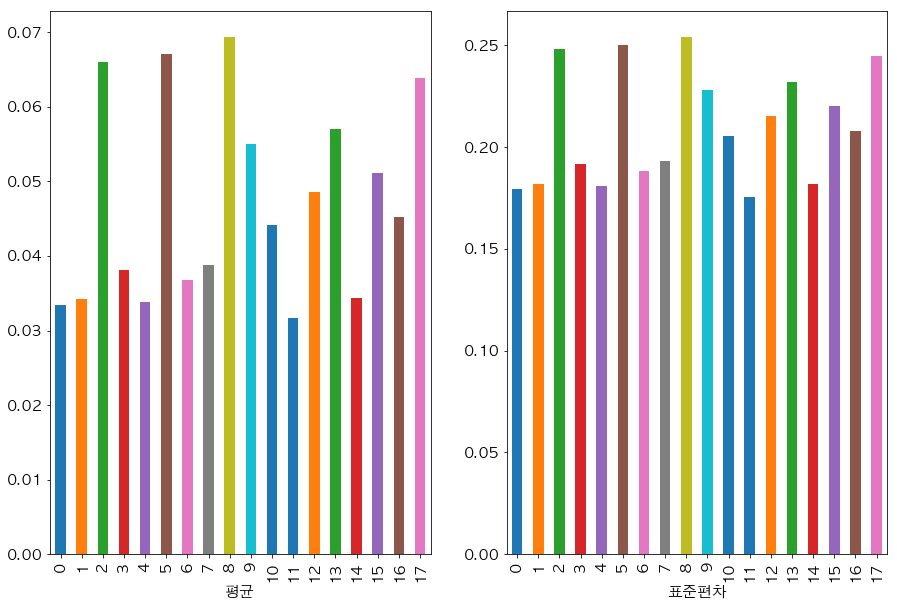

--------------------------------------------------
col:  ps_car_07_cat


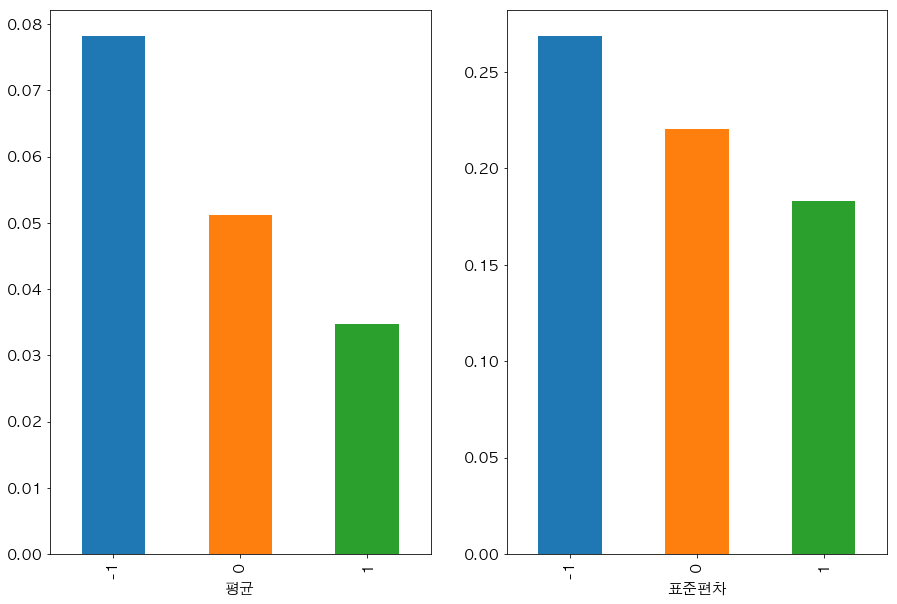

--------------------------------------------------
col:  ps_car_08_cat


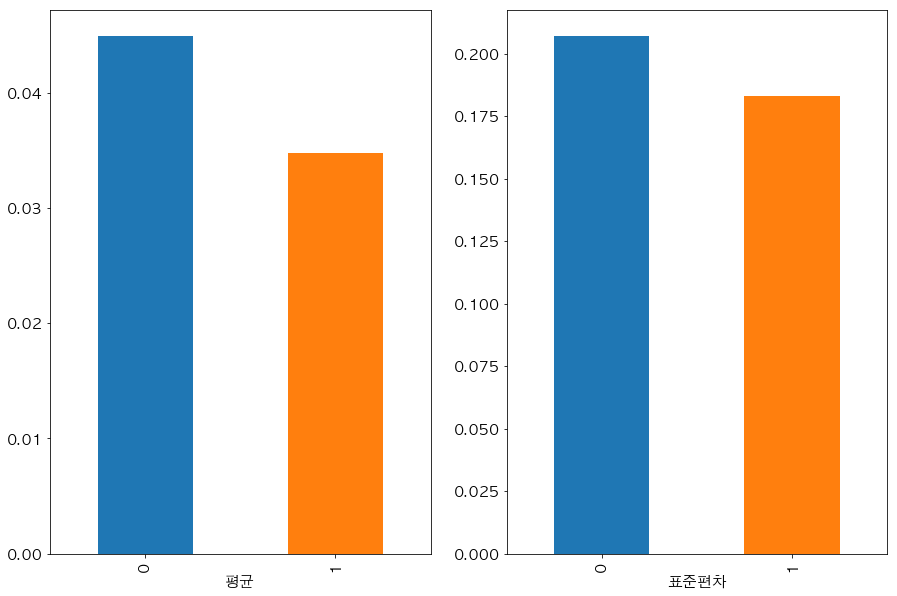

--------------------------------------------------
col:  ps_car_09_cat


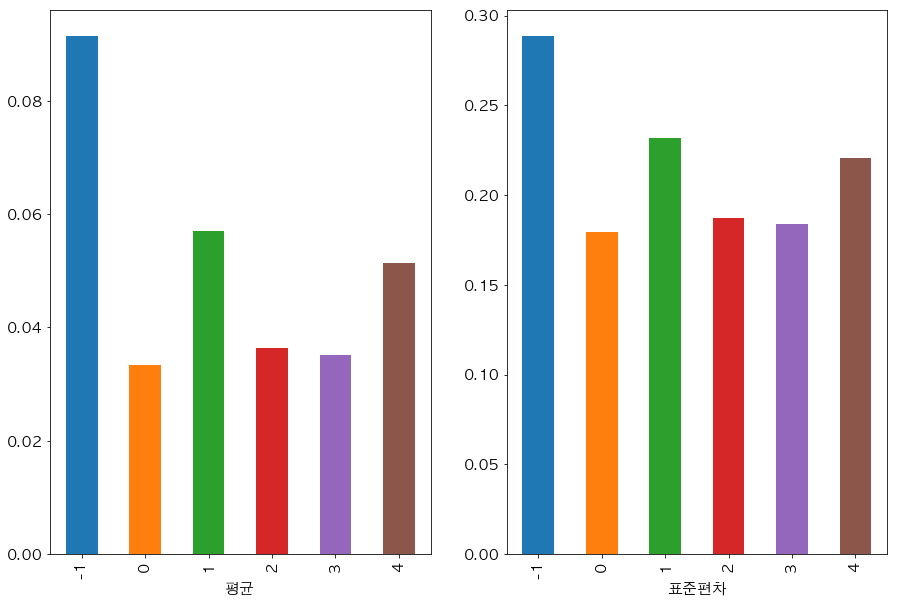

--------------------------------------------------
col:  ps_car_10_cat


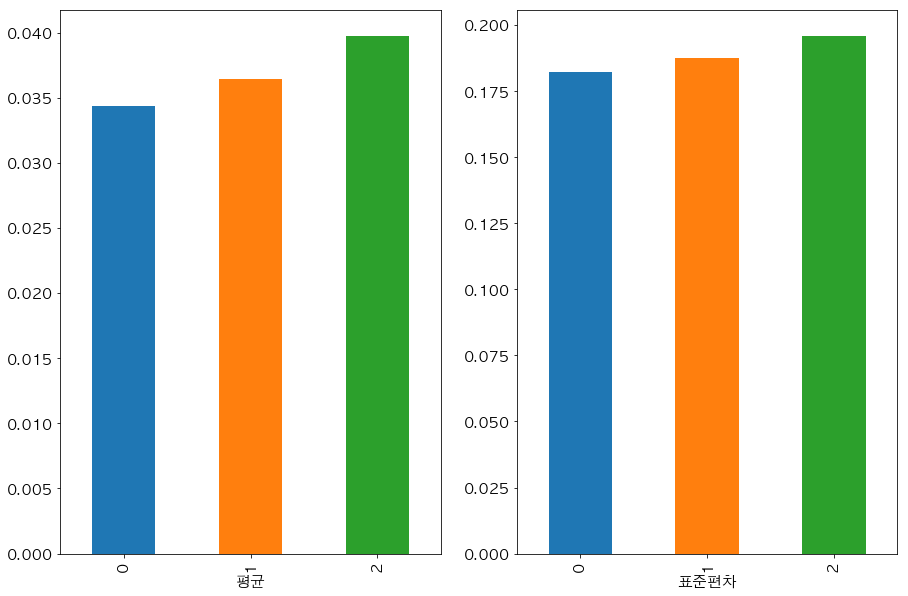

--------------------------------------------------
col:  ps_car_11_cat


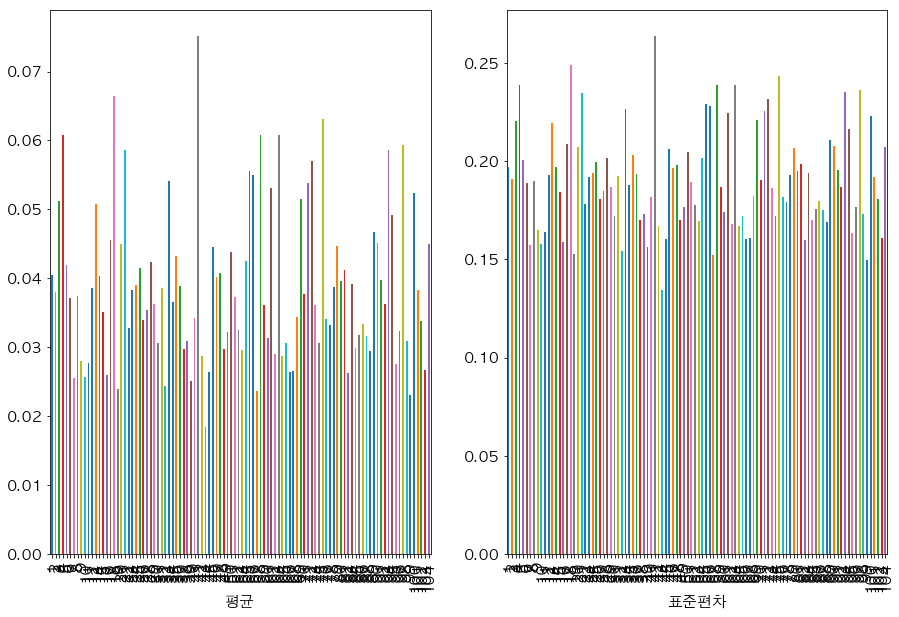

--------------------------------------------------
col:  ps_calc_15_bin


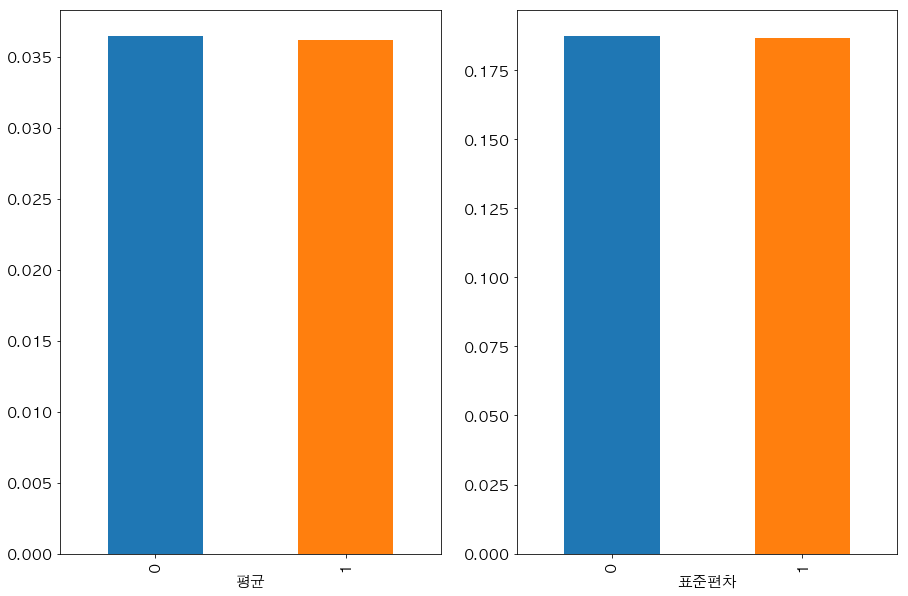

--------------------------------------------------
col:  ps_calc_16_bin


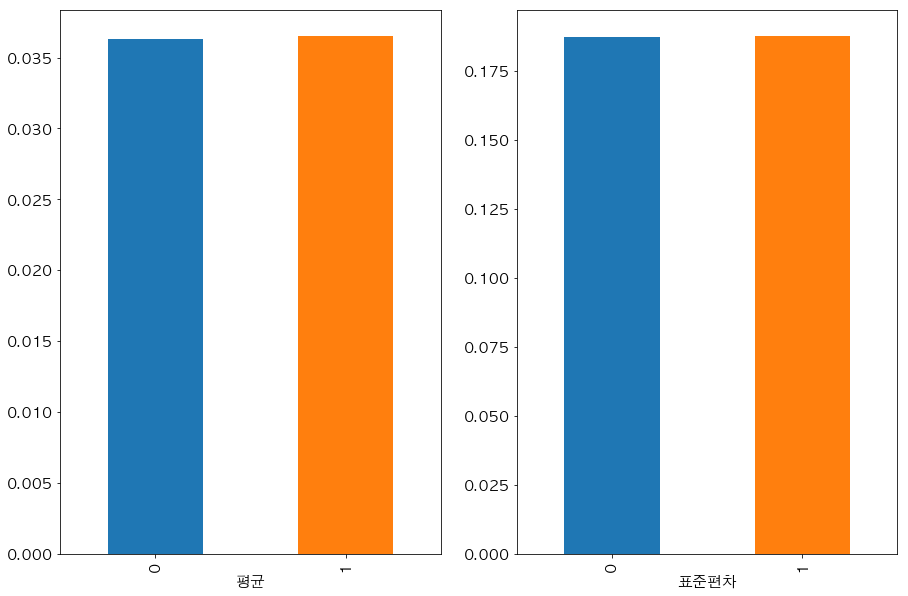

--------------------------------------------------
col:  ps_calc_17_bin


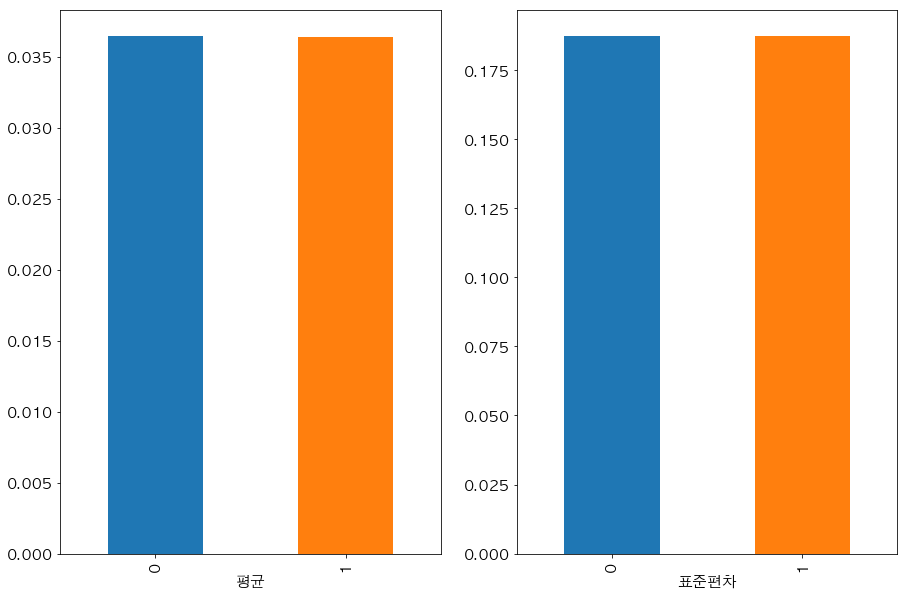

--------------------------------------------------
col:  ps_calc_18_bin


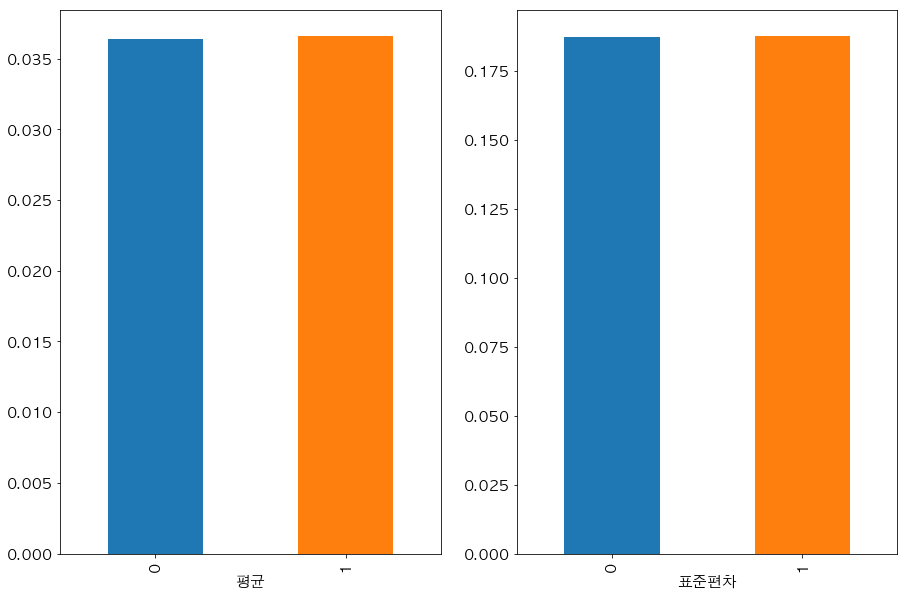

--------------------------------------------------
col:  ps_calc_19_bin


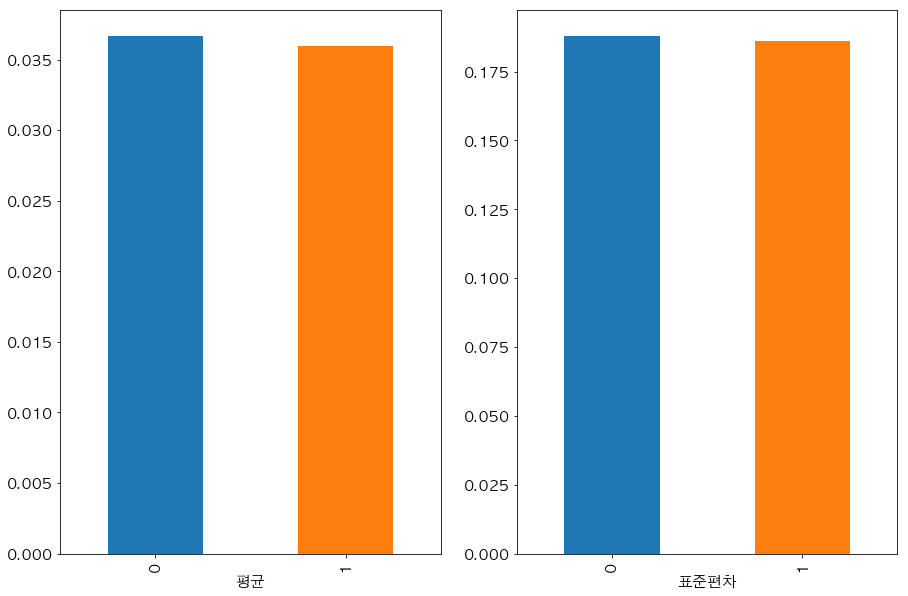

--------------------------------------------------
col:  ps_calc_20_bin


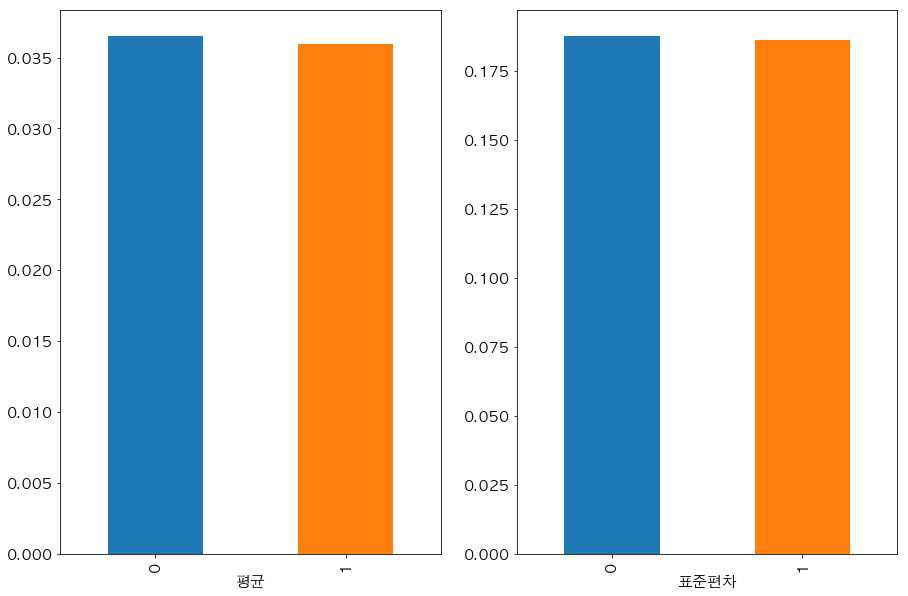

In [30]:
for col in cat_bin_vars:            
    print('-' * 50)
    print('col: ', col)
    
    f, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=1)

    train[[col, 'target']].groupby(col)['target'].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_xlabel('평균')
    train[[col, 'target']].groupby(col)['target'].std().plot(kind='bar', ax=ax[1])
    ax[1].set_xlabel('표준편차')
    plt.show()

In [85]:
def bar_plot_ci(col, data):
    
    # seaborn barplot 신뢰구간
    f, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=col, y='target', data=data)
    plt.show()

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


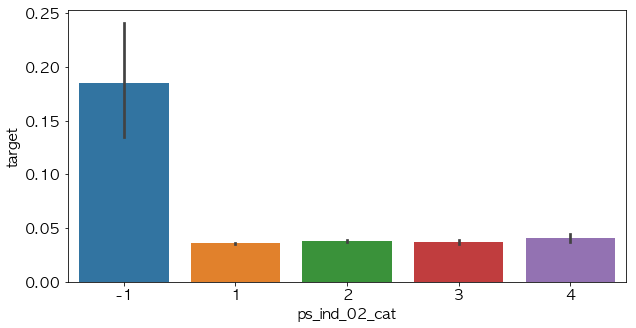

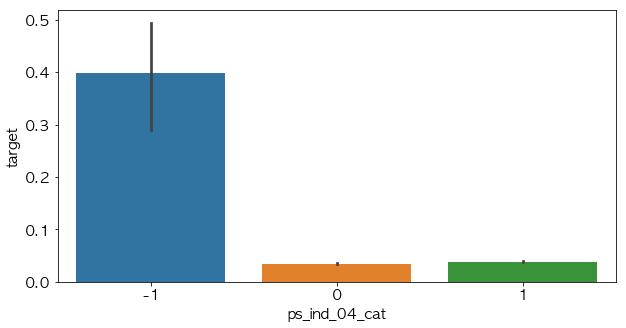

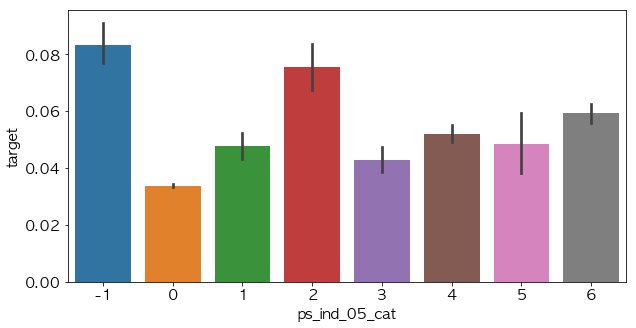

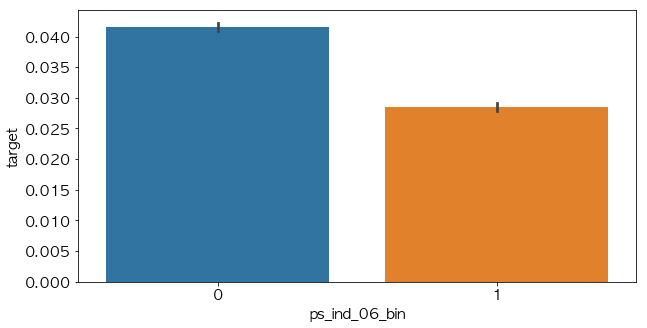

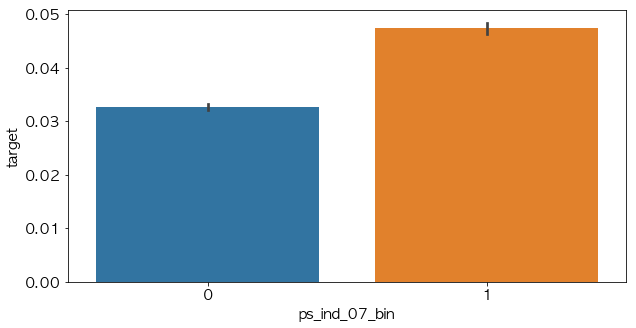

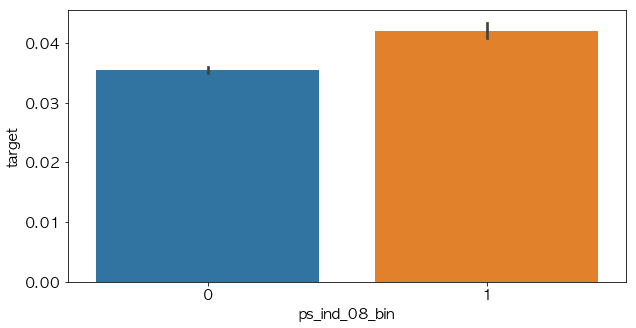

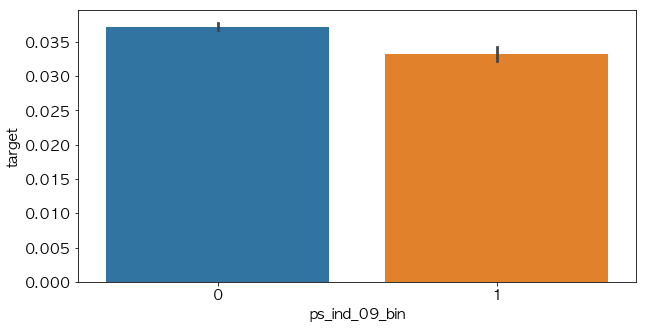

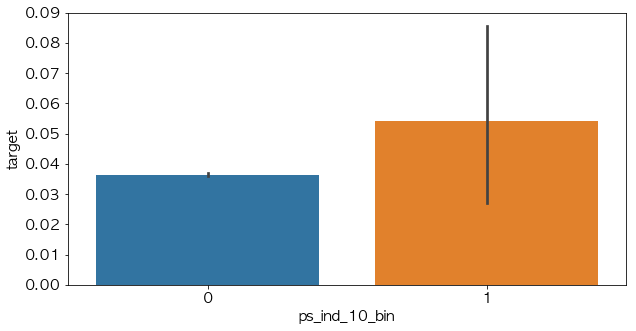

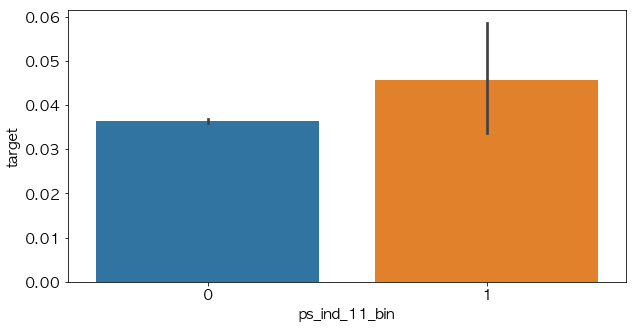

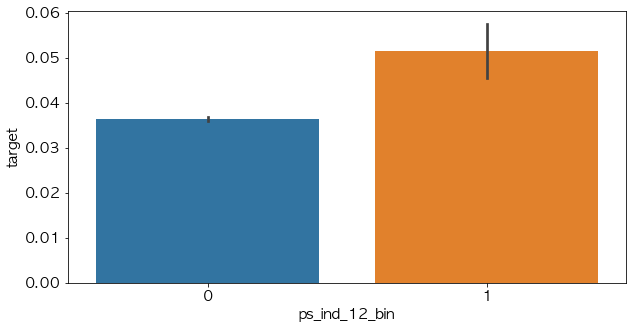

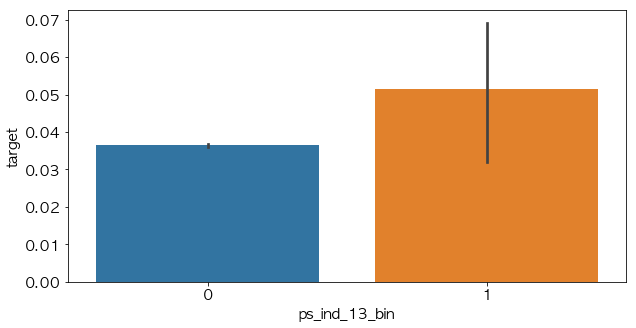

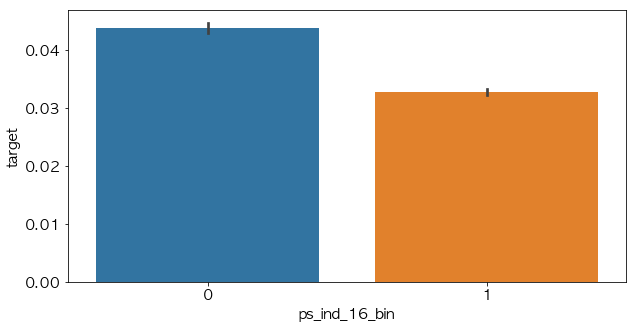

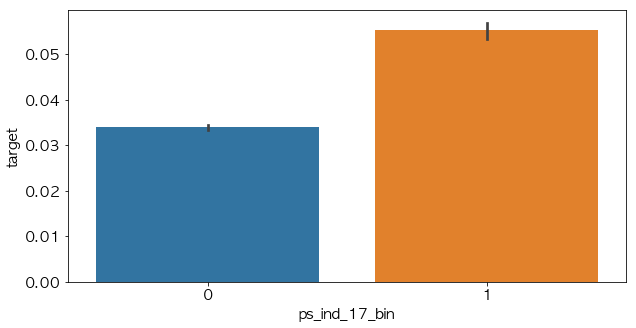

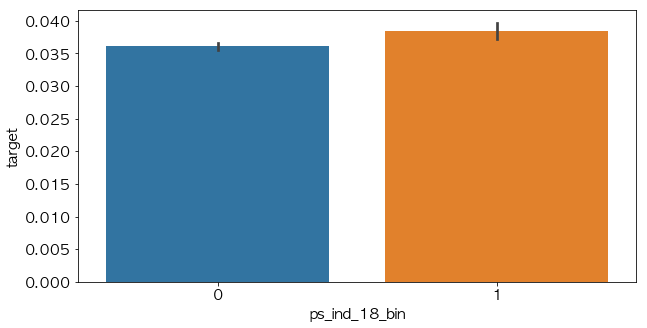

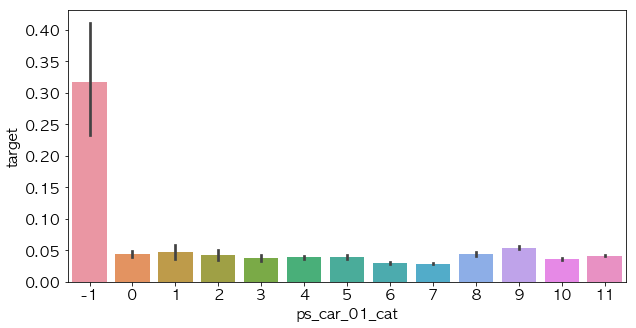

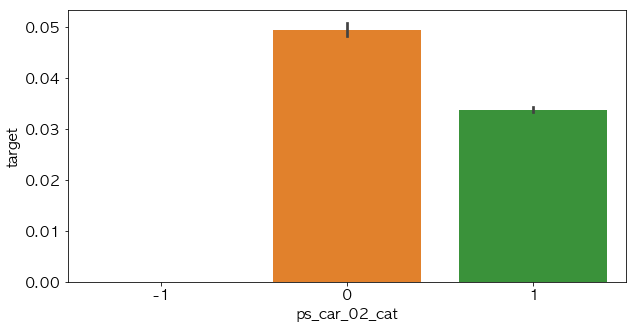

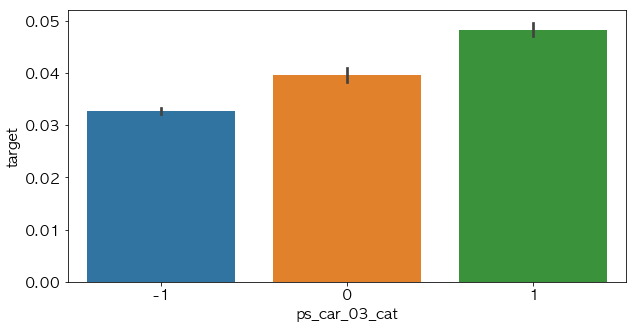

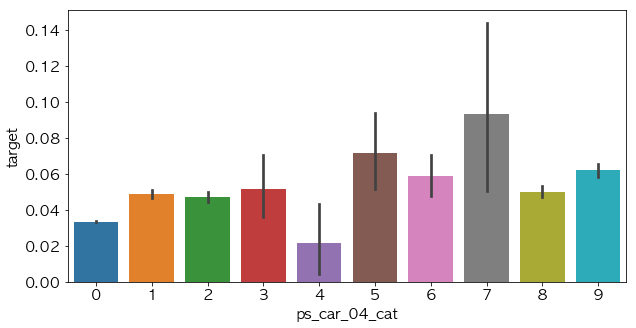

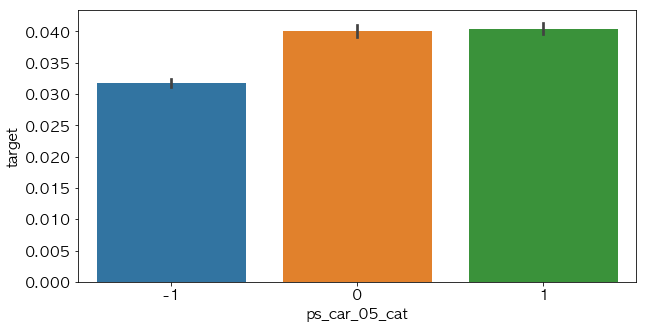

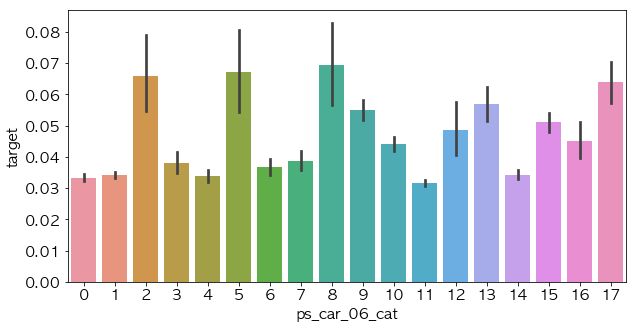

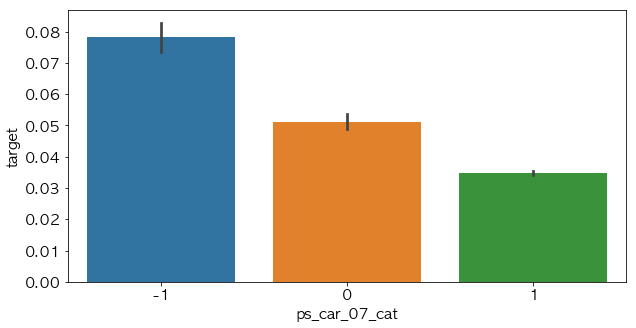

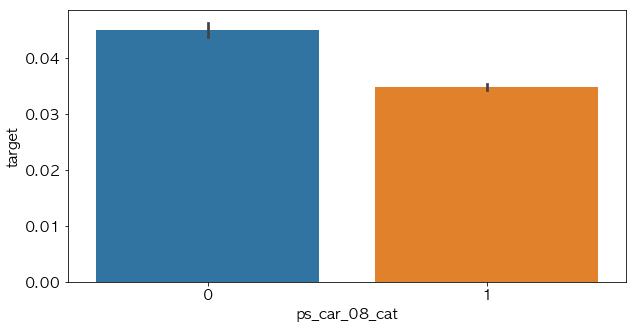

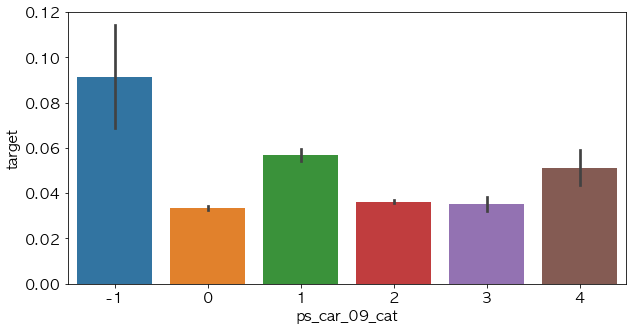

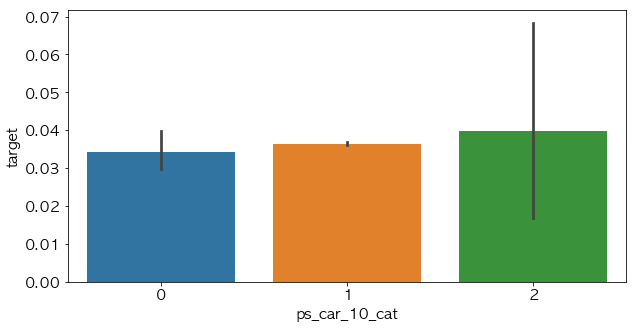

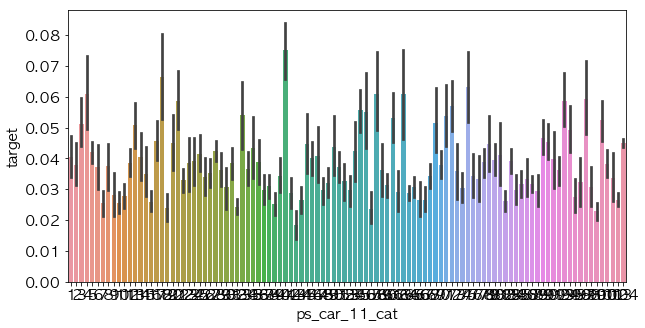

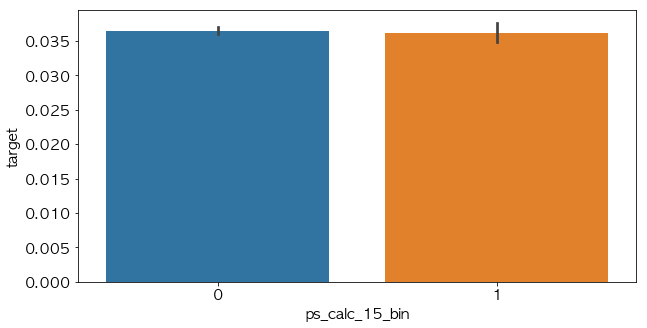

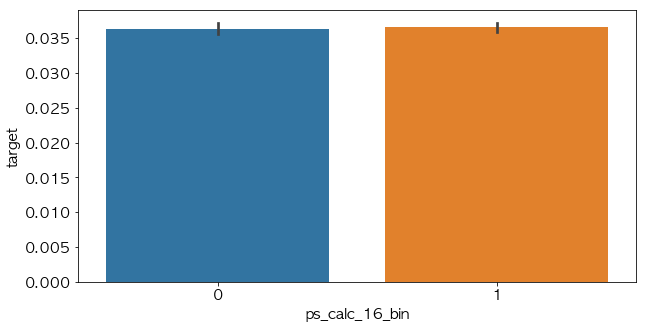

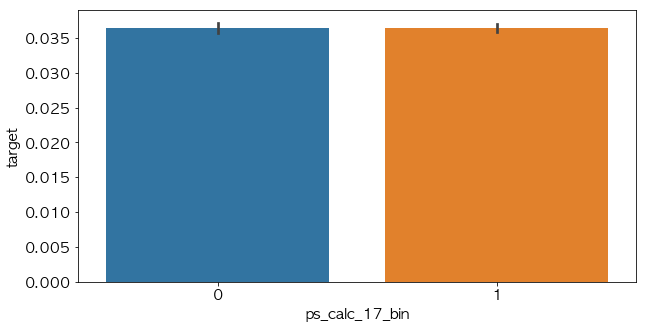

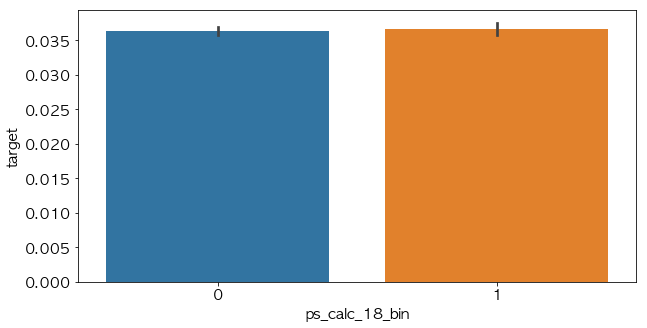

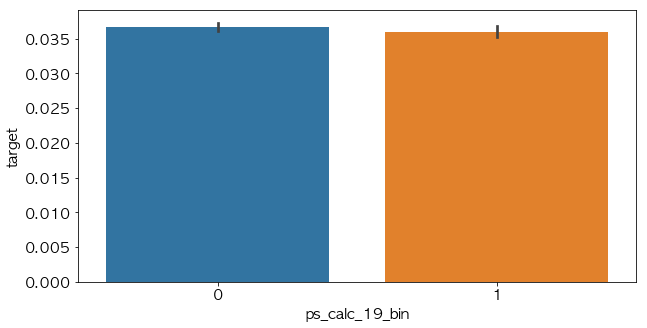

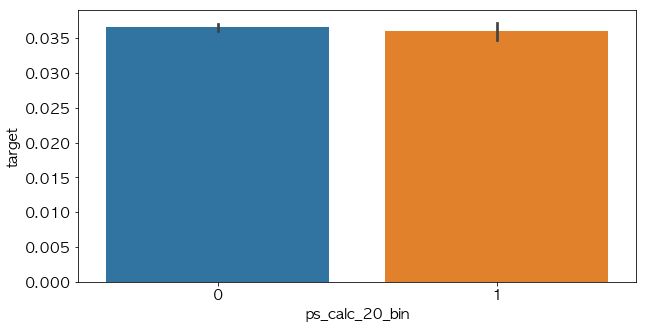

In [87]:
for col in cat_bin_vars:
    bar_plot_ci(col, train)

### 3-2. continuous

In [31]:
train_0 = train[train['target'] == 0].sample(1000)
train_1 = train[train['target'] == 1].sample(1000)
train_sample = pd.concat([train_0, train_1])

--------------------------------------------------
col:  ps_ind_01


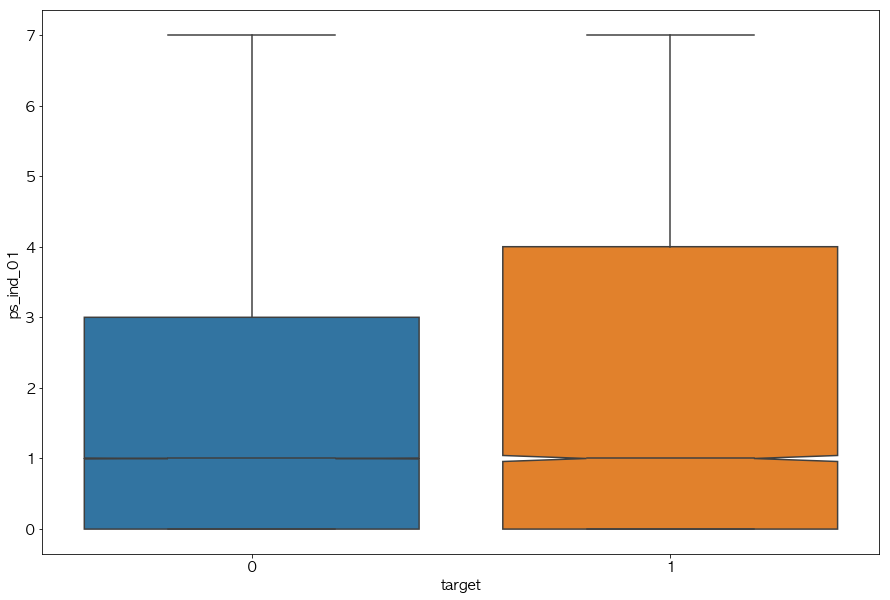

--------------------------------------------------
col:  ps_ind_03


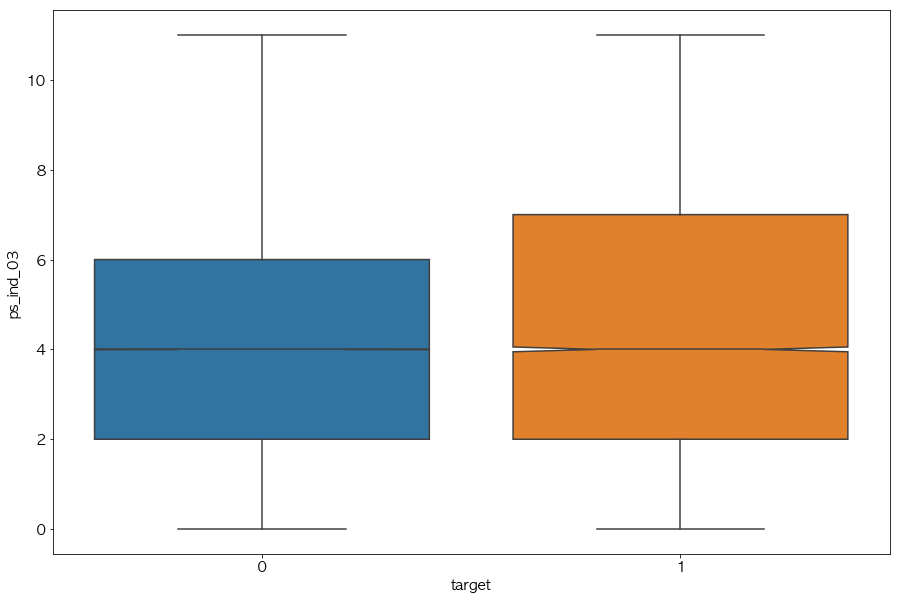

--------------------------------------------------
col:  ps_ind_14


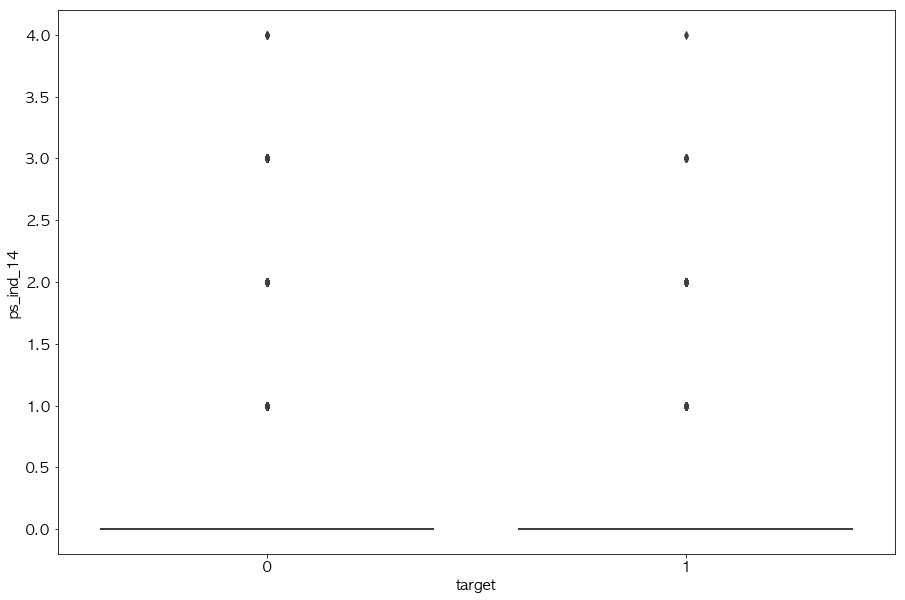

--------------------------------------------------
col:  ps_ind_15


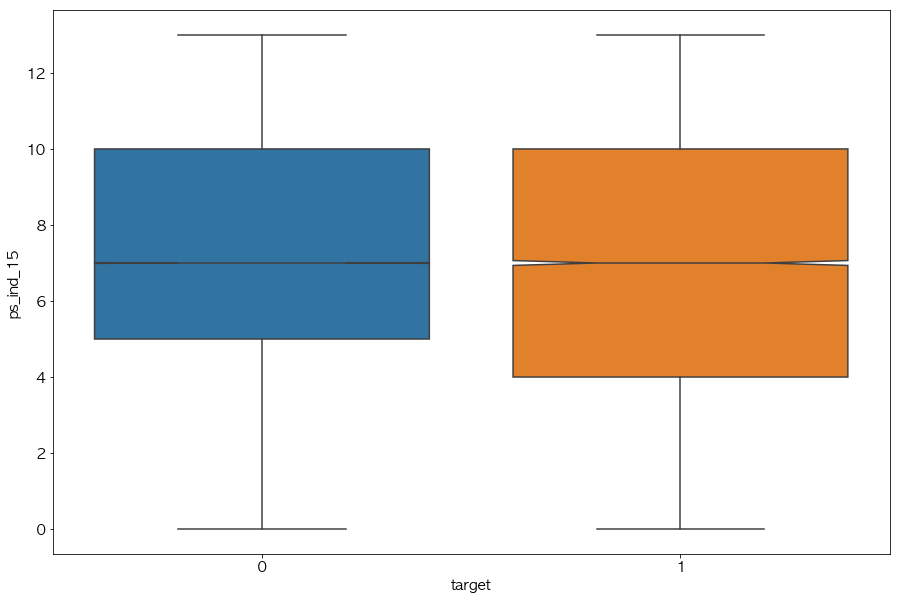

--------------------------------------------------
col:  ps_reg_01


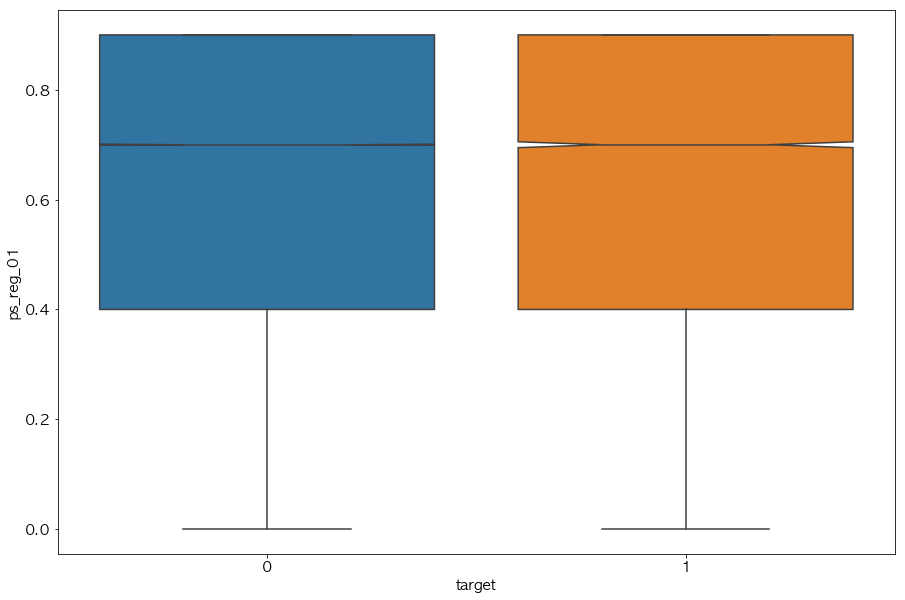

--------------------------------------------------
col:  ps_reg_02


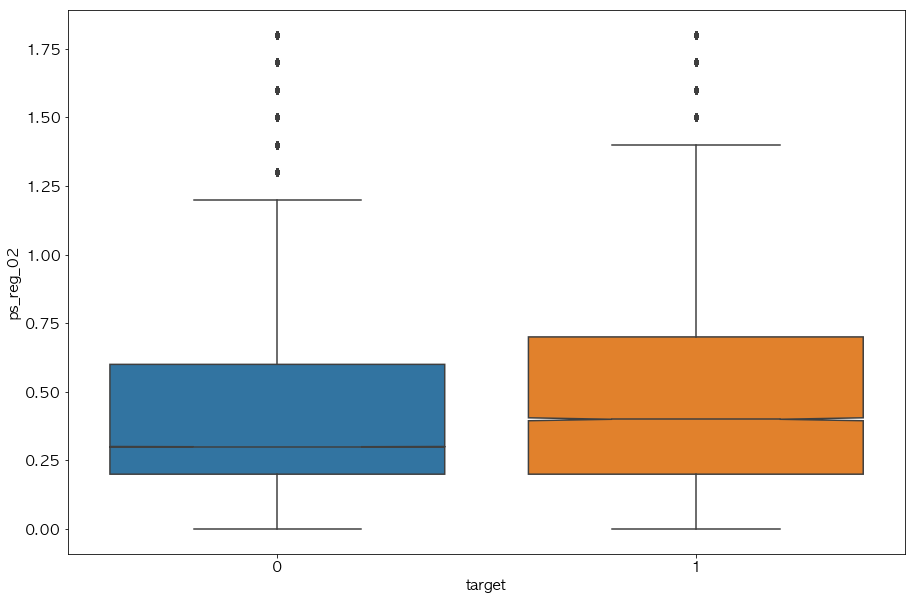

--------------------------------------------------
col:  ps_reg_03


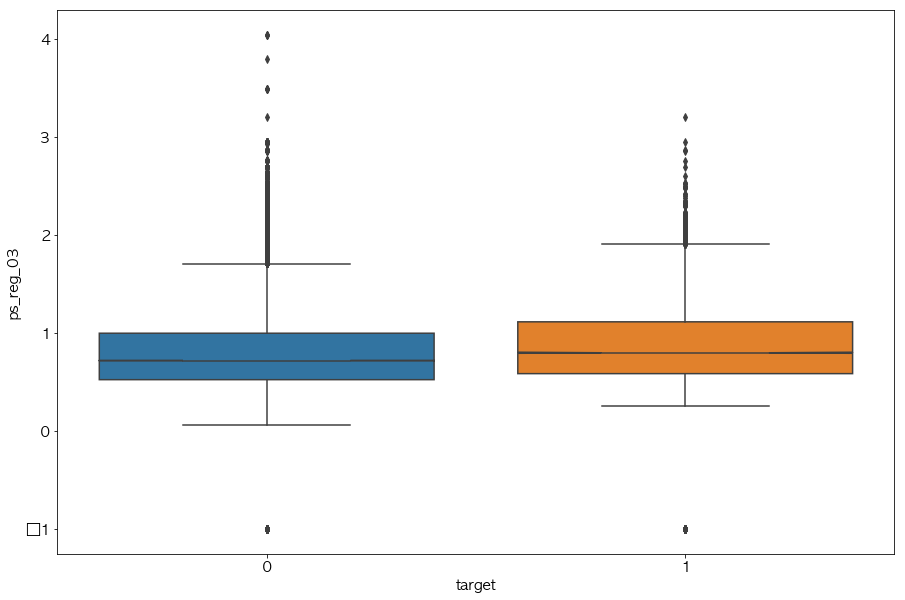

--------------------------------------------------
col:  ps_car_11


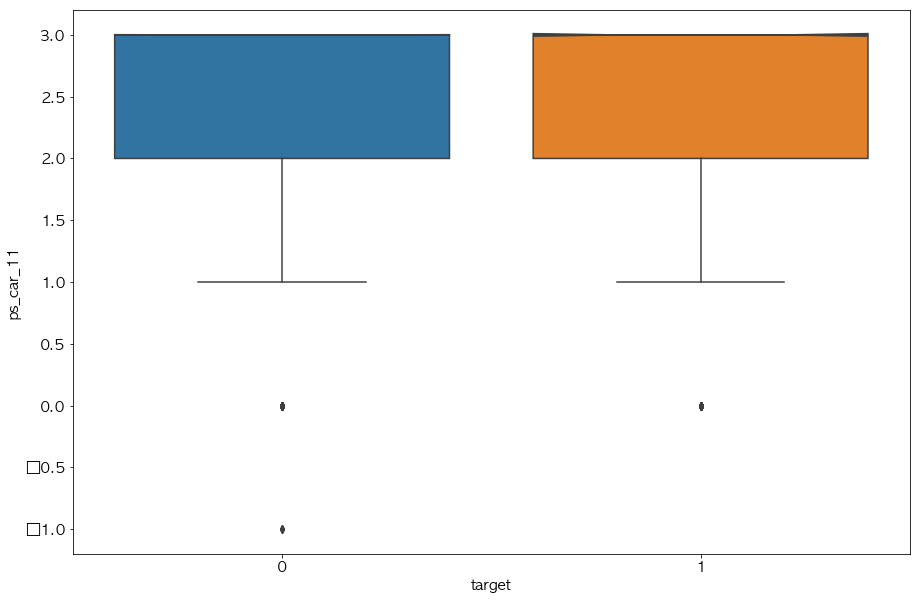

--------------------------------------------------
col:  ps_car_12


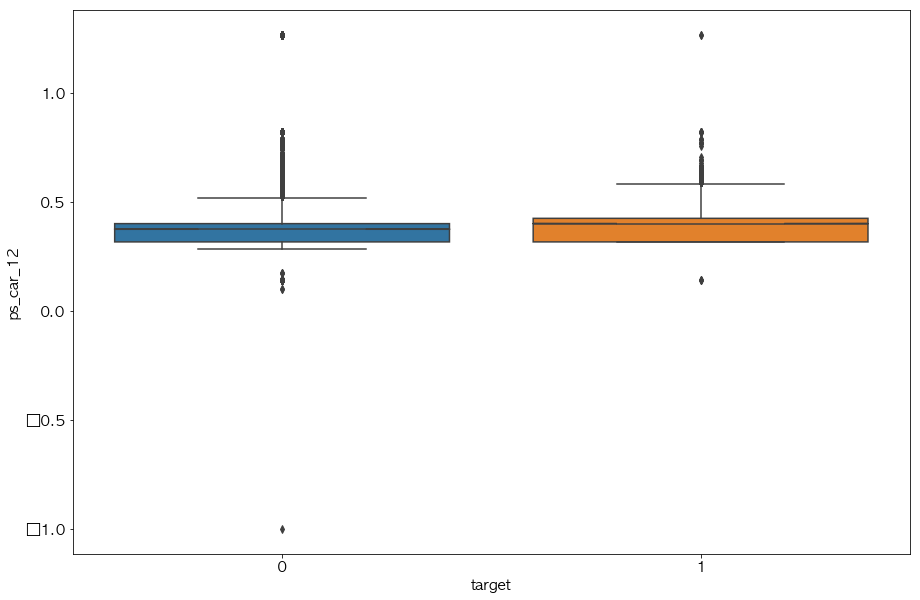

--------------------------------------------------
col:  ps_car_13


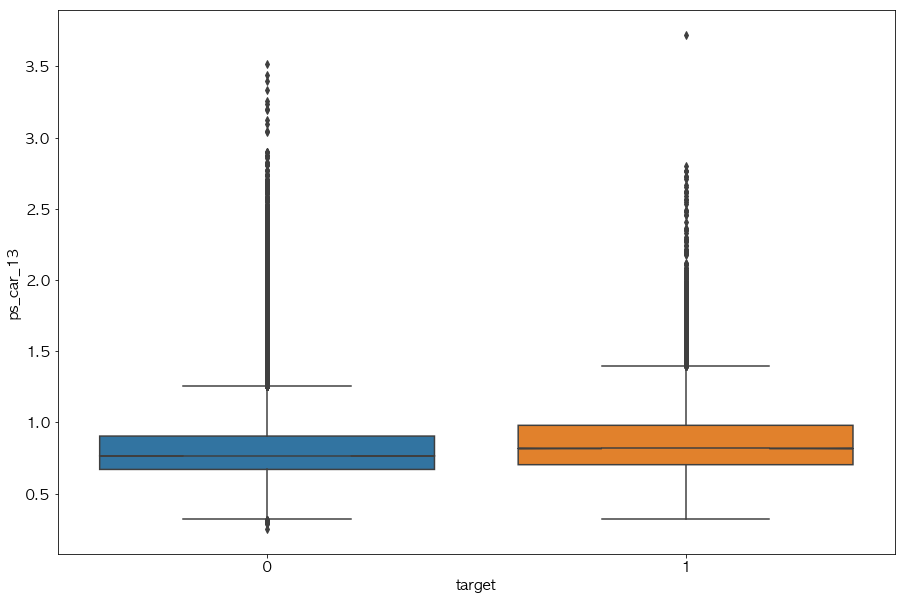

--------------------------------------------------
col:  ps_car_14


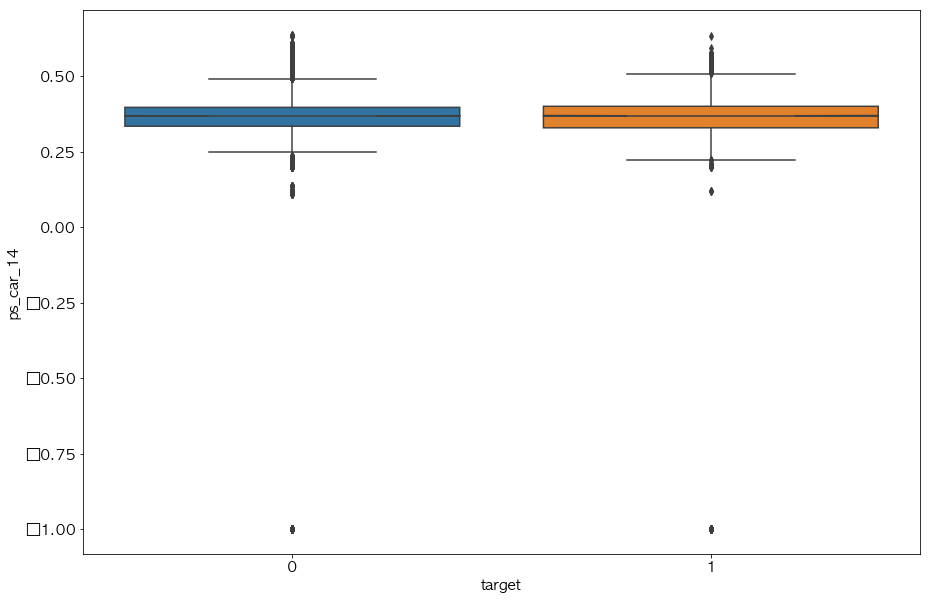

--------------------------------------------------
col:  ps_car_15


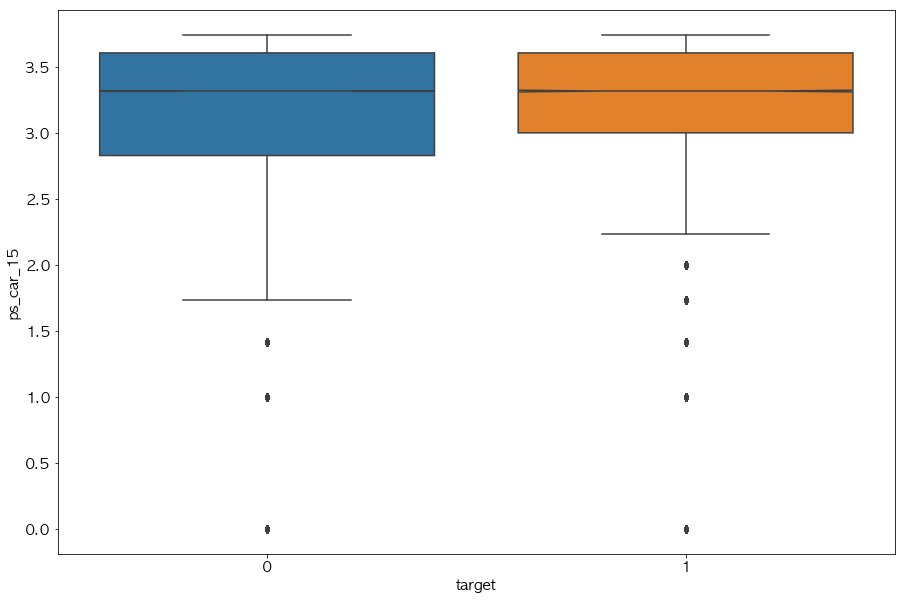

--------------------------------------------------
col:  ps_calc_01


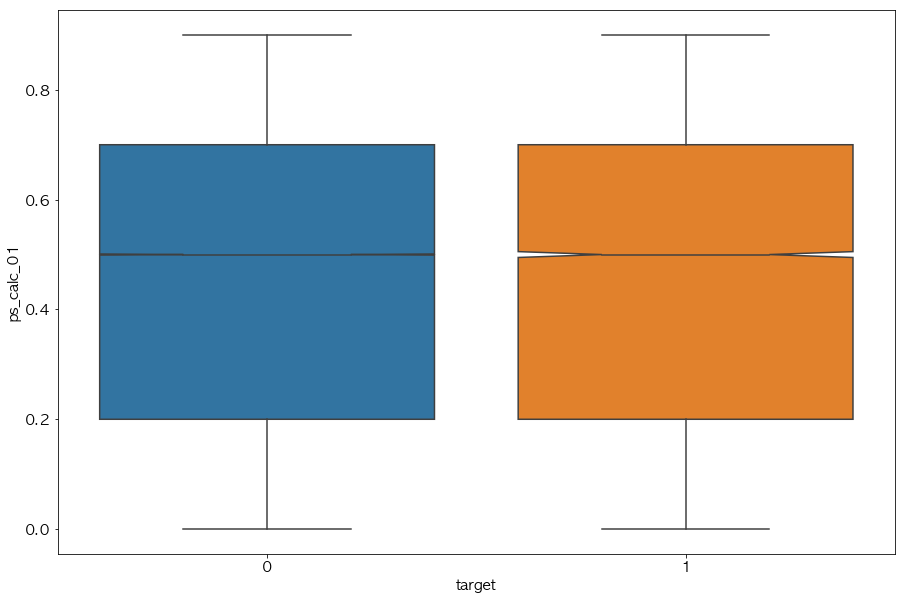

--------------------------------------------------
col:  ps_calc_02


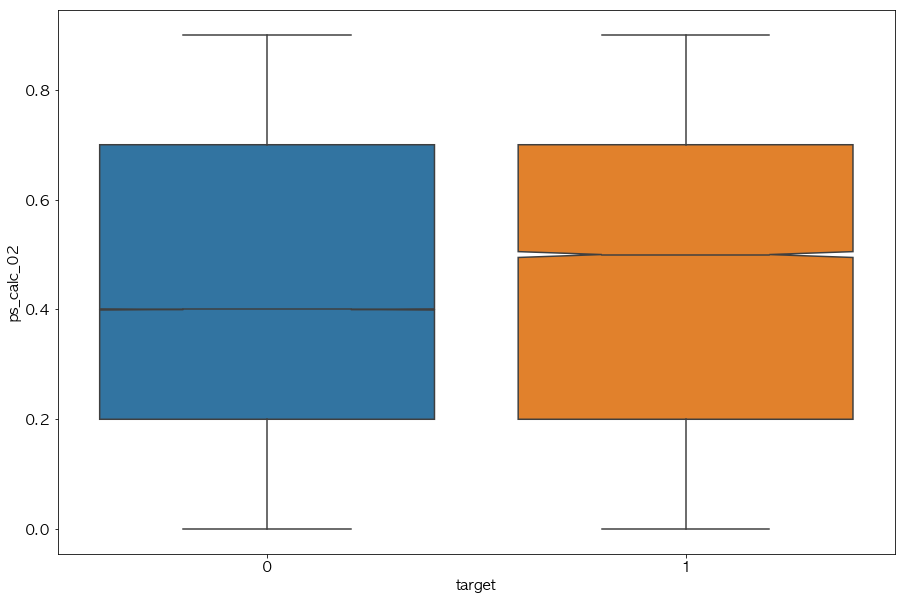

--------------------------------------------------
col:  ps_calc_03


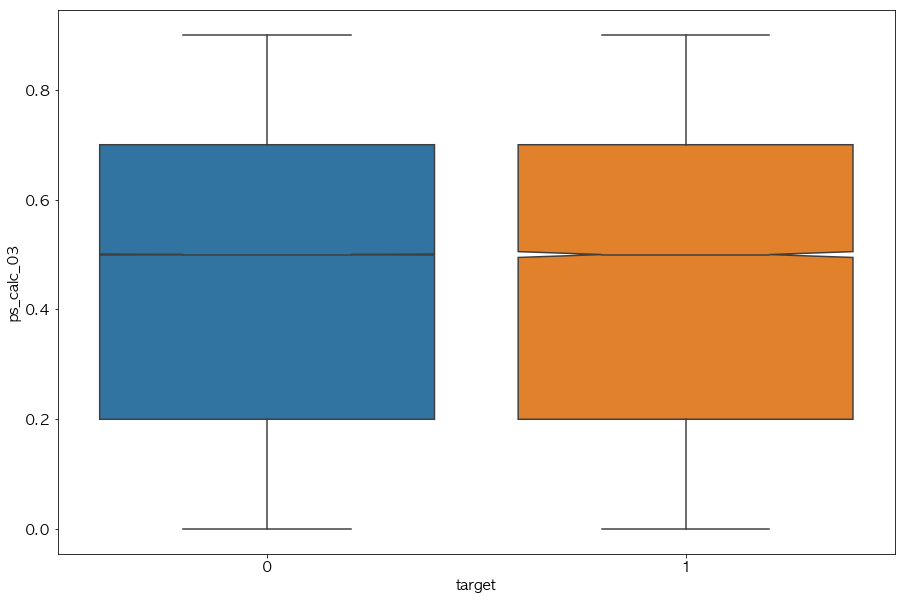

--------------------------------------------------
col:  ps_calc_04


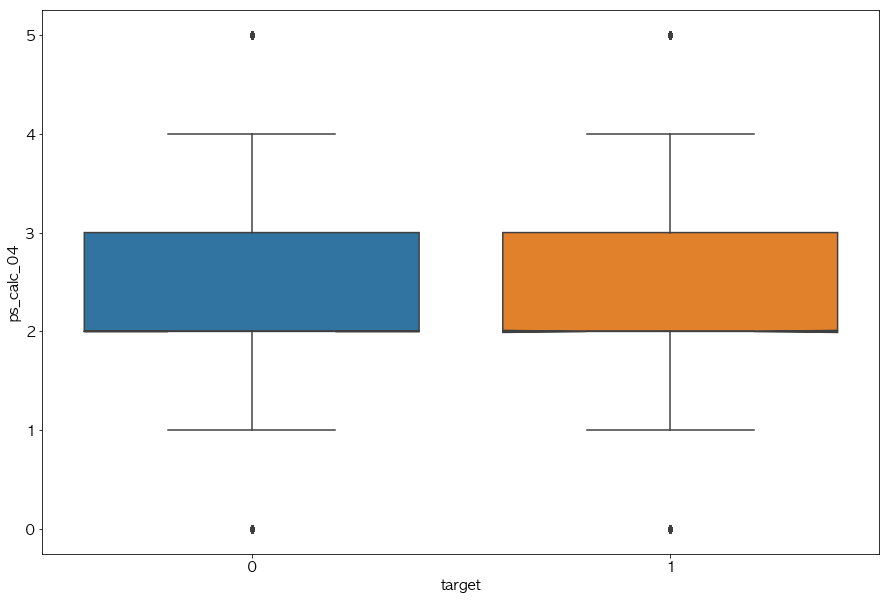

--------------------------------------------------
col:  ps_calc_05


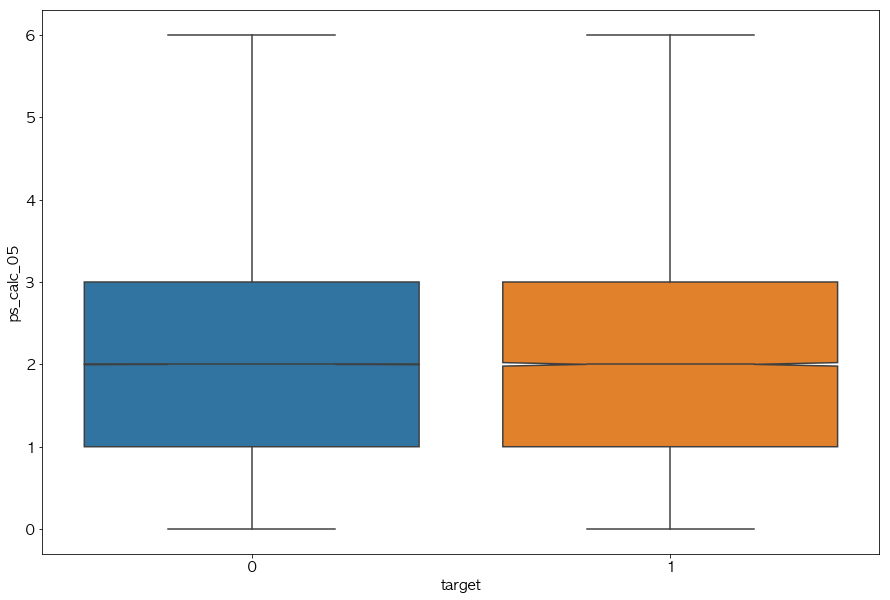

--------------------------------------------------
col:  ps_calc_06


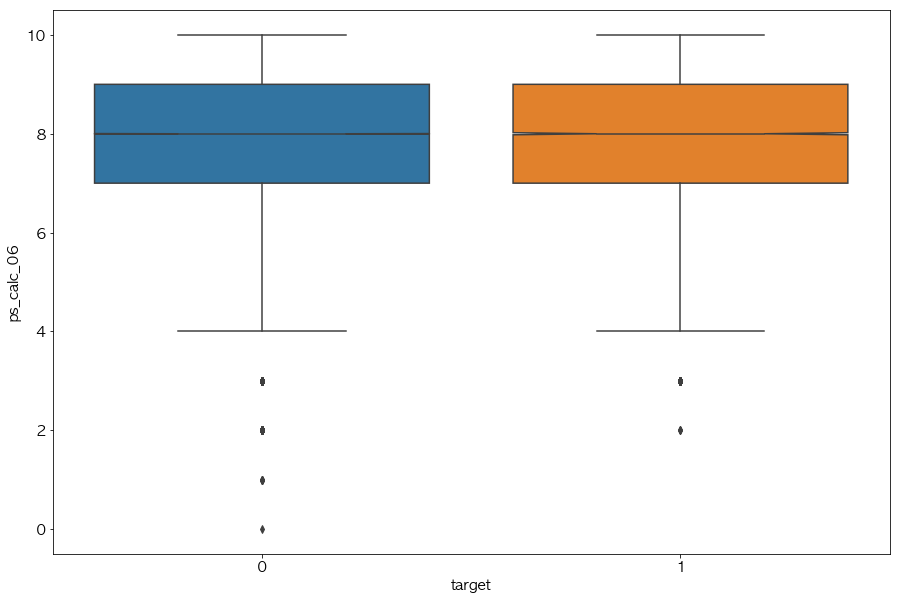

--------------------------------------------------
col:  ps_calc_07


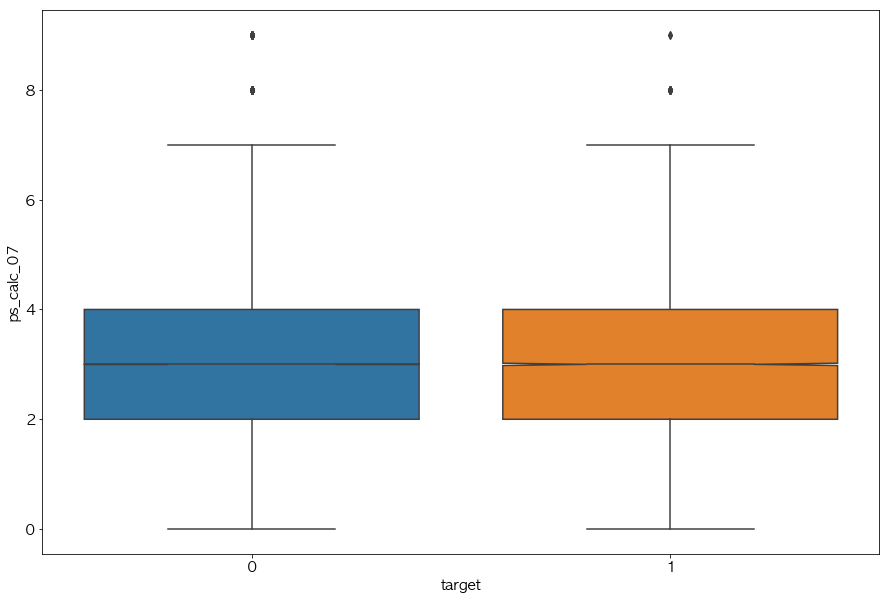

--------------------------------------------------
col:  ps_calc_08


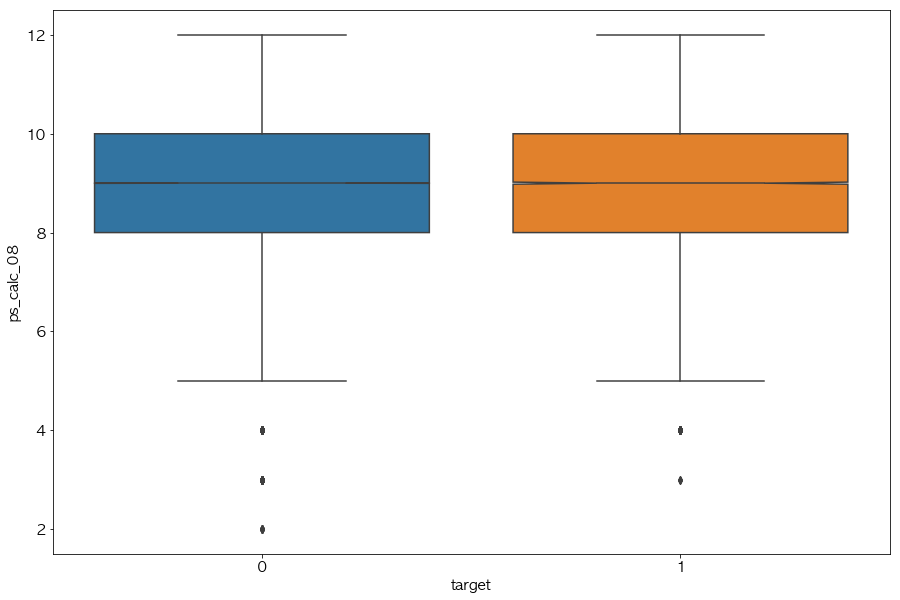

--------------------------------------------------
col:  ps_calc_09


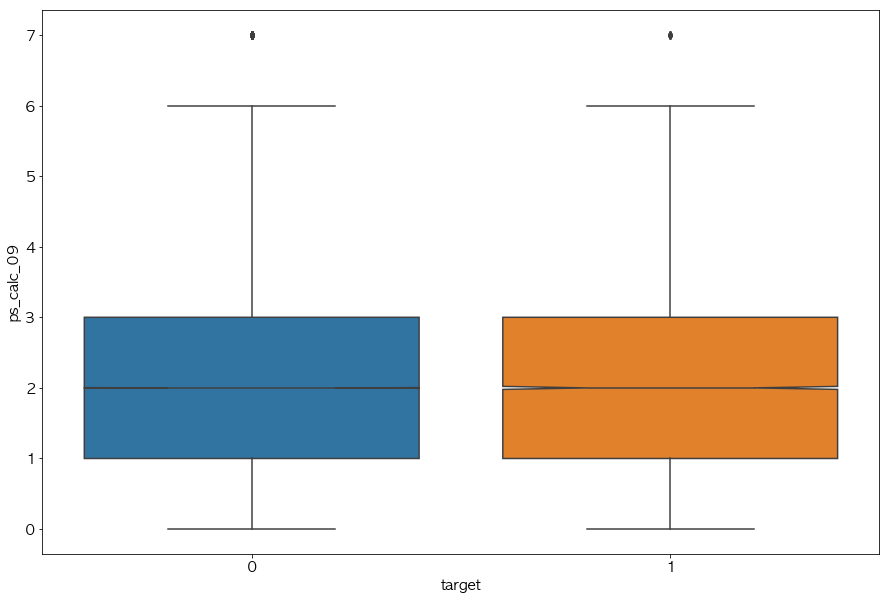

--------------------------------------------------
col:  ps_calc_10


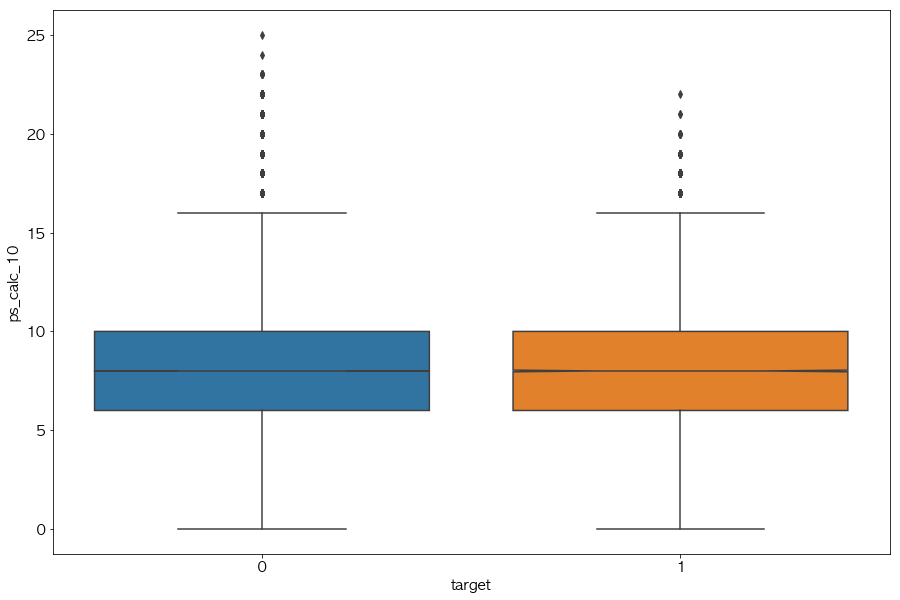

--------------------------------------------------
col:  ps_calc_11


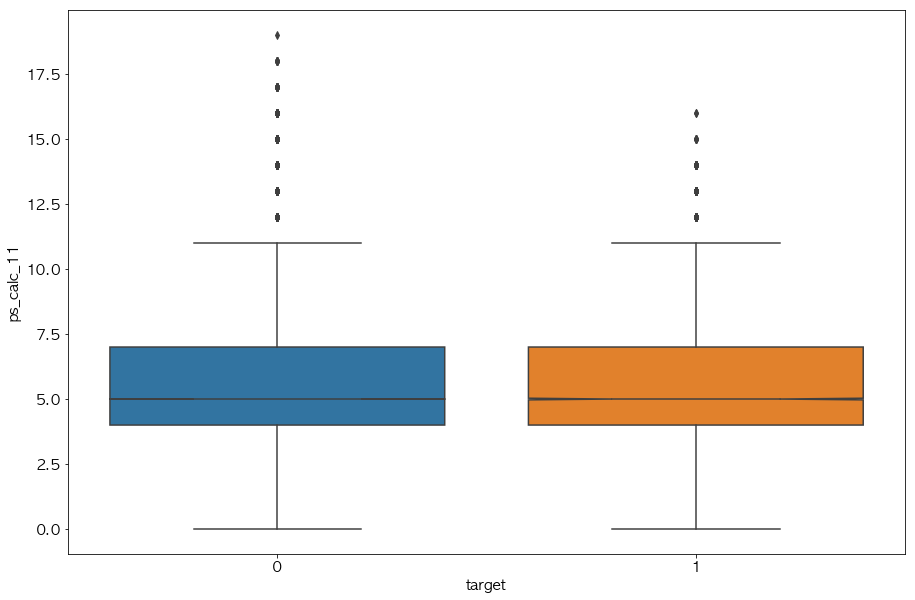

--------------------------------------------------
col:  ps_calc_12


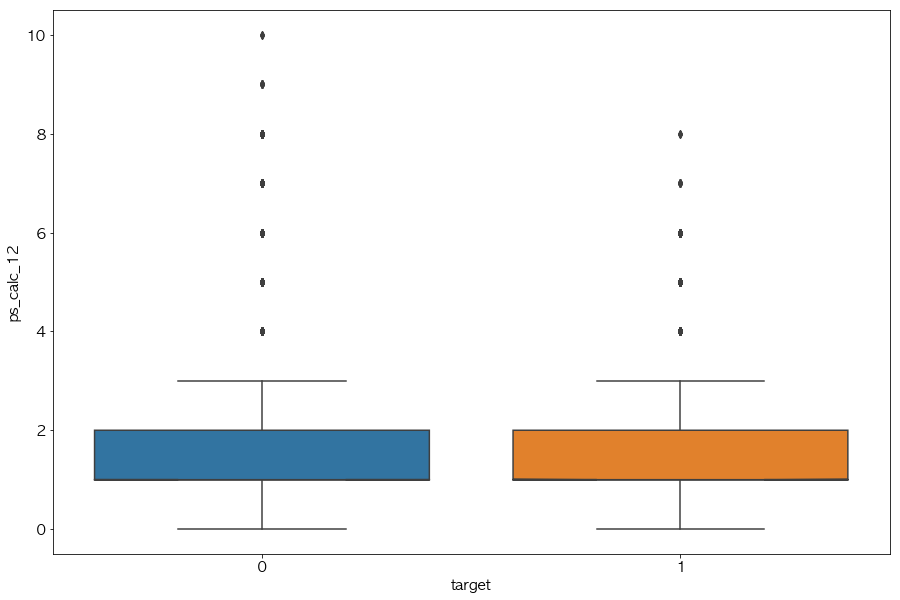

--------------------------------------------------
col:  ps_calc_13


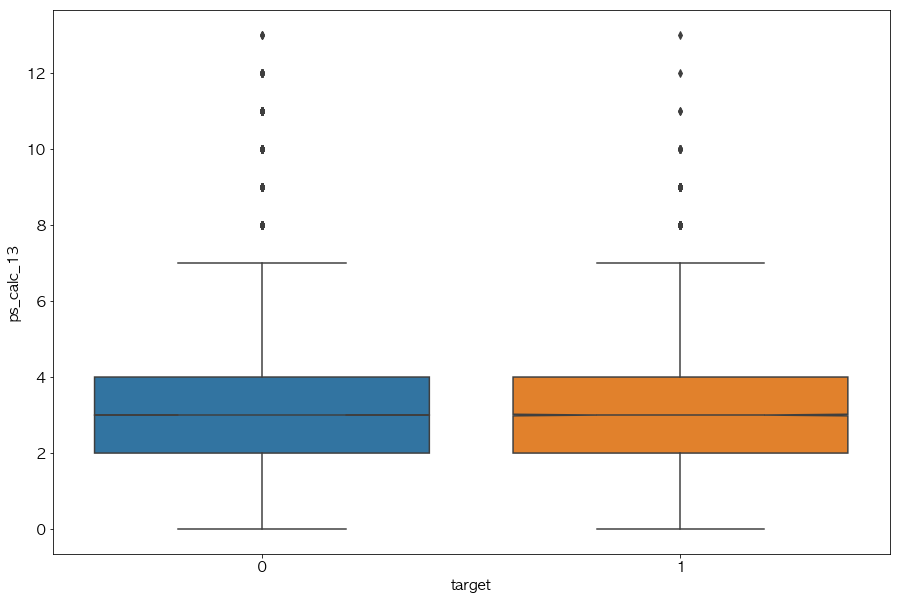

--------------------------------------------------
col:  ps_calc_14


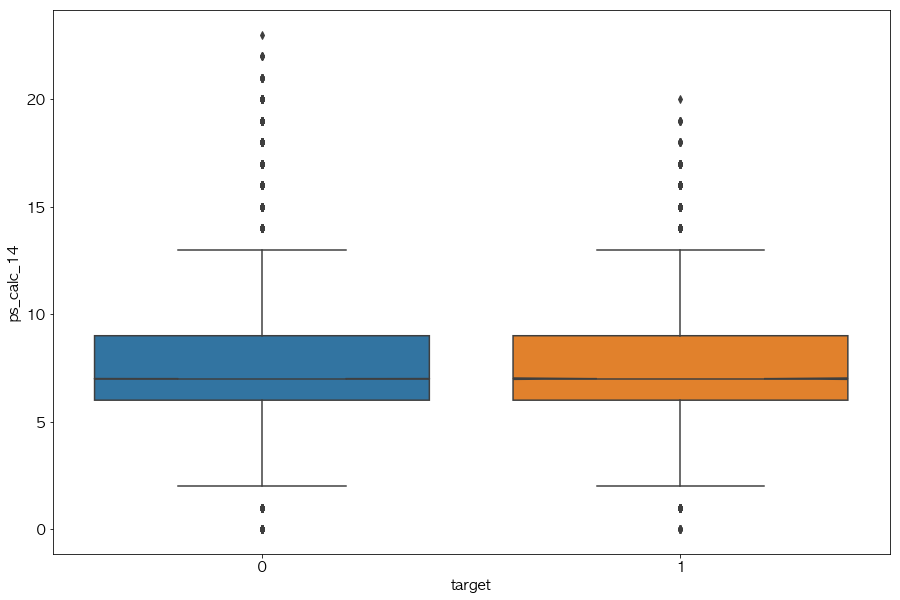

In [34]:
for col in con_ord_vars:            
    print('-' * 50)
    print('col: ', col)
    
    
    f, ax = plt.subplots(figsize=(15,10))
    
    # boxplot notch 움푹 들어간 구간이 겹치지 않으면 둘의 median이 다르다.
    sns.boxplot(y=col, x='target', data=train, notch=True)
    #ax = sns.stripplot(x='target', y=col, data=train_sample, color='red')
    
    plt.show()

- 중앙값의 95% 신뢰구간

### 3-3. 변수간 상관관계

- 상관관계가 너무 높은 두 변수를 넣는 것은 지양한다.

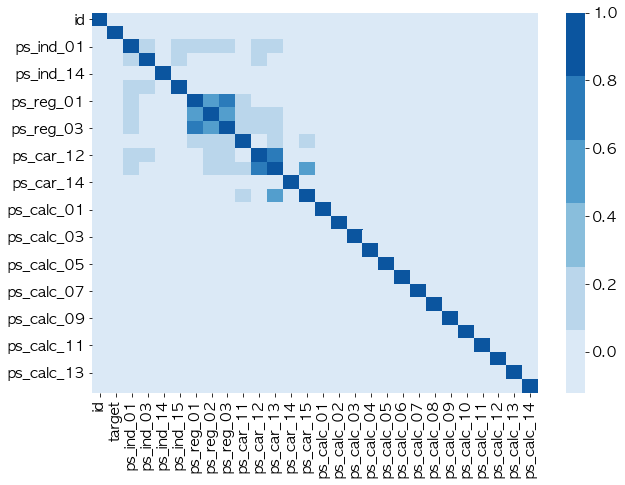

In [88]:
corr = train.corr()

cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

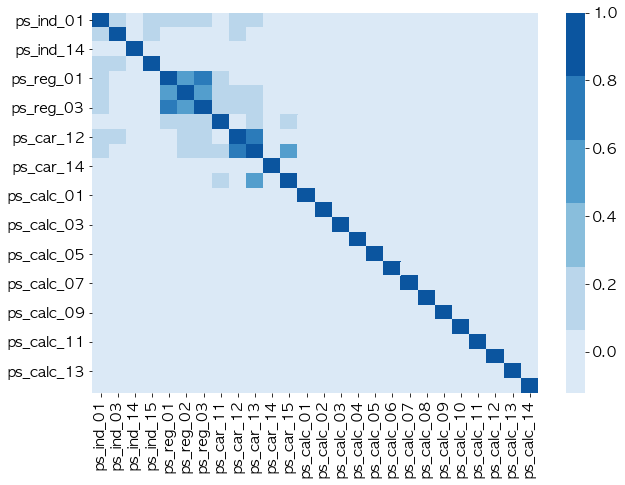

In [90]:
corr_sub = train[cat_bin_vars + con_ord_vars].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_sub, cmap=cmap)

- correlation이 많이 나오지 않는다.

### 3-4. Train, Test 간 데이터 유사도 확인

# 4. 앞으로 해야 할 것

## 1. 결측치 다루기

In [35]:
for col in train.columns:
    train.loc[train[col] == -1, col] = None
    
for col in test.columns:
    test.loc[test[col] == -1, col] = None

In [36]:
def describe_missing_values(df):
    na_percent = {}
    N = df.shape[0]
    for column in df:
        na_percent[column] = df[column].isnull().sum() * 100 / N

    na_percent = dict(filter(lambda x: x[1] != 0, na_percent.items()))
    plt.bar(range(len(na_percent)), na_percent.values())
    plt.ylabel('Percent')
    plt.xticks(range(len(na_percent)), na_percent.keys(), rotation='vertical')
    plt.show()

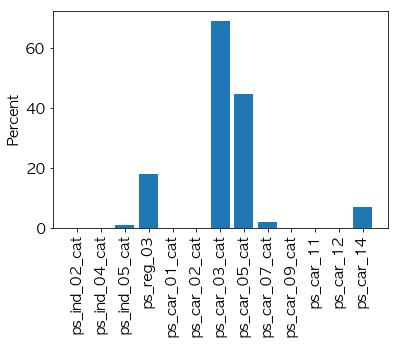

In [37]:
describe_missing_values(train)

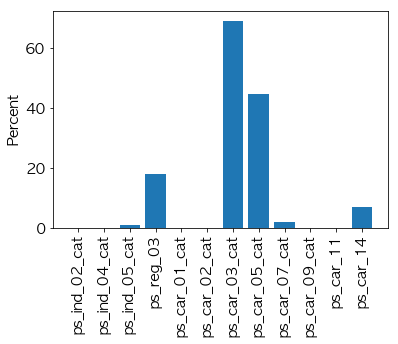

In [38]:
describe_missing_values(test)

### 1. Continous 변수만 채운다.

In [39]:
train_fill = train.copy()
test_fill = test.copy()

In [40]:
for col in con_ord_vars:
    train_fill[col].fillna(value=train_fill[col].mean(), inplace=True)
    test_fill[col].fillna(value=test_fill[col].mean(), inplace=True)

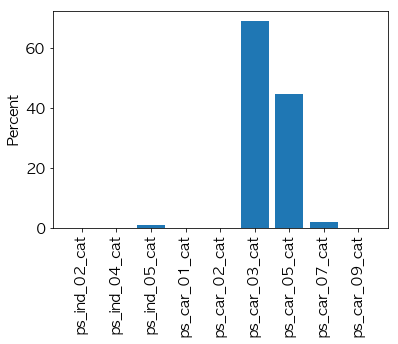

In [41]:
describe_missing_values(train_fill)

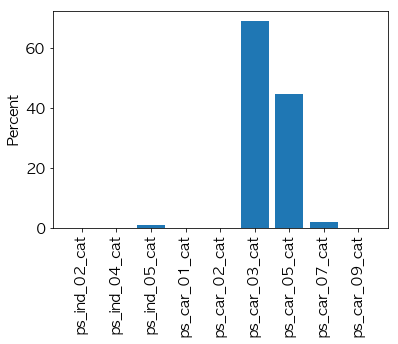

In [42]:
describe_missing_values(test_fill)

### 2. Categorical Label링 하기

In [43]:
cat_vars = [cat for cat in cat_bin_vars if 'cat' in cat]
bin_vars = [bin_ for bin_ in cat_bin_vars if 'bin' in bin_]

In [44]:
train_fill_con = train_fill[con_ord_vars]
test_fill_con = test_fill[con_ord_vars]
train_fill_cat = train_fill[cat_bin_vars]
test_fill_cat = test_fill[cat_bin_vars]

In [45]:
train_fill_cat.fillna(-1, inplace=True)
test_fill_cat.fillna(-1, inplace=True)

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [46]:
train_fill_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 31 columns):
ps_ind_02_cat     595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_car_01_cat     595212 non-null int64
ps_car_02_cat     595212 non-null int64
ps_car_03_cat     595212 non-null int64
ps_car_04_cat     595212 non-null int64
ps_car_05_cat     595212 non-null int64
ps_car_06_cat     595212 non-null int64
ps_car_07_cat     595212 non-null int64
ps_car_08_cat     595212 non-null int64
ps_car_09

In [47]:
test_fill_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 31 columns):
ps_ind_02_cat     892816 non-null float64
ps_ind_04_cat     892816 non-null float64
ps_ind_05_cat     892816 non-null float64
ps_ind_06_bin     892816 non-null float64
ps_ind_07_bin     892816 non-null float64
ps_ind_08_bin     892816 non-null float64
ps_ind_09_bin     892816 non-null float64
ps_ind_10_bin     892816 non-null float64
ps_ind_11_bin     892816 non-null float64
ps_ind_12_bin     892816 non-null float64
ps_ind_13_bin     892816 non-null float64
ps_ind_16_bin     892816 non-null float64
ps_ind_17_bin     892816 non-null float64
ps_ind_18_bin     892816 non-null float64
ps_car_01_cat     892816 non-null float64
ps_car_02_cat     892816 non-null float64
ps_car_03_cat     892816 non-null float64
ps_car_04_cat     892816 non-null float64
ps_car_05_cat     892816 non-null float64
ps_car_06_cat     892816 non-null float64
ps_car_07_cat     892816 non-null float64
ps_car_

In [48]:
for col in train_fill_cat.columns:
    print("train: ", len(train_fill_cat[col].unique()),
          "test: ", len(test_fill_cat[col].unique()))

train:  5 test:  5
train:  3 test:  3
train:  8 test:  8
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2
train:  13 test:  13
train:  3 test:  3
train:  3 test:  3
train:  10 test:  10
train:  3 test:  3
train:  18 test:  18
train:  3 test:  3
train:  2 test:  2
train:  6 test:  6
train:  3 test:  3
train:  104 test:  104
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2
train:  2 test:  2


In [49]:
train_fill_cat = train_fill_cat.astype('O')
test_fill_cat = test_fill_cat.astype('O')

In [50]:
train_test_fill_cat = pd.concat([train_fill_cat, test_fill_cat])
train_test_fill_cat_oh = pd.get_dummies(train_test_fill_cat)
train_fill_cat_oh = train_test_fill_cat_oh.iloc[:train_fill_cat.shape[0]]
test_fill_cat_oh = train_test_fill_cat_oh.iloc[train_fill_cat.shape[0]:]

In [51]:
print("train: ", len(train_fill_cat_oh), "test: ", len(test_fill_cat_oh))

train:  595212 test:  892816


In [52]:
train_baseline = pd.concat([train_fill_cat_oh, train_fill_con], axis=1)
test_baseline = pd.concat([test_fill_cat_oh, test_fill_con], axis=1)
print(train_baseline.shape, test_baseline.shape)

(595212, 244) (892816, 244)


### 3. Categorical 데이터를 미리 기준에 따라서 묶어서 변수를 줄인다.

### 4. 의미 없는 변수를 제거한다.

# 5. Baseline

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### 1. RandomForest

In [54]:
X_train, X_test, y_train, y_test = train_test_split(train_baseline, train['target'], test_size=0.2, random_state=2018)

In [55]:
clf = RandomForestClassifier(n_estimators=500, max_depth=15, max_features='auto', min_samples_split=5)

In [56]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9632485740446729

In [57]:
prediction = clf.predict(X_test)
prediction_proba = clf.predict_proba(X_test)

In [58]:
print("target 0 개수: ", len(train[train['target'] == 0]))
print("target 1 개수: ", len(train[train['target'] == 1]))
print("비율: ", len(train[train['target'] == 0]) / len(train))

target 0 개수:  573518
target 1 개수:  21694
비율:  0.963552482140817


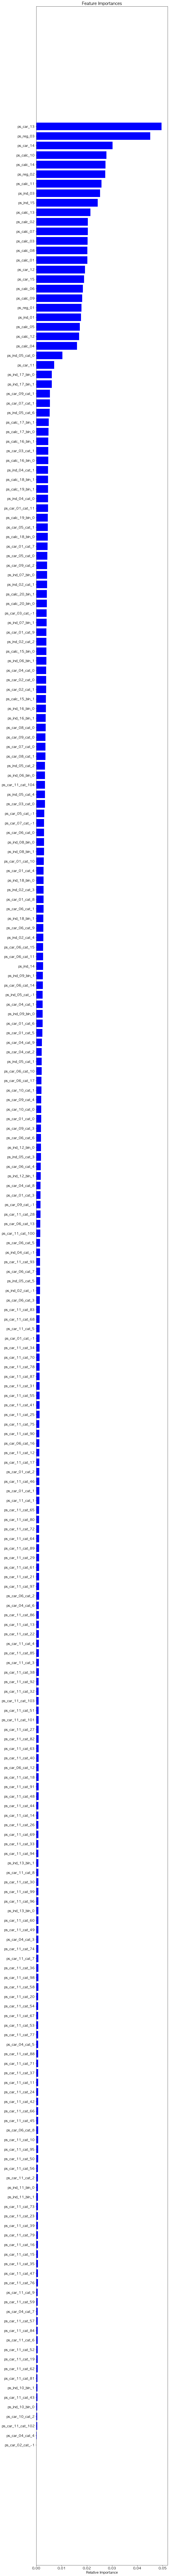

In [59]:
features = train_baseline.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,200))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 2. XGBoost

In [164]:
import xgboost
dtrain = xgboost.DMatrix(X_train, label=y_train)

In [165]:
dval = xgboost.DMatrix(X_test, label=y_test)

In [166]:
param = {'max_depth': 5, 'eta': 0.1, 'silent': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [168]:
evallist = [(dval, 'eval'), (dtrain, 'train')]
num_round = 50
bst = xgboost.train(param, dtrain, num_round, evallist, early_stopping_rounds=10)

[0]	eval-auc:0.565571	train-auc:0.569993
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 10 rounds.
[1]	eval-auc:0.58269	train-auc:0.592365
[2]	eval-auc:0.587956	train-auc:0.595919
[3]	eval-auc:0.599792	train-auc:0.607077
[4]	eval-auc:0.606954	train-auc:0.613447
[5]	eval-auc:0.613169	train-auc:0.619644
[6]	eval-auc:0.618483	train-auc:0.62457
[7]	eval-auc:0.620339	train-auc:0.62573
[8]	eval-auc:0.621938	train-auc:0.627083
[9]	eval-auc:0.623873	train-auc:0.628249
[10]	eval-auc:0.624796	train-auc:0.629314
[11]	eval-auc:0.625836	train-auc:0.630927
[12]	eval-auc:0.62637	train-auc:0.631315
[13]	eval-auc:0.628358	train-auc:0.632487
[14]	eval-auc:0.629362	train-auc:0.633476
[15]	eval-auc:0.630143	train-auc:0.634068
[16]	eval-auc:0.629215	train-auc:0.634547
[17]	eval-auc:0.629319	train-auc:0.635345
[18]	eval-auc:0.629392	train-auc:0.635635
[19]	eval-auc:0.6292	train-auc:0.636125
[20]	eval-auc:0.628944	train-auc:

In [180]:
val_predicted = bst.predict(dval)
val_predicted

array([0.06091937, 0.03906265, 0.02237247, ..., 0.03644121, 0.02562818,
       0.04983116], dtype=float32)

In [170]:
from gini import *

In [171]:
gini_normalized(y_test, val_predicted)

0.26484644919580447